# *+Processing with CHM & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
            


# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
0,4.8122,1.7630,-0.3147,-0.1590,-2.4418,1.9125,0.85,12.233545,19.097736
1,5.7589,2.4570,-0.2485,0.3429,-0.1997,2.6319,1.00,14.964220,17.704655
2,5.8464,2.5153,-0.1054,0.5493,-0.2144,2.7020,1.00,15.329449,17.559893
3,5.7526,2.6304,-0.0834,0.3900,-0.3510,2.7763,0.97,15.392742,20.676994
4,5.9480,2.6748,0.0000,0.5715,-0.3711,2.8314,1.00,17.944009,21.851387


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()

/tmp/ipykernel_44556/594647310.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["Gs_cub_m", "M_stem_kg_m2"].describe()


Gs_cub_m                                               \
                    count        mean         std    min    25%    50%   
Dominant_specias                                                         
Alder                 4.0  380.250000  155.784841  199.0  283.0  386.5   
Aspen                 1.0  148.000000         NaN  148.0  148.0  148.0   
Birch                23.0  135.304348   73.156392   11.0   94.0  138.0   
Oak                   3.0  236.000000   77.504839  158.0  197.5  237.0   
Pine                 71.0  263.281690  185.083625    2.0   97.0  281.0   
Spruce                1.0  619.000000         NaN  619.0  619.0  619.0   

                                M_stem_kg_m2                              \
                     75%    max        count       mean       std    min   
Dominant_specias                                                           
Alder             483.75  549.0          4.0  16.170000  5.186990   9.90   
Aspen             148.00  148.0          1.0   6.650000       NaN   6.65   
Birch             197.00  280.0         23.0   6.809130  3.677786   0.84   
Oak               275.00  313.0          3.0  13.513333  4.888725   9.59   
Pine              394.00  671.0         71.0  10.550000  7.252887   0.05   
Spruce            619.00  619.0          1.0  23.830000       NaN  23.83   

                                                  
                      25%    50%      75%    max  
Dominant_specias                                  
Alder             12.9225  17.03  20.2775  20.72  
Aspen              6.6500   6.65   6.6500   6.65  
Birch              4.7650   6.19   9.7400  15.47  
Oak               10.7750  11.96  15.4750  18.99  
Pine               3.4400  11.34  16.2250  25.04  
Spruce            23.8300  23.83  23.8300  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX
count,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.969534,1.827923,-0.239481,0.05436,-1.021247,2.095454,0.808738,13.045021,17.907784
std,1.323782,1.325853,0.893398,0.66008,0.803748,1.079203,0.276653,6.609366,7.523377
min,0.693100,-2.995700,-3.912000,-1.55590,-2.918800,-0.798500,0.090000,1.293138,2.733019
25%,4.672800,1.588100,-0.335500,-0.20955,-1.629700,1.801400,0.745000,8.206727,11.615798
50%,5.337500,2.286500,-0.040800,0.24450,-0.719500,2.458700,0.960000,13.072916,18.269344
75%,5.908100,2.730800,0.190600,0.49195,-0.358800,2.862800,1.000000,17.432255,22.751595
max,6.508800,3.220500,1.654400,1.41220,0.114200,3.366600,1.000000,28.916548,36.355442


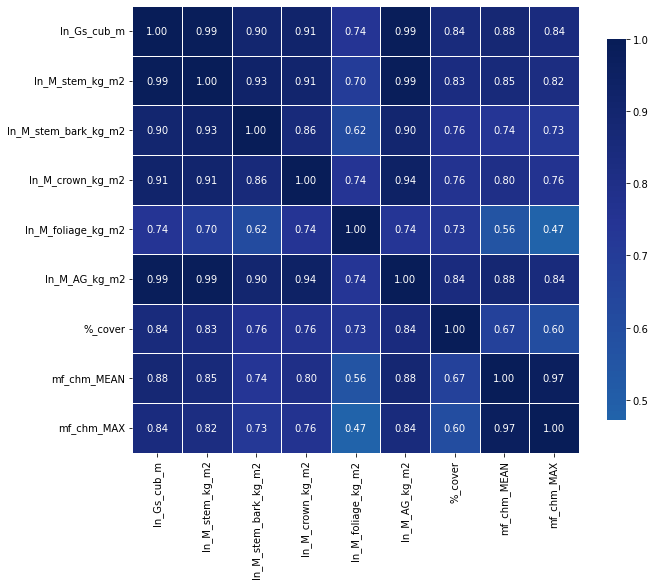

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_stem_kg_m2'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX
0,0.85,12.233545,19.097736
1,1.00,14.964220,17.704655
2,1.00,15.329449,17.559893
3,0.97,15.392742,20.676994
4,1.00,17.944009,21.851387


In [11]:
# Columns in "y" data collections
y.head()

,ln_M_stem_kg_m2
0,1.7630
1,2.4570
2,2.5153
3,2.6304
4,2.6748


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8411642860552302, 0.8609200714019554, 0.8581934491154541]
    Mean: 0.853
    Std: 0.009

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.40625119 0.49856165 0.69942613]
    Mean: 0.535
    Std: 0.122

 --------------------
Mean absolute error (MAE): 

    Scores: [0.30503974657331195, 0.3901093504337703, 0.2422958874996971]
    Mean: 0.312
    Std: 0.061

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.881 (std: 0.059)
Parameters: {'colsample_bytree': 0.8565852435738817, 'gamma': 0.12940676640076693, 'learning_rate': 0.029546354081746842, 'max_depth': 3, 'n_estimators': 189, 'subsample': 0.3060599314998912}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.31248207, 0.25468712, 0.44095802, ..., 0.88422651, 0.37964506,
       0.56501741]), 'std_fit_time': array([0.10802308, 0.01515404, 0.01687022, ..., 0.43345656, 0.0260491 ,
       0.03609487]), 'mean_score_time': array([0.00604596, 0.00600343, 0.00727148, ..., 0.00926485, 0.00924549,
       0.00913477]), 'std_score_time': array([2.00791909e-04, 1.91625210e-04, 2.65851590e-03, ...,
       2.28583897e-04, 2.96763834e-04, 8.71840381e-05]), 'param_colsample_bytree': masked_array(data=[0.5689857389725144, 0.7887581220636647,
                   0.9269921532918489, ..., 0.19294094411179352,
                   0.5016968927125156, 0.08482134984329665],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.43457917483374786, 0.21496693993553811,
                   0.46938935318547353, ..., 0.4127051242475305,
                   0.3612363399262743, 0.19591489428319997],
   

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8565852435738817
Gamma: 0.12940676640076693
Learning_rate: 0.029546354081746842
Max_depth: 3
N_estimators: 189
Subsample: 0.3060599314998912


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.84876	validation_1-rmse:1.70705
[1]	validation_0-rmse:1.79960	validation_1-rmse:1.66062
[2]	validation_0-rmse:1.74987	validation_1-rmse:1.61253
[3]	validation_0-rmse:1.70567	validation_1-rmse:1.57067


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.66404	validation_1-rmse:1.53094
[5]	validation_0-rmse:1.62064	validation_1-rmse:1.48660
[6]	validation_0-rmse:1.58111	validation_1-rmse:1.44674
[7]	validation_0-rmse:1.54133	validation_1-rmse:1.40631
[8]	validation_0-rmse:1.50448	validation_1-rmse:1.37086
[9]	validation_0-rmse:1.46966	validation_1-rmse:1.33927
[10]	validation_0-rmse:1.43381	validation_1-rmse:1.30100
[11]	validation_0-rmse:1.39996	validation_1-rmse:1.26641
[12]	validation_0-rmse:1.36463	validation_1-rmse:1.23503
[13]	validation_0-rmse:1.33419	validation_1-rmse:1.20306
[14]	validation_0-rmse:1.30423	validation_1-rmse:1.17183
[15]	validation_0-rmse:1.27602	validation_1-rmse:1.14284
[16]	validation_0-rmse:1.24493	validation_1-rmse:1.11360
[17]	validation_0-rmse:1.21285	validation_1-rmse:1.08215
[18]	validation_0-rmse:1.18494	validation_1-rmse:1.05575
[19]	validation_0-rmse:1.15905	validation_1-rmse:1.03223
[20]	validation_0-rmse:1.13230	validation_1-rmse:1.01025
[21]	validation_0-rmse:1.10832	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.80038	validation_1-rmse:1.43312
[3]	validation_0-rmse:1.75563	validation_1-rmse:1.39686
[4]	validation_0-rmse:1.71435	validation_1-rmse:1.36318
[5]	validation_0-rmse:1.67007	validation_1-rmse:1.32073
[6]	validation_0-rmse:1.62904	validation_1-rmse:1.28867
[7]	validation_0-rmse:1.59027	validation_1-rmse:1.25522
[8]	validation_0-rmse:1.55367	validation_1-rmse:1.22611
[9]	validation_0-rmse:1.51798	validation_1-rmse:1.19616
[10]	validation_0-rmse:1.48255	validation_1-rmse:1.17111
[11]	validation_0-rmse:1.44956	validation_1-rmse:1.14051
[12]	validation_0-rmse:1.41161	validation_1-rmse:1.10857
[13]	validation_0-rmse:1.37368	validation_1-rmse:1.08091
[14]	validation_0-rmse:1.34039	validation_1-rmse:1.05368
[15]	validation_0-rmse:1.31249	validation_1-rmse:1.02803
[16]	validation_0-rmse:1.28409	validation_1-rmse:1.00626
[17]	validation_0-rmse:1.25234	validation_1-rmse:0.98281
[18]	validation_0-rmse:1.22452	validation_1-rmse:0.95905
[19]	validation_0-rmse:1.19418	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.69294	validation_1-rmse:1.53693
[5]	validation_0-rmse:1.65251	validation_1-rmse:1.50315
[6]	validation_0-rmse:1.61057	validation_1-rmse:1.46172
[7]	validation_0-rmse:1.57590	validation_1-rmse:1.42882
[8]	validation_0-rmse:1.53709	validation_1-rmse:1.38952
[9]	validation_0-rmse:1.50255	validation_1-rmse:1.36014
[10]	validation_0-rmse:1.46927	validation_1-rmse:1.33273
[11]	validation_0-rmse:1.43754	validation_1-rmse:1.30614
[12]	validation_0-rmse:1.40375	validation_1-rmse:1.27481
[13]	validation_0-rmse:1.37031	validation_1-rmse:1.24789
[14]	validation_0-rmse:1.33795	validation_1-rmse:1.21744
[15]	validation_0-rmse:1.30723	validation_1-rmse:1.18821
[16]	validation_0-rmse:1.27969	validation_1-rmse:1.16487
[17]	validation_0-rmse:1.25225	validation_1-rmse:1.14167
[18]	validation_0-rmse:1.22059	validation_1-rmse:1.10856
[19]	validation_0-rmse:1.19593	validation_1-rmse:1.08706
[20]	validation_0-rmse:1.17063	validation_1-rmse:1.06366
[21]	validation_0-rmse:1.14214	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.68810	validation_1-rmse:1.70003
[4]	validation_0-rmse:1.64514	validation_1-rmse:1.65006
[5]	validation_0-rmse:1.60597	validation_1-rmse:1.60182
[6]	validation_0-rmse:1.57104	validation_1-rmse:1.55604
[7]	validation_0-rmse:1.53355	validation_1-rmse:1.51118
[8]	validation_0-rmse:1.49813	validation_1-rmse:1.47314
[9]	validation_0-rmse:1.46327	validation_1-rmse:1.43060
[10]	validation_0-rmse:1.43030	validation_1-rmse:1.39225
[11]	validation_0-rmse:1.40032	validation_1-rmse:1.35695
[12]	validation_0-rmse:1.36703	validation_1-rmse:1.31852
[13]	validation_0-rmse:1.33628	validation_1-rmse:1.27862
[14]	validation_0-rmse:1.30643	validation_1-rmse:1.24451
[15]	validation_0-rmse:1.27598	validation_1-rmse:1.20937
[16]	validation_0-rmse:1.24801	validation_1-rmse:1.17666
[17]	validation_0-rmse:1.21699	validation_1-rmse:1.13846
[18]	validation_0-rmse:1.19102	validation_1-rmse:1.10498
[19]	validation_0-rmse:1.16318	validation_1-rmse:1.07376
[20]	validation_0-rmse:1.13670	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.60425	validation_1-rmse:1.84794
[5]	validation_0-rmse:1.56387	validation_1-rmse:1.80480
[6]	validation_0-rmse:1.52505	validation_1-rmse:1.75771
[7]	validation_0-rmse:1.48769	validation_1-rmse:1.71693
[8]	validation_0-rmse:1.44960	validation_1-rmse:1.67343
[9]	validation_0-rmse:1.41366	validation_1-rmse:1.63019
[10]	validation_0-rmse:1.38360	validation_1-rmse:1.59772
[11]	validation_0-rmse:1.35245	validation_1-rmse:1.56459
[12]	validation_0-rmse:1.31747	validation_1-rmse:1.52532
[13]	validation_0-rmse:1.28610	validation_1-rmse:1.49157
[14]	validation_0-rmse:1.25904	validation_1-rmse:1.45867
[15]	validation_0-rmse:1.22988	validation_1-rmse:1.42571
[16]	validation_0-rmse:1.20405	validation_1-rmse:1.39421
[17]	validation_0-rmse:1.17676	validation_1-rmse:1.36245
[18]	validation_0-rmse:1.15190	validation_1-rmse:1.33345
[19]	validation_0-rmse:1.12714	validation_1-rmse:1.30437
[20]	validation_0-rmse:1.10400	validation_1-rmse:1.27746
[21]	validation_0-rmse:1.08039	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33853	validation_1-rmse:1.33882
[14]	validation_0-rmse:1.30592	validation_1-rmse:1.30282
[15]	validation_0-rmse:1.27893	validation_1-rmse:1.27150
[16]	validation_0-rmse:1.24703	validation_1-rmse:1.23756
[17]	validation_0-rmse:1.21892	validation_1-rmse:1.20398
[18]	validation_0-rmse:1.19795	validation_1-rmse:1.17795
[19]	validation_0-rmse:1.16555	validation_1-rmse:1.14410
[20]	validation_0-rmse:1.14101	validation_1-rmse:1.11325
[21]	validation_0-rmse:1.11643	validation_1-rmse:1.08455
[22]	validation_0-rmse:1.09172	validation_1-rmse:1.05707
[23]	validation_0-rmse:1.06629	validation_1-rmse:1.02622
[24]	validation_0-rmse:1.04146	validation_1-rmse:1.00084
[25]	validation_0-rmse:1.02008	validation_1-rmse:0.98296
[26]	validation_0-rmse:0.99691	validation_1-rmse:0.96148
[27]	validation_0-rmse:0.97418	validation_1-rmse:0.93794
[28]	validation_0-rmse:0.95758	validation_1-rmse:0.91895
[29]	validation_0-rmse:0.93912	validation_1-rmse:0.89555
[30]	validation_0-rmse:0.92264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28784	validation_1-rmse:1.35562
[15]	validation_0-rmse:1.25713	validation_1-rmse:1.32237
[16]	validation_0-rmse:1.23108	validation_1-rmse:1.29462
[17]	validation_0-rmse:1.20191	validation_1-rmse:1.26286
[18]	validation_0-rmse:1.17462	validation_1-rmse:1.23277
[19]	validation_0-rmse:1.14429	validation_1-rmse:1.20124
[20]	validation_0-rmse:1.11954	validation_1-rmse:1.17553
[21]	validation_0-rmse:1.09480	validation_1-rmse:1.14681
[22]	validation_0-rmse:1.07105	validation_1-rmse:1.12209
[23]	validation_0-rmse:1.04677	validation_1-rmse:1.09559
[24]	validation_0-rmse:1.02694	validation_1-rmse:1.07435
[25]	validation_0-rmse:1.00763	validation_1-rmse:1.05489
[26]	validation_0-rmse:0.99046	validation_1-rmse:1.03523
[27]	validation_0-rmse:0.97206	validation_1-rmse:1.01575
[28]	validation_0-rmse:0.95013	validation_1-rmse:0.99176
[29]	validation_0-rmse:0.93071	validation_1-rmse:0.97072
[30]	validation_0-rmse:0.91364	validation_1-rmse:0.95308
[31]	validation_0-rmse:0.89361	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.67392	validation_1-rmse:1.59682
[5]	validation_0-rmse:1.63373	validation_1-rmse:1.55930
[6]	validation_0-rmse:1.59634	validation_1-rmse:1.52277
[7]	validation_0-rmse:1.55795	validation_1-rmse:1.48371
[8]	validation_0-rmse:1.51997	validation_1-rmse:1.44217
[9]	validation_0-rmse:1.48494	validation_1-rmse:1.41032
[10]	validation_0-rmse:1.44747	validation_1-rmse:1.37402
[11]	validation_0-rmse:1.41679	validation_1-rmse:1.34376
[12]	validation_0-rmse:1.38309	validation_1-rmse:1.30928
[13]	validation_0-rmse:1.35218	validation_1-rmse:1.27738
[14]	validation_0-rmse:1.31928	validation_1-rmse:1.24580
[15]	validation_0-rmse:1.28676	validation_1-rmse:1.21394
[16]	validation_0-rmse:1.25520	validation_1-rmse:1.18201
[17]	validation_0-rmse:1.22609	validation_1-rmse:1.15389
[18]	validation_0-rmse:1.19832	validation_1-rmse:1.12880
[19]	validation_0-rmse:1.17007	validation_1-rmse:1.10256
[20]	validation_0-rmse:1.14303	validation_1-rmse:1.07724
[21]	validation_0-rmse:1.11634	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.10831	validation_1-rmse:1.21167
[21]	validation_0-rmse:1.08220	validation_1-rmse:1.18984
[22]	validation_0-rmse:1.05784	validation_1-rmse:1.16846
[23]	validation_0-rmse:1.03397	validation_1-rmse:1.14780
[24]	validation_0-rmse:1.00942	validation_1-rmse:1.12593
[25]	validation_0-rmse:0.98589	validation_1-rmse:1.10510
[26]	validation_0-rmse:0.96192	validation_1-rmse:1.08282
[27]	validation_0-rmse:0.93958	validation_1-rmse:1.06344
[28]	validation_0-rmse:0.91870	validation_1-rmse:1.04694
[29]	validation_0-rmse:0.90054	validation_1-rmse:1.03051
[30]	validation_0-rmse:0.88621	validation_1-rmse:1.01837
[31]	validation_0-rmse:0.86642	validation_1-rmse:1.00389
[32]	validation_0-rmse:0.84908	validation_1-rmse:0.99092
[33]	validation_0-rmse:0.83110	validation_1-rmse:0.97568
[34]	validation_0-rmse:0.81342	validation_1-rmse:0.96321
[35]	validation_0-rmse:0.79529	validation_1-rmse:0.94657
[36]	validation_0-rmse:0.77885	validation_1-rmse:0.93484
[37]	validation_0-rmse:0.76375	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.14520	validation_1-rmse:1.28636
[20]	validation_0-rmse:1.11894	validation_1-rmse:1.25721
[21]	validation_0-rmse:1.09534	validation_1-rmse:1.23490
[22]	validation_0-rmse:1.06901	validation_1-rmse:1.20456
[23]	validation_0-rmse:1.04818	validation_1-rmse:1.18385
[24]	validation_0-rmse:1.02746	validation_1-rmse:1.16125
[25]	validation_0-rmse:1.00796	validation_1-rmse:1.13978
[26]	validation_0-rmse:0.98846	validation_1-rmse:1.11937
[27]	validation_0-rmse:0.96948	validation_1-rmse:1.09958
[28]	validation_0-rmse:0.95130	validation_1-rmse:1.07877
[29]	validation_0-rmse:0.93257	validation_1-rmse:1.05910
[30]	validation_0-rmse:0.91388	validation_1-rmse:1.04013
[31]	validation_0-rmse:0.89478	validation_1-rmse:1.01872
[32]	validation_0-rmse:0.87883	validation_1-rmse:0.99963
[33]	validation_0-rmse:0.86005	validation_1-rmse:0.97893
[34]	validation_0-rmse:0.84555	validation_1-rmse:0.96167
[35]	validation_0-rmse:0.83162	validation_1-rmse:0.94738
[36]	validation_0-rmse:0.81464	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19929	validation_1-rmse:1.15450
[19]	validation_0-rmse:1.17475	validation_1-rmse:1.12957
[20]	validation_0-rmse:1.14901	validation_1-rmse:1.10462
[21]	validation_0-rmse:1.12906	validation_1-rmse:1.08734
[22]	validation_0-rmse:1.10232	validation_1-rmse:1.05782
[23]	validation_0-rmse:1.07968	validation_1-rmse:1.03538
[24]	validation_0-rmse:1.05369	validation_1-rmse:1.01187
[25]	validation_0-rmse:1.02932	validation_1-rmse:0.99309
[26]	validation_0-rmse:1.00967	validation_1-rmse:0.97767
[27]	validation_0-rmse:0.98428	validation_1-rmse:0.95588
[28]	validation_0-rmse:0.96344	validation_1-rmse:0.93586
[29]	validation_0-rmse:0.94572	validation_1-rmse:0.91954
[30]	validation_0-rmse:0.92157	validation_1-rmse:0.89535
[31]	validation_0-rmse:0.90691	validation_1-rmse:0.88269
[32]	validation_0-rmse:0.89049	validation_1-rmse:0.87320
[33]	validation_0-rmse:0.87340	validation_1-rmse:0.85773
[34]	validation_0-rmse:0.85400	validation_1-rmse:0.84159
[35]	validation_0-rmse:0.83660	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.23961	validation_1-rmse:1.18581
[18]	validation_0-rmse:1.21578	validation_1-rmse:1.16304
[19]	validation_0-rmse:1.18574	validation_1-rmse:1.13649
[20]	validation_0-rmse:1.15895	validation_1-rmse:1.11715
[21]	validation_0-rmse:1.13311	validation_1-rmse:1.09558
[22]	validation_0-rmse:1.10951	validation_1-rmse:1.07709
[23]	validation_0-rmse:1.08702	validation_1-rmse:1.06005
[24]	validation_0-rmse:1.06209	validation_1-rmse:1.03384
[25]	validation_0-rmse:1.04076	validation_1-rmse:1.01148
[26]	validation_0-rmse:1.01764	validation_1-rmse:0.99313
[27]	validation_0-rmse:0.99832	validation_1-rmse:0.97591
[28]	validation_0-rmse:0.97768	validation_1-rmse:0.96042
[29]	validation_0-rmse:0.95721	validation_1-rmse:0.94591
[30]	validation_0-rmse:0.93900	validation_1-rmse:0.92945
[31]	validation_0-rmse:0.91682	validation_1-rmse:0.91384
[32]	validation_0-rmse:0.90042	validation_1-rmse:0.89915
[33]	validation_0-rmse:0.88192	validation_1-rmse:0.87922
[34]	validation_0-rmse:0.86373	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.45988	validation_1-rmse:1.36393
[11]	validation_0-rmse:1.42416	validation_1-rmse:1.32395
[12]	validation_0-rmse:1.39036	validation_1-rmse:1.29118
[13]	validation_0-rmse:1.36032	validation_1-rmse:1.26296
[14]	validation_0-rmse:1.32735	validation_1-rmse:1.22869
[15]	validation_0-rmse:1.29427	validation_1-rmse:1.19639
[16]	validation_0-rmse:1.26320	validation_1-rmse:1.16468
[17]	validation_0-rmse:1.23204	validation_1-rmse:1.13368
[18]	validation_0-rmse:1.20424	validation_1-rmse:1.10477
[19]	validation_0-rmse:1.17842	validation_1-rmse:1.07748
[20]	validation_0-rmse:1.15423	validation_1-rmse:1.05176
[21]	validation_0-rmse:1.12737	validation_1-rmse:1.02490
[22]	validation_0-rmse:1.10623	validation_1-rmse:1.00190
[23]	validation_0-rmse:1.08110	validation_1-rmse:0.97761
[24]	validation_0-rmse:1.05648	validation_1-rmse:0.95224
[25]	validation_0-rmse:1.03398	validation_1-rmse:0.92821
[26]	validation_0-rmse:1.01532	validation_1-rmse:0.90844
[27]	validation_0-rmse:0.99570	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19161	validation_1-rmse:1.20622
[19]	validation_0-rmse:1.16312	validation_1-rmse:1.17615
[20]	validation_0-rmse:1.13849	validation_1-rmse:1.14780
[21]	validation_0-rmse:1.11316	validation_1-rmse:1.11695
[22]	validation_0-rmse:1.09181	validation_1-rmse:1.09012
[23]	validation_0-rmse:1.06664	validation_1-rmse:1.05997
[24]	validation_0-rmse:1.04417	validation_1-rmse:1.03555
[25]	validation_0-rmse:1.02362	validation_1-rmse:1.01372
[26]	validation_0-rmse:0.99927	validation_1-rmse:0.98713
[27]	validation_0-rmse:0.97941	validation_1-rmse:0.96283
[28]	validation_0-rmse:0.95947	validation_1-rmse:0.94059
[29]	validation_0-rmse:0.94199	validation_1-rmse:0.92000
[30]	validation_0-rmse:0.92294	validation_1-rmse:0.89820
[31]	validation_0-rmse:0.90085	validation_1-rmse:0.87312
[32]	validation_0-rmse:0.88465	validation_1-rmse:0.85591
[33]	validation_0-rmse:0.86984	validation_1-rmse:0.83804
[34]	validation_0-rmse:0.85387	validation_1-rmse:0.81916
[35]	validation_0-rmse:0.83625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19832	validation_1-rmse:1.13187
[19]	validation_0-rmse:1.17170	validation_1-rmse:1.10648
[20]	validation_0-rmse:1.14384	validation_1-rmse:1.07863
[21]	validation_0-rmse:1.11874	validation_1-rmse:1.05294
[22]	validation_0-rmse:1.09444	validation_1-rmse:1.02559
[23]	validation_0-rmse:1.07191	validation_1-rmse:1.00219
[24]	validation_0-rmse:1.04820	validation_1-rmse:0.97740
[25]	validation_0-rmse:1.02796	validation_1-rmse:0.95807
[26]	validation_0-rmse:1.00636	validation_1-rmse:0.93615
[27]	validation_0-rmse:0.98505	validation_1-rmse:0.91257
[28]	validation_0-rmse:0.96395	validation_1-rmse:0.89242
[29]	validation_0-rmse:0.94307	validation_1-rmse:0.86778
[30]	validation_0-rmse:0.92284	validation_1-rmse:0.84954
[31]	validation_0-rmse:0.90472	validation_1-rmse:0.83168
[32]	validation_0-rmse:0.88483	validation_1-rmse:0.81162
[33]	validation_0-rmse:0.86564	validation_1-rmse:0.79282
[34]	validation_0-rmse:0.84632	validation_1-rmse:0.77293
[35]	validation_0-rmse:0.82874	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.17190	validation_1-rmse:1.45773
[18]	validation_0-rmse:1.14794	validation_1-rmse:1.44308
[19]	validation_0-rmse:1.11639	validation_1-rmse:1.41841
[20]	validation_0-rmse:1.09055	validation_1-rmse:1.39630
[21]	validation_0-rmse:1.06416	validation_1-rmse:1.37780
[22]	validation_0-rmse:1.03966	validation_1-rmse:1.35978
[23]	validation_0-rmse:1.01518	validation_1-rmse:1.34611
[24]	validation_0-rmse:0.98834	validation_1-rmse:1.32041
[25]	validation_0-rmse:0.96475	validation_1-rmse:1.30239
[26]	validation_0-rmse:0.94373	validation_1-rmse:1.28695
[27]	validation_0-rmse:0.92241	validation_1-rmse:1.27489
[28]	validation_0-rmse:0.89872	validation_1-rmse:1.25183
[29]	validation_0-rmse:0.87783	validation_1-rmse:1.23570
[30]	validation_0-rmse:0.85591	validation_1-rmse:1.21550
[31]	validation_0-rmse:0.83554	validation_1-rmse:1.20166
[32]	validation_0-rmse:0.81885	validation_1-rmse:1.18734
[33]	validation_0-rmse:0.80059	validation_1-rmse:1.17284
[34]	validation_0-rmse:0.78453	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.32642	validation_1-rmse:1.17295
[15]	validation_0-rmse:1.29824	validation_1-rmse:1.14643
[16]	validation_0-rmse:1.26930	validation_1-rmse:1.11869
[17]	validation_0-rmse:1.24036	validation_1-rmse:1.08926
[18]	validation_0-rmse:1.21623	validation_1-rmse:1.06383
[19]	validation_0-rmse:1.18599	validation_1-rmse:1.03221
[20]	validation_0-rmse:1.15365	validation_1-rmse:1.00145
[21]	validation_0-rmse:1.13228	validation_1-rmse:0.98006
[22]	validation_0-rmse:1.10602	validation_1-rmse:0.95500
[23]	validation_0-rmse:1.08091	validation_1-rmse:0.92879
[24]	validation_0-rmse:1.05698	validation_1-rmse:0.90683
[25]	validation_0-rmse:1.03898	validation_1-rmse:0.88715
[26]	validation_0-rmse:1.01613	validation_1-rmse:0.86702
[27]	validation_0-rmse:0.99421	validation_1-rmse:0.84821
[28]	validation_0-rmse:0.97338	validation_1-rmse:0.82489
[29]	validation_0-rmse:0.95151	validation_1-rmse:0.80516
[30]	validation_0-rmse:0.93298	validation_1-rmse:0.78415
[31]	validation_0-rmse:0.91344	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21071	validation_1-rmse:1.10839
[19]	validation_0-rmse:1.18170	validation_1-rmse:1.08223
[20]	validation_0-rmse:1.15313	validation_1-rmse:1.05513
[21]	validation_0-rmse:1.12489	validation_1-rmse:1.02566
[22]	validation_0-rmse:1.09951	validation_1-rmse:0.99939
[23]	validation_0-rmse:1.07776	validation_1-rmse:0.97442
[24]	validation_0-rmse:1.05407	validation_1-rmse:0.95132
[25]	validation_0-rmse:1.02895	validation_1-rmse:0.93184
[26]	validation_0-rmse:1.00891	validation_1-rmse:0.90784
[27]	validation_0-rmse:0.98937	validation_1-rmse:0.88714
[28]	validation_0-rmse:0.96941	validation_1-rmse:0.86430
[29]	validation_0-rmse:0.94867	validation_1-rmse:0.84406
[30]	validation_0-rmse:0.92842	validation_1-rmse:0.82029
[31]	validation_0-rmse:0.91325	validation_1-rmse:0.80181
[32]	validation_0-rmse:0.89790	validation_1-rmse:0.78760
[33]	validation_0-rmse:0.88078	validation_1-rmse:0.76590
[34]	validation_0-rmse:0.86379	validation_1-rmse:0.74929
[35]	validation_0-rmse:0.84839	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.38268	validation_1-rmse:1.20708
[13]	validation_0-rmse:1.34941	validation_1-rmse:1.17748
[14]	validation_0-rmse:1.31678	validation_1-rmse:1.14417
[15]	validation_0-rmse:1.28799	validation_1-rmse:1.11829
[16]	validation_0-rmse:1.26267	validation_1-rmse:1.09748
[17]	validation_0-rmse:1.23360	validation_1-rmse:1.06685
[18]	validation_0-rmse:1.20135	validation_1-rmse:1.03579
[19]	validation_0-rmse:1.17530	validation_1-rmse:1.01030
[20]	validation_0-rmse:1.14861	validation_1-rmse:0.98658
[21]	validation_0-rmse:1.12298	validation_1-rmse:0.96160
[22]	validation_0-rmse:1.09912	validation_1-rmse:0.93767
[23]	validation_0-rmse:1.07390	validation_1-rmse:0.91257
[24]	validation_0-rmse:1.05115	validation_1-rmse:0.89564
[25]	validation_0-rmse:1.02798	validation_1-rmse:0.87706
[26]	validation_0-rmse:1.00865	validation_1-rmse:0.85568
[27]	validation_0-rmse:0.98639	validation_1-rmse:0.83623
[28]	validation_0-rmse:0.96821	validation_1-rmse:0.81744
[29]	validation_0-rmse:0.94600	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27770	validation_1-rmse:1.36514
[15]	validation_0-rmse:1.24953	validation_1-rmse:1.33343
[16]	validation_0-rmse:1.22257	validation_1-rmse:1.30523
[17]	validation_0-rmse:1.19340	validation_1-rmse:1.27063
[18]	validation_0-rmse:1.16835	validation_1-rmse:1.24073
[19]	validation_0-rmse:1.14449	validation_1-rmse:1.21457
[20]	validation_0-rmse:1.11902	validation_1-rmse:1.18713
[21]	validation_0-rmse:1.09311	validation_1-rmse:1.15829
[22]	validation_0-rmse:1.06938	validation_1-rmse:1.13263
[23]	validation_0-rmse:1.04535	validation_1-rmse:1.10496
[24]	validation_0-rmse:1.02140	validation_1-rmse:1.08252
[25]	validation_0-rmse:0.99767	validation_1-rmse:1.05770
[26]	validation_0-rmse:0.97480	validation_1-rmse:1.03243
[27]	validation_0-rmse:0.95291	validation_1-rmse:1.00983
[28]	validation_0-rmse:0.93320	validation_1-rmse:0.98688
[29]	validation_0-rmse:0.91575	validation_1-rmse:0.96843
[30]	validation_0-rmse:0.89806	validation_1-rmse:0.95152
[31]	validation_0-rmse:0.87703	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.42509	validation_1-rmse:1.23247
[12]	validation_0-rmse:1.38706	validation_1-rmse:1.19580
[13]	validation_0-rmse:1.35416	validation_1-rmse:1.16183
[14]	validation_0-rmse:1.32464	validation_1-rmse:1.13019
[15]	validation_0-rmse:1.29235	validation_1-rmse:1.09771
[16]	validation_0-rmse:1.26193	validation_1-rmse:1.07009
[17]	validation_0-rmse:1.23353	validation_1-rmse:1.04080
[18]	validation_0-rmse:1.20302	validation_1-rmse:1.01510
[19]	validation_0-rmse:1.17539	validation_1-rmse:0.98997
[20]	validation_0-rmse:1.15065	validation_1-rmse:0.96389
[21]	validation_0-rmse:1.12507	validation_1-rmse:0.94128
[22]	validation_0-rmse:1.09973	validation_1-rmse:0.91444
[23]	validation_0-rmse:1.07533	validation_1-rmse:0.88999
[24]	validation_0-rmse:1.05279	validation_1-rmse:0.86860
[25]	validation_0-rmse:1.03227	validation_1-rmse:0.84648
[26]	validation_0-rmse:1.01762	validation_1-rmse:0.82904
[27]	validation_0-rmse:0.99740	validation_1-rmse:0.81340
[28]	validation_0-rmse:0.97782	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.24422	validation_1-rmse:1.26349
[17]	validation_0-rmse:1.21475	validation_1-rmse:1.23079
[18]	validation_0-rmse:1.18868	validation_1-rmse:1.19996
[19]	validation_0-rmse:1.16778	validation_1-rmse:1.17485
[20]	validation_0-rmse:1.14550	validation_1-rmse:1.15221
[21]	validation_0-rmse:1.12045	validation_1-rmse:1.12155
[22]	validation_0-rmse:1.09456	validation_1-rmse:1.09278
[23]	validation_0-rmse:1.07233	validation_1-rmse:1.06492
[24]	validation_0-rmse:1.04959	validation_1-rmse:1.03903
[25]	validation_0-rmse:1.02954	validation_1-rmse:1.01287
[26]	validation_0-rmse:1.00416	validation_1-rmse:0.98618
[27]	validation_0-rmse:0.98592	validation_1-rmse:0.96294
[28]	validation_0-rmse:0.96270	validation_1-rmse:0.93744
[29]	validation_0-rmse:0.94487	validation_1-rmse:0.91787
[30]	validation_0-rmse:0.92962	validation_1-rmse:0.89985
[31]	validation_0-rmse:0.91219	validation_1-rmse:0.87861
[32]	validation_0-rmse:0.89619	validation_1-rmse:0.85610
[33]	validation_0-rmse:0.88092	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31307	validation_1-rmse:1.29301
[15]	validation_0-rmse:1.28284	validation_1-rmse:1.26108
[16]	validation_0-rmse:1.25341	validation_1-rmse:1.22879
[17]	validation_0-rmse:1.22271	validation_1-rmse:1.19809
[18]	validation_0-rmse:1.19844	validation_1-rmse:1.16860
[19]	validation_0-rmse:1.16762	validation_1-rmse:1.13570
[20]	validation_0-rmse:1.14092	validation_1-rmse:1.10655
[21]	validation_0-rmse:1.11728	validation_1-rmse:1.08049
[22]	validation_0-rmse:1.09434	validation_1-rmse:1.05396
[23]	validation_0-rmse:1.07107	validation_1-rmse:1.03084
[24]	validation_0-rmse:1.04893	validation_1-rmse:1.00434
[25]	validation_0-rmse:1.02760	validation_1-rmse:0.98085
[26]	validation_0-rmse:1.00647	validation_1-rmse:0.95529
[27]	validation_0-rmse:0.98777	validation_1-rmse:0.93538
[28]	validation_0-rmse:0.96935	validation_1-rmse:0.91004
[29]	validation_0-rmse:0.95074	validation_1-rmse:0.88829
[30]	validation_0-rmse:0.93226	validation_1-rmse:0.86610
[31]	validation_0-rmse:0.91249	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.18536	validation_1-rmse:1.48951
[17]	validation_0-rmse:1.15645	validation_1-rmse:1.46404
[18]	validation_0-rmse:1.13138	validation_1-rmse:1.44308
[19]	validation_0-rmse:1.10428	validation_1-rmse:1.41647
[20]	validation_0-rmse:1.07738	validation_1-rmse:1.39569
[21]	validation_0-rmse:1.05202	validation_1-rmse:1.37432
[22]	validation_0-rmse:1.02888	validation_1-rmse:1.35626
[23]	validation_0-rmse:1.00377	validation_1-rmse:1.33160
[24]	validation_0-rmse:0.98135	validation_1-rmse:1.31176
[25]	validation_0-rmse:0.96091	validation_1-rmse:1.29294
[26]	validation_0-rmse:0.93962	validation_1-rmse:1.27531
[27]	validation_0-rmse:0.91806	validation_1-rmse:1.25489
[28]	validation_0-rmse:0.89661	validation_1-rmse:1.23263
[29]	validation_0-rmse:0.87597	validation_1-rmse:1.21640
[30]	validation_0-rmse:0.85797	validation_1-rmse:1.19726
[31]	validation_0-rmse:0.83978	validation_1-rmse:1.18324
[32]	validation_0-rmse:0.82271	validation_1-rmse:1.16468
[33]	validation_0-rmse:0.80279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21092	validation_1-rmse:1.50112
[17]	validation_0-rmse:1.17968	validation_1-rmse:1.47577
[18]	validation_0-rmse:1.15536	validation_1-rmse:1.45671
[19]	validation_0-rmse:1.12799	validation_1-rmse:1.43360
[20]	validation_0-rmse:1.10164	validation_1-rmse:1.41235
[21]	validation_0-rmse:1.07696	validation_1-rmse:1.39092
[22]	validation_0-rmse:1.05473	validation_1-rmse:1.37527
[23]	validation_0-rmse:1.03224	validation_1-rmse:1.35595
[24]	validation_0-rmse:1.00836	validation_1-rmse:1.33596
[25]	validation_0-rmse:0.98471	validation_1-rmse:1.31724
[26]	validation_0-rmse:0.96067	validation_1-rmse:1.29626
[27]	validation_0-rmse:0.93862	validation_1-rmse:1.27873
[28]	validation_0-rmse:0.91408	validation_1-rmse:1.25949
[29]	validation_0-rmse:0.89612	validation_1-rmse:1.24363
[30]	validation_0-rmse:0.87235	validation_1-rmse:1.22382
[31]	validation_0-rmse:0.85194	validation_1-rmse:1.20997
[32]	validation_0-rmse:0.83436	validation_1-rmse:1.19675
[33]	validation_0-rmse:0.81480	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.29572	validation_1-rmse:1.30384
[15]	validation_0-rmse:1.26674	validation_1-rmse:1.27779
[16]	validation_0-rmse:1.23854	validation_1-rmse:1.24766
[17]	validation_0-rmse:1.20820	validation_1-rmse:1.21891
[18]	validation_0-rmse:1.18469	validation_1-rmse:1.19527
[19]	validation_0-rmse:1.15723	validation_1-rmse:1.17097
[20]	validation_0-rmse:1.13108	validation_1-rmse:1.14303
[21]	validation_0-rmse:1.10717	validation_1-rmse:1.11723
[22]	validation_0-rmse:1.08600	validation_1-rmse:1.09593
[23]	validation_0-rmse:1.06479	validation_1-rmse:1.07304
[24]	validation_0-rmse:1.04220	validation_1-rmse:1.05215
[25]	validation_0-rmse:1.02263	validation_1-rmse:1.03162
[26]	validation_0-rmse:1.00053	validation_1-rmse:1.01106
[27]	validation_0-rmse:0.97844	validation_1-rmse:0.99224
[28]	validation_0-rmse:0.95550	validation_1-rmse:0.97209
[29]	validation_0-rmse:0.93485	validation_1-rmse:0.95350
[30]	validation_0-rmse:0.91824	validation_1-rmse:0.93692
[31]	validation_0-rmse:0.90199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.23333	validation_1-rmse:1.09558
[18]	validation_0-rmse:1.20509	validation_1-rmse:1.06450
[19]	validation_0-rmse:1.17469	validation_1-rmse:1.03679
[20]	validation_0-rmse:1.15024	validation_1-rmse:1.00924
[21]	validation_0-rmse:1.12264	validation_1-rmse:0.98163
[22]	validation_0-rmse:1.10188	validation_1-rmse:0.95992
[23]	validation_0-rmse:1.07607	validation_1-rmse:0.93401
[24]	validation_0-rmse:1.05446	validation_1-rmse:0.91346
[25]	validation_0-rmse:1.02866	validation_1-rmse:0.88786
[26]	validation_0-rmse:1.00731	validation_1-rmse:0.86465
[27]	validation_0-rmse:0.98781	validation_1-rmse:0.84118
[28]	validation_0-rmse:0.96897	validation_1-rmse:0.82035
[29]	validation_0-rmse:0.95212	validation_1-rmse:0.80201
[30]	validation_0-rmse:0.93563	validation_1-rmse:0.78295
[31]	validation_0-rmse:0.91669	validation_1-rmse:0.76465
[32]	validation_0-rmse:0.89890	validation_1-rmse:0.74436
[33]	validation_0-rmse:0.87877	validation_1-rmse:0.72655
[34]	validation_0-rmse:0.86260	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.22913	validation_1-rmse:1.00603
[19]	validation_0-rmse:1.20066	validation_1-rmse:0.98315
[20]	validation_0-rmse:1.17014	validation_1-rmse:0.95757
[21]	validation_0-rmse:1.14492	validation_1-rmse:0.93408
[22]	validation_0-rmse:1.12007	validation_1-rmse:0.90984
[23]	validation_0-rmse:1.09629	validation_1-rmse:0.88949
[24]	validation_0-rmse:1.06939	validation_1-rmse:0.86501
[25]	validation_0-rmse:1.04754	validation_1-rmse:0.84134
[26]	validation_0-rmse:1.02070	validation_1-rmse:0.81831
[27]	validation_0-rmse:0.99856	validation_1-rmse:0.79815
[28]	validation_0-rmse:0.97755	validation_1-rmse:0.78003
[29]	validation_0-rmse:0.95622	validation_1-rmse:0.76109
[30]	validation_0-rmse:0.93616	validation_1-rmse:0.74079
[31]	validation_0-rmse:0.91757	validation_1-rmse:0.72345
[32]	validation_0-rmse:0.90123	validation_1-rmse:0.70864
[33]	validation_0-rmse:0.88213	validation_1-rmse:0.69165
[34]	validation_0-rmse:0.86538	validation_1-rmse:0.67455
[35]	validation_0-rmse:0.84646	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41847	validation_1-rmse:1.29379
[12]	validation_0-rmse:1.38388	validation_1-rmse:1.25879
[13]	validation_0-rmse:1.34974	validation_1-rmse:1.22956
[14]	validation_0-rmse:1.31686	validation_1-rmse:1.19682
[15]	validation_0-rmse:1.28546	validation_1-rmse:1.16740
[16]	validation_0-rmse:1.25445	validation_1-rmse:1.13807
[17]	validation_0-rmse:1.22616	validation_1-rmse:1.11003
[18]	validation_0-rmse:1.19830	validation_1-rmse:1.08100
[19]	validation_0-rmse:1.17382	validation_1-rmse:1.05433
[20]	validation_0-rmse:1.14593	validation_1-rmse:1.02699
[21]	validation_0-rmse:1.12561	validation_1-rmse:1.00748
[22]	validation_0-rmse:1.09976	validation_1-rmse:0.98257
[23]	validation_0-rmse:1.07798	validation_1-rmse:0.95957
[24]	validation_0-rmse:1.05388	validation_1-rmse:0.93771
[25]	validation_0-rmse:1.02907	validation_1-rmse:0.91682
[26]	validation_0-rmse:1.00791	validation_1-rmse:0.89391
[27]	validation_0-rmse:0.98394	validation_1-rmse:0.87207
[28]	validation_0-rmse:0.96582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.23314	validation_1-rmse:1.22588
[17]	validation_0-rmse:1.20430	validation_1-rmse:1.19384
[18]	validation_0-rmse:1.17795	validation_1-rmse:1.16438
[19]	validation_0-rmse:1.15091	validation_1-rmse:1.13448
[20]	validation_0-rmse:1.12395	validation_1-rmse:1.10436
[21]	validation_0-rmse:1.09909	validation_1-rmse:1.07606
[22]	validation_0-rmse:1.07786	validation_1-rmse:1.05053
[23]	validation_0-rmse:1.05692	validation_1-rmse:1.02491
[24]	validation_0-rmse:1.03211	validation_1-rmse:0.99768
[25]	validation_0-rmse:1.01183	validation_1-rmse:0.97442
[26]	validation_0-rmse:0.99068	validation_1-rmse:0.94979
[27]	validation_0-rmse:0.97424	validation_1-rmse:0.93308
[28]	validation_0-rmse:0.95425	validation_1-rmse:0.91271
[29]	validation_0-rmse:0.93405	validation_1-rmse:0.89114
[30]	validation_0-rmse:0.91687	validation_1-rmse:0.87307
[31]	validation_0-rmse:0.90084	validation_1-rmse:0.85326
[32]	validation_0-rmse:0.88475	validation_1-rmse:0.83803
[33]	validation_0-rmse:0.86849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.21141	validation_1-rmse:1.36726
[17]	validation_0-rmse:1.18281	validation_1-rmse:1.33803
[18]	validation_0-rmse:1.15568	validation_1-rmse:1.31217
[19]	validation_0-rmse:1.13246	validation_1-rmse:1.28969
[20]	validation_0-rmse:1.10414	validation_1-rmse:1.26172
[21]	validation_0-rmse:1.07895	validation_1-rmse:1.23822
[22]	validation_0-rmse:1.05328	validation_1-rmse:1.21283
[23]	validation_0-rmse:1.02809	validation_1-rmse:1.19004
[24]	validation_0-rmse:1.00391	validation_1-rmse:1.16581
[25]	validation_0-rmse:0.98111	validation_1-rmse:1.14417
[26]	validation_0-rmse:0.96064	validation_1-rmse:1.12600
[27]	validation_0-rmse:0.94058	validation_1-rmse:1.10815
[28]	validation_0-rmse:0.92056	validation_1-rmse:1.08995
[29]	validation_0-rmse:0.90069	validation_1-rmse:1.07135
[30]	validation_0-rmse:0.88199	validation_1-rmse:1.05345
[31]	validation_0-rmse:0.86206	validation_1-rmse:1.03360
[32]	validation_0-rmse:0.84461	validation_1-rmse:1.01718
[33]	validation_0-rmse:0.82548	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.29656	validation_1-rmse:1.30822
[15]	validation_0-rmse:1.26741	validation_1-rmse:1.28210
[16]	validation_0-rmse:1.23952	validation_1-rmse:1.25565
[17]	validation_0-rmse:1.21129	validation_1-rmse:1.22737
[18]	validation_0-rmse:1.18604	validation_1-rmse:1.20101
[19]	validation_0-rmse:1.15905	validation_1-rmse:1.17236
[20]	validation_0-rmse:1.13143	validation_1-rmse:1.14261
[21]	validation_0-rmse:1.10946	validation_1-rmse:1.12115
[22]	validation_0-rmse:1.08288	validation_1-rmse:1.09488
[23]	validation_0-rmse:1.06013	validation_1-rmse:1.07440
[24]	validation_0-rmse:1.03504	validation_1-rmse:1.04738
[25]	validation_0-rmse:1.01192	validation_1-rmse:1.02058
[26]	validation_0-rmse:0.99092	validation_1-rmse:0.99726
[27]	validation_0-rmse:0.96649	validation_1-rmse:0.96980
[28]	validation_0-rmse:0.94830	validation_1-rmse:0.94977
[29]	validation_0-rmse:0.92993	validation_1-rmse:0.92697
[30]	validation_0-rmse:0.91449	validation_1-rmse:0.91249
[31]	validation_0-rmse:0.89321	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17343	validation_1-rmse:1.18297
[19]	validation_0-rmse:1.14464	validation_1-rmse:1.14971
[20]	validation_0-rmse:1.11786	validation_1-rmse:1.11891
[21]	validation_0-rmse:1.09048	validation_1-rmse:1.09074
[22]	validation_0-rmse:1.06903	validation_1-rmse:1.06523
[23]	validation_0-rmse:1.04809	validation_1-rmse:1.04073
[24]	validation_0-rmse:1.02775	validation_1-rmse:1.01576
[25]	validation_0-rmse:1.00531	validation_1-rmse:0.98883
[26]	validation_0-rmse:0.98555	validation_1-rmse:0.96850
[27]	validation_0-rmse:0.96746	validation_1-rmse:0.94529
[28]	validation_0-rmse:0.94802	validation_1-rmse:0.92316
[29]	validation_0-rmse:0.92949	validation_1-rmse:0.90290
[30]	validation_0-rmse:0.91377	validation_1-rmse:0.88311
[31]	validation_0-rmse:0.89626	validation_1-rmse:0.86083
[32]	validation_0-rmse:0.87894	validation_1-rmse:0.83977
[33]	validation_0-rmse:0.86302	validation_1-rmse:0.81992
[34]	validation_0-rmse:0.84832	validation_1-rmse:0.80217
[35]	validation_0-rmse:0.83424	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.16905	validation_1-rmse:1.09698
[20]	validation_0-rmse:1.14345	validation_1-rmse:1.06993
[21]	validation_0-rmse:1.11763	validation_1-rmse:1.04261
[22]	validation_0-rmse:1.09268	validation_1-rmse:1.01367
[23]	validation_0-rmse:1.07265	validation_1-rmse:0.98907
[24]	validation_0-rmse:1.04771	validation_1-rmse:0.96288
[25]	validation_0-rmse:1.02176	validation_1-rmse:0.93762
[26]	validation_0-rmse:1.00365	validation_1-rmse:0.91642
[27]	validation_0-rmse:0.98296	validation_1-rmse:0.89267
[28]	validation_0-rmse:0.96352	validation_1-rmse:0.87221
[29]	validation_0-rmse:0.94061	validation_1-rmse:0.84768
[30]	validation_0-rmse:0.92111	validation_1-rmse:0.82626
[31]	validation_0-rmse:0.90192	validation_1-rmse:0.80642
[32]	validation_0-rmse:0.88535	validation_1-rmse:0.78693
[33]	validation_0-rmse:0.86848	validation_1-rmse:0.77096
[34]	validation_0-rmse:0.85312	validation_1-rmse:0.75287
[35]	validation_0-rmse:0.83805	validation_1-rmse:0.73420
[36]	validation_0-rmse:0.82184	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.22458	validation_1-rmse:1.21211
[18]	validation_0-rmse:1.19411	validation_1-rmse:1.18151
[19]	validation_0-rmse:1.17107	validation_1-rmse:1.15752
[20]	validation_0-rmse:1.14613	validation_1-rmse:1.13017
[21]	validation_0-rmse:1.12004	validation_1-rmse:1.10536
[22]	validation_0-rmse:1.09580	validation_1-rmse:1.07971
[23]	validation_0-rmse:1.07052	validation_1-rmse:1.05523
[24]	validation_0-rmse:1.04890	validation_1-rmse:1.03377
[25]	validation_0-rmse:1.02782	validation_1-rmse:1.01287
[26]	validation_0-rmse:1.00880	validation_1-rmse:0.99335
[27]	validation_0-rmse:0.98668	validation_1-rmse:0.97049
[28]	validation_0-rmse:0.96731	validation_1-rmse:0.95017
[29]	validation_0-rmse:0.94671	validation_1-rmse:0.92912
[30]	validation_0-rmse:0.92854	validation_1-rmse:0.90883
[31]	validation_0-rmse:0.90887	validation_1-rmse:0.88865
[32]	validation_0-rmse:0.89095	validation_1-rmse:0.87053
[33]	validation_0-rmse:0.87175	validation_1-rmse:0.84940
[34]	validation_0-rmse:0.84996	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17007	validation_1-rmse:1.30021
[19]	validation_0-rmse:1.14412	validation_1-rmse:1.27605
[20]	validation_0-rmse:1.12011	validation_1-rmse:1.25160
[21]	validation_0-rmse:1.09929	validation_1-rmse:1.23046
[22]	validation_0-rmse:1.07556	validation_1-rmse:1.20562
[23]	validation_0-rmse:1.04862	validation_1-rmse:1.17764
[24]	validation_0-rmse:1.02357	validation_1-rmse:1.15614
[25]	validation_0-rmse:1.00386	validation_1-rmse:1.13844
[26]	validation_0-rmse:0.98504	validation_1-rmse:1.11832
[27]	validation_0-rmse:0.96515	validation_1-rmse:1.09831
[28]	validation_0-rmse:0.94359	validation_1-rmse:1.07823
[29]	validation_0-rmse:0.92281	validation_1-rmse:1.05954
[30]	validation_0-rmse:0.90641	validation_1-rmse:1.04509
[31]	validation_0-rmse:0.88931	validation_1-rmse:1.02825
[32]	validation_0-rmse:0.86972	validation_1-rmse:1.01227
[33]	validation_0-rmse:0.85433	validation_1-rmse:0.99800
[34]	validation_0-rmse:0.83861	validation_1-rmse:0.98068
[35]	validation_0-rmse:0.82383	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19234	validation_1-rmse:1.19789
[19]	validation_0-rmse:1.16274	validation_1-rmse:1.17285
[20]	validation_0-rmse:1.13493	validation_1-rmse:1.15046
[21]	validation_0-rmse:1.10731	validation_1-rmse:1.12789
[22]	validation_0-rmse:1.08421	validation_1-rmse:1.11021
[23]	validation_0-rmse:1.06124	validation_1-rmse:1.09590
[24]	validation_0-rmse:1.03848	validation_1-rmse:1.07587
[25]	validation_0-rmse:1.01431	validation_1-rmse:1.05496
[26]	validation_0-rmse:0.99422	validation_1-rmse:1.03880
[27]	validation_0-rmse:0.97111	validation_1-rmse:1.02101
[28]	validation_0-rmse:0.95095	validation_1-rmse:1.00525
[29]	validation_0-rmse:0.93035	validation_1-rmse:0.98729
[30]	validation_0-rmse:0.91375	validation_1-rmse:0.97712
[31]	validation_0-rmse:0.89563	validation_1-rmse:0.96565
[32]	validation_0-rmse:0.88181	validation_1-rmse:0.95587
[33]	validation_0-rmse:0.86440	validation_1-rmse:0.94093
[34]	validation_0-rmse:0.84582	validation_1-rmse:0.92920
[35]	validation_0-rmse:0.83140	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.21338	validation_1-rmse:1.20485
[18]	validation_0-rmse:1.18583	validation_1-rmse:1.17539
[19]	validation_0-rmse:1.16221	validation_1-rmse:1.15128
[20]	validation_0-rmse:1.13374	validation_1-rmse:1.11893
[21]	validation_0-rmse:1.11111	validation_1-rmse:1.09398
[22]	validation_0-rmse:1.08651	validation_1-rmse:1.06422
[23]	validation_0-rmse:1.06189	validation_1-rmse:1.03811
[24]	validation_0-rmse:1.03837	validation_1-rmse:1.01169
[25]	validation_0-rmse:1.01799	validation_1-rmse:0.98556
[26]	validation_0-rmse:0.99911	validation_1-rmse:0.96060
[27]	validation_0-rmse:0.98069	validation_1-rmse:0.93785
[28]	validation_0-rmse:0.95886	validation_1-rmse:0.91453
[29]	validation_0-rmse:0.93738	validation_1-rmse:0.89100
[30]	validation_0-rmse:0.91862	validation_1-rmse:0.86818
[31]	validation_0-rmse:0.90023	validation_1-rmse:0.84563
[32]	validation_0-rmse:0.87908	validation_1-rmse:0.82366
[33]	validation_0-rmse:0.86022	validation_1-rmse:0.80179
[34]	validation_0-rmse:0.84284	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.23976	validation_1-rmse:1.07220
[18]	validation_0-rmse:1.20980	validation_1-rmse:1.04473
[19]	validation_0-rmse:1.18472	validation_1-rmse:1.02182
[20]	validation_0-rmse:1.15624	validation_1-rmse:0.99580
[21]	validation_0-rmse:1.13250	validation_1-rmse:0.97398
[22]	validation_0-rmse:1.10815	validation_1-rmse:0.95199
[23]	validation_0-rmse:1.08237	validation_1-rmse:0.92913
[24]	validation_0-rmse:1.06219	validation_1-rmse:0.91113
[25]	validation_0-rmse:1.03931	validation_1-rmse:0.89121
[26]	validation_0-rmse:1.02028	validation_1-rmse:0.87291
[27]	validation_0-rmse:0.99715	validation_1-rmse:0.85272
[28]	validation_0-rmse:0.97304	validation_1-rmse:0.83282
[29]	validation_0-rmse:0.95002	validation_1-rmse:0.81338
[30]	validation_0-rmse:0.93219	validation_1-rmse:0.79845
[31]	validation_0-rmse:0.91544	validation_1-rmse:0.78430
[32]	validation_0-rmse:0.89491	validation_1-rmse:0.76381
[33]	validation_0-rmse:0.87445	validation_1-rmse:0.74342
[34]	validation_0-rmse:0.85610	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28394	validation_1-rmse:1.38349
[15]	validation_0-rmse:1.25423	validation_1-rmse:1.34777
[16]	validation_0-rmse:1.22531	validation_1-rmse:1.31616
[17]	validation_0-rmse:1.19737	validation_1-rmse:1.28700
[18]	validation_0-rmse:1.17064	validation_1-rmse:1.25655
[19]	validation_0-rmse:1.14290	validation_1-rmse:1.22926
[20]	validation_0-rmse:1.11534	validation_1-rmse:1.19894
[21]	validation_0-rmse:1.09257	validation_1-rmse:1.17449
[22]	validation_0-rmse:1.06816	validation_1-rmse:1.14719
[23]	validation_0-rmse:1.04440	validation_1-rmse:1.11739
[24]	validation_0-rmse:1.02222	validation_1-rmse:1.09044
[25]	validation_0-rmse:0.99912	validation_1-rmse:1.06849
[26]	validation_0-rmse:0.98094	validation_1-rmse:1.05053
[27]	validation_0-rmse:0.96055	validation_1-rmse:1.02858
[28]	validation_0-rmse:0.94093	validation_1-rmse:1.00711
[29]	validation_0-rmse:0.92217	validation_1-rmse:0.98829
[30]	validation_0-rmse:0.90607	validation_1-rmse:0.97111
[31]	validation_0-rmse:0.88820	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25075	validation_1-rmse:1.38219
[16]	validation_0-rmse:1.22091	validation_1-rmse:1.35666
[17]	validation_0-rmse:1.19020	validation_1-rmse:1.33038
[18]	validation_0-rmse:1.16217	validation_1-rmse:1.30731
[19]	validation_0-rmse:1.13236	validation_1-rmse:1.27889
[20]	validation_0-rmse:1.10135	validation_1-rmse:1.25217
[21]	validation_0-rmse:1.07776	validation_1-rmse:1.23277
[22]	validation_0-rmse:1.05176	validation_1-rmse:1.21025
[23]	validation_0-rmse:1.03015	validation_1-rmse:1.19380
[24]	validation_0-rmse:1.00591	validation_1-rmse:1.17223
[25]	validation_0-rmse:0.98500	validation_1-rmse:1.15311
[26]	validation_0-rmse:0.95913	validation_1-rmse:1.13267
[27]	validation_0-rmse:0.93723	validation_1-rmse:1.11546
[28]	validation_0-rmse:0.91791	validation_1-rmse:1.09934
[29]	validation_0-rmse:0.89762	validation_1-rmse:1.08354
[30]	validation_0-rmse:0.88191	validation_1-rmse:1.07183
[31]	validation_0-rmse:0.86352	validation_1-rmse:1.05818
[32]	validation_0-rmse:0.84440	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47204	validation_1-rmse:1.46411
[10]	validation_0-rmse:1.43597	validation_1-rmse:1.43025
[11]	validation_0-rmse:1.40217	validation_1-rmse:1.40055
[12]	validation_0-rmse:1.36961	validation_1-rmse:1.37410
[13]	validation_0-rmse:1.33550	validation_1-rmse:1.34338
[14]	validation_0-rmse:1.30381	validation_1-rmse:1.31915
[15]	validation_0-rmse:1.27506	validation_1-rmse:1.29513
[16]	validation_0-rmse:1.24371	validation_1-rmse:1.27144
[17]	validation_0-rmse:1.21340	validation_1-rmse:1.24966
[18]	validation_0-rmse:1.18624	validation_1-rmse:1.22566
[19]	validation_0-rmse:1.15828	validation_1-rmse:1.20215
[20]	validation_0-rmse:1.13142	validation_1-rmse:1.18281
[21]	validation_0-rmse:1.10283	validation_1-rmse:1.15906
[22]	validation_0-rmse:1.07769	validation_1-rmse:1.13922
[23]	validation_0-rmse:1.05254	validation_1-rmse:1.12144
[24]	validation_0-rmse:1.02791	validation_1-rmse:1.09912
[25]	validation_0-rmse:1.00215	validation_1-rmse:1.07786
[26]	validation_0-rmse:0.98233	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.30904	validation_1-rmse:1.38152
[15]	validation_0-rmse:1.27952	validation_1-rmse:1.35630
[16]	validation_0-rmse:1.25096	validation_1-rmse:1.32875
[17]	validation_0-rmse:1.21875	validation_1-rmse:1.30245
[18]	validation_0-rmse:1.19394	validation_1-rmse:1.28199
[19]	validation_0-rmse:1.16324	validation_1-rmse:1.25692
[20]	validation_0-rmse:1.13535	validation_1-rmse:1.23530
[21]	validation_0-rmse:1.11022	validation_1-rmse:1.21575
[22]	validation_0-rmse:1.08059	validation_1-rmse:1.19155
[23]	validation_0-rmse:1.05995	validation_1-rmse:1.17680
[24]	validation_0-rmse:1.03426	validation_1-rmse:1.14619
[25]	validation_0-rmse:1.01216	validation_1-rmse:1.12688
[26]	validation_0-rmse:0.99252	validation_1-rmse:1.10677
[27]	validation_0-rmse:0.97059	validation_1-rmse:1.08673
[28]	validation_0-rmse:0.94842	validation_1-rmse:1.06858
[29]	validation_0-rmse:0.92496	validation_1-rmse:1.04837
[30]	validation_0-rmse:0.90523	validation_1-rmse:1.02988
[31]	validation_0-rmse:0.88754	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.22854	validation_1-rmse:1.10140
[18]	validation_0-rmse:1.20573	validation_1-rmse:1.07873
[19]	validation_0-rmse:1.17740	validation_1-rmse:1.05617
[20]	validation_0-rmse:1.14902	validation_1-rmse:1.02536
[21]	validation_0-rmse:1.12401	validation_1-rmse:1.00000
[22]	validation_0-rmse:1.09726	validation_1-rmse:0.97214
[23]	validation_0-rmse:1.07435	validation_1-rmse:0.94932
[24]	validation_0-rmse:1.04969	validation_1-rmse:0.92427
[25]	validation_0-rmse:1.02368	validation_1-rmse:0.90261
[26]	validation_0-rmse:1.00227	validation_1-rmse:0.88407
[27]	validation_0-rmse:0.98083	validation_1-rmse:0.86614
[28]	validation_0-rmse:0.96280	validation_1-rmse:0.84665
[29]	validation_0-rmse:0.94068	validation_1-rmse:0.82254
[30]	validation_0-rmse:0.92138	validation_1-rmse:0.80110
[31]	validation_0-rmse:0.90012	validation_1-rmse:0.77723
[32]	validation_0-rmse:0.88327	validation_1-rmse:0.76077
[33]	validation_0-rmse:0.86826	validation_1-rmse:0.74653
[34]	validation_0-rmse:0.84948	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.38333	validation_1-rmse:1.51337
[12]	validation_0-rmse:1.34743	validation_1-rmse:1.47692
[13]	validation_0-rmse:1.31542	validation_1-rmse:1.44851
[14]	validation_0-rmse:1.28451	validation_1-rmse:1.42405
[15]	validation_0-rmse:1.25531	validation_1-rmse:1.40139
[16]	validation_0-rmse:1.22784	validation_1-rmse:1.38075
[17]	validation_0-rmse:1.19775	validation_1-rmse:1.35401
[18]	validation_0-rmse:1.17328	validation_1-rmse:1.33433
[19]	validation_0-rmse:1.14656	validation_1-rmse:1.30741
[20]	validation_0-rmse:1.11817	validation_1-rmse:1.28161
[21]	validation_0-rmse:1.09137	validation_1-rmse:1.25738
[22]	validation_0-rmse:1.06544	validation_1-rmse:1.23563
[23]	validation_0-rmse:1.04117	validation_1-rmse:1.21447
[24]	validation_0-rmse:1.01472	validation_1-rmse:1.19238
[25]	validation_0-rmse:0.99280	validation_1-rmse:1.17553
[26]	validation_0-rmse:0.97454	validation_1-rmse:1.16232
[27]	validation_0-rmse:0.95262	validation_1-rmse:1.14520
[28]	validation_0-rmse:0.93025	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.24044	validation_1-rmse:1.28139
[17]	validation_0-rmse:1.20983	validation_1-rmse:1.24789
[18]	validation_0-rmse:1.18378	validation_1-rmse:1.22282
[19]	validation_0-rmse:1.15436	validation_1-rmse:1.19768
[20]	validation_0-rmse:1.12782	validation_1-rmse:1.17094
[21]	validation_0-rmse:1.10553	validation_1-rmse:1.14581
[22]	validation_0-rmse:1.08151	validation_1-rmse:1.12104
[23]	validation_0-rmse:1.05553	validation_1-rmse:1.09341
[24]	validation_0-rmse:1.03129	validation_1-rmse:1.07649
[25]	validation_0-rmse:1.01233	validation_1-rmse:1.06327
[26]	validation_0-rmse:0.98979	validation_1-rmse:1.04753
[27]	validation_0-rmse:0.96929	validation_1-rmse:1.03409
[28]	validation_0-rmse:0.94848	validation_1-rmse:1.01291
[29]	validation_0-rmse:0.92682	validation_1-rmse:0.99460
[30]	validation_0-rmse:0.90827	validation_1-rmse:0.97542
[31]	validation_0-rmse:0.88839	validation_1-rmse:0.95310
[32]	validation_0-rmse:0.86980	validation_1-rmse:0.94273
[33]	validation_0-rmse:0.85283	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.32765	validation_1-rmse:1.21143
[15]	validation_0-rmse:1.29401	validation_1-rmse:1.17924
[16]	validation_0-rmse:1.26214	validation_1-rmse:1.14825
[17]	validation_0-rmse:1.23321	validation_1-rmse:1.12091
[18]	validation_0-rmse:1.20847	validation_1-rmse:1.09320
[19]	validation_0-rmse:1.18100	validation_1-rmse:1.06801
[20]	validation_0-rmse:1.15500	validation_1-rmse:1.04538
[21]	validation_0-rmse:1.13033	validation_1-rmse:1.01900
[22]	validation_0-rmse:1.10762	validation_1-rmse:0.99786
[23]	validation_0-rmse:1.08383	validation_1-rmse:0.96974
[24]	validation_0-rmse:1.06278	validation_1-rmse:0.94519
[25]	validation_0-rmse:1.04423	validation_1-rmse:0.92473
[26]	validation_0-rmse:1.02502	validation_1-rmse:0.90314
[27]	validation_0-rmse:1.00448	validation_1-rmse:0.88324
[28]	validation_0-rmse:0.98281	validation_1-rmse:0.86498
[29]	validation_0-rmse:0.95982	validation_1-rmse:0.84197
[30]	validation_0-rmse:0.94509	validation_1-rmse:0.82754
[31]	validation_0-rmse:0.92622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.50825	validation_1-rmse:1.27483
[10]	validation_0-rmse:1.47466	validation_1-rmse:1.24438
[11]	validation_0-rmse:1.44286	validation_1-rmse:1.21454
[12]	validation_0-rmse:1.40606	validation_1-rmse:1.18029
[13]	validation_0-rmse:1.37465	validation_1-rmse:1.15025
[14]	validation_0-rmse:1.34341	validation_1-rmse:1.12221
[15]	validation_0-rmse:1.31250	validation_1-rmse:1.09466
[16]	validation_0-rmse:1.28305	validation_1-rmse:1.06822
[17]	validation_0-rmse:1.25329	validation_1-rmse:1.04086
[18]	validation_0-rmse:1.22513	validation_1-rmse:1.01637
[19]	validation_0-rmse:1.19885	validation_1-rmse:0.99430
[20]	validation_0-rmse:1.17221	validation_1-rmse:0.96897
[21]	validation_0-rmse:1.14946	validation_1-rmse:0.94734
[22]	validation_0-rmse:1.12292	validation_1-rmse:0.92200
[23]	validation_0-rmse:1.10137	validation_1-rmse:0.90179
[24]	validation_0-rmse:1.07509	validation_1-rmse:0.87733
[25]	validation_0-rmse:1.05227	validation_1-rmse:0.85669
[26]	validation_0-rmse:1.02883	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.27257	validation_1-rmse:1.27575
[16]	validation_0-rmse:1.24690	validation_1-rmse:1.24849
[17]	validation_0-rmse:1.21635	validation_1-rmse:1.21868
[18]	validation_0-rmse:1.19011	validation_1-rmse:1.19194
[19]	validation_0-rmse:1.16277	validation_1-rmse:1.16428
[20]	validation_0-rmse:1.13541	validation_1-rmse:1.13781
[21]	validation_0-rmse:1.10948	validation_1-rmse:1.11361
[22]	validation_0-rmse:1.08472	validation_1-rmse:1.08958
[23]	validation_0-rmse:1.06090	validation_1-rmse:1.06745
[24]	validation_0-rmse:1.03528	validation_1-rmse:1.04578
[25]	validation_0-rmse:1.01227	validation_1-rmse:1.02393
[26]	validation_0-rmse:0.99503	validation_1-rmse:1.00381
[27]	validation_0-rmse:0.96976	validation_1-rmse:0.98348
[28]	validation_0-rmse:0.95113	validation_1-rmse:0.96445
[29]	validation_0-rmse:0.93022	validation_1-rmse:0.94729
[30]	validation_0-rmse:0.91631	validation_1-rmse:0.93171
[31]	validation_0-rmse:0.89920	validation_1-rmse:0.91394
[32]	validation_0-rmse:0.88308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.23830	validation_1-rmse:1.10446
[18]	validation_0-rmse:1.20985	validation_1-rmse:1.07739
[19]	validation_0-rmse:1.18273	validation_1-rmse:1.05180
[20]	validation_0-rmse:1.15854	validation_1-rmse:1.02829
[21]	validation_0-rmse:1.13345	validation_1-rmse:1.00505
[22]	validation_0-rmse:1.10773	validation_1-rmse:0.98033
[23]	validation_0-rmse:1.08347	validation_1-rmse:0.95937
[24]	validation_0-rmse:1.05864	validation_1-rmse:0.93526
[25]	validation_0-rmse:1.03597	validation_1-rmse:0.91210
[26]	validation_0-rmse:1.01755	validation_1-rmse:0.89647
[27]	validation_0-rmse:1.00066	validation_1-rmse:0.87732
[28]	validation_0-rmse:0.97671	validation_1-rmse:0.85415
[29]	validation_0-rmse:0.95408	validation_1-rmse:0.83626
[30]	validation_0-rmse:0.93265	validation_1-rmse:0.81606
[31]	validation_0-rmse:0.91599	validation_1-rmse:0.79807
[32]	validation_0-rmse:0.89949	validation_1-rmse:0.78061
[33]	validation_0-rmse:0.88299	validation_1-rmse:0.76695
[34]	validation_0-rmse:0.86638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.27201	validation_1-rmse:1.09644
[17]	validation_0-rmse:1.24129	validation_1-rmse:1.06849
[18]	validation_0-rmse:1.21418	validation_1-rmse:1.03859
[19]	validation_0-rmse:1.18486	validation_1-rmse:1.01178
[20]	validation_0-rmse:1.15821	validation_1-rmse:0.98709
[21]	validation_0-rmse:1.12828	validation_1-rmse:0.95687
[22]	validation_0-rmse:1.10600	validation_1-rmse:0.93500
[23]	validation_0-rmse:1.08237	validation_1-rmse:0.91442
[24]	validation_0-rmse:1.05736	validation_1-rmse:0.89150
[25]	validation_0-rmse:1.03563	validation_1-rmse:0.87057
[26]	validation_0-rmse:1.01262	validation_1-rmse:0.84633
[27]	validation_0-rmse:0.99088	validation_1-rmse:0.82746
[28]	validation_0-rmse:0.96886	validation_1-rmse:0.80666
[29]	validation_0-rmse:0.95096	validation_1-rmse:0.78680
[30]	validation_0-rmse:0.93333	validation_1-rmse:0.77049
[31]	validation_0-rmse:0.91208	validation_1-rmse:0.74538
[32]	validation_0-rmse:0.89365	validation_1-rmse:0.72492
[33]	validation_0-rmse:0.87380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.26777	validation_1-rmse:1.14213
[17]	validation_0-rmse:1.23842	validation_1-rmse:1.11678
[18]	validation_0-rmse:1.20730	validation_1-rmse:1.09027
[19]	validation_0-rmse:1.18308	validation_1-rmse:1.06870
[20]	validation_0-rmse:1.15566	validation_1-rmse:1.04641
[21]	validation_0-rmse:1.13426	validation_1-rmse:1.03027
[22]	validation_0-rmse:1.10887	validation_1-rmse:1.00927
[23]	validation_0-rmse:1.08521	validation_1-rmse:0.98838
[24]	validation_0-rmse:1.05960	validation_1-rmse:0.96633
[25]	validation_0-rmse:1.03869	validation_1-rmse:0.94761
[26]	validation_0-rmse:1.01539	validation_1-rmse:0.93048
[27]	validation_0-rmse:0.99534	validation_1-rmse:0.91050
[28]	validation_0-rmse:0.97106	validation_1-rmse:0.88683
[29]	validation_0-rmse:0.95078	validation_1-rmse:0.86848
[30]	validation_0-rmse:0.93228	validation_1-rmse:0.85215
[31]	validation_0-rmse:0.91239	validation_1-rmse:0.83811
[32]	validation_0-rmse:0.89267	validation_1-rmse:0.82288
[33]	validation_0-rmse:0.87573	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.34806	validation_1-rmse:1.07092
[15]	validation_0-rmse:1.31539	validation_1-rmse:1.04592
[16]	validation_0-rmse:1.28430	validation_1-rmse:1.02340
[17]	validation_0-rmse:1.25413	validation_1-rmse:1.00039
[18]	validation_0-rmse:1.22315	validation_1-rmse:0.97664
[19]	validation_0-rmse:1.19419	validation_1-rmse:0.95867
[20]	validation_0-rmse:1.16898	validation_1-rmse:0.93936
[21]	validation_0-rmse:1.14678	validation_1-rmse:0.91976
[22]	validation_0-rmse:1.11875	validation_1-rmse:0.89928
[23]	validation_0-rmse:1.09669	validation_1-rmse:0.88544
[24]	validation_0-rmse:1.07302	validation_1-rmse:0.87032
[25]	validation_0-rmse:1.04611	validation_1-rmse:0.85295
[26]	validation_0-rmse:1.02633	validation_1-rmse:0.83432
[27]	validation_0-rmse:1.00528	validation_1-rmse:0.81710
[28]	validation_0-rmse:0.98209	validation_1-rmse:0.80066
[29]	validation_0-rmse:0.96024	validation_1-rmse:0.78325
[30]	validation_0-rmse:0.94054	validation_1-rmse:0.76926
[31]	validation_0-rmse:0.91612	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47434	validation_1-rmse:1.41231
[10]	validation_0-rmse:1.44124	validation_1-rmse:1.37552
[11]	validation_0-rmse:1.40786	validation_1-rmse:1.33924
[12]	validation_0-rmse:1.37242	validation_1-rmse:1.30222
[13]	validation_0-rmse:1.33701	validation_1-rmse:1.26736
[14]	validation_0-rmse:1.30639	validation_1-rmse:1.23591
[15]	validation_0-rmse:1.27763	validation_1-rmse:1.20712
[16]	validation_0-rmse:1.24621	validation_1-rmse:1.17464
[17]	validation_0-rmse:1.21912	validation_1-rmse:1.14517
[18]	validation_0-rmse:1.19521	validation_1-rmse:1.11649
[19]	validation_0-rmse:1.16823	validation_1-rmse:1.08762
[20]	validation_0-rmse:1.14190	validation_1-rmse:1.06130
[21]	validation_0-rmse:1.11659	validation_1-rmse:1.03907
[22]	validation_0-rmse:1.08842	validation_1-rmse:1.01186
[23]	validation_0-rmse:1.06719	validation_1-rmse:0.99078
[24]	validation_0-rmse:1.04239	validation_1-rmse:0.96435
[25]	validation_0-rmse:1.02065	validation_1-rmse:0.94106
[26]	validation_0-rmse:1.00071	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.30434	validation_1-rmse:1.14150
[16]	validation_0-rmse:1.27316	validation_1-rmse:1.11139
[17]	validation_0-rmse:1.24277	validation_1-rmse:1.08273
[18]	validation_0-rmse:1.21540	validation_1-rmse:1.05285
[19]	validation_0-rmse:1.18821	validation_1-rmse:1.02610
[20]	validation_0-rmse:1.16003	validation_1-rmse:1.00441
[21]	validation_0-rmse:1.13590	validation_1-rmse:0.98005
[22]	validation_0-rmse:1.10714	validation_1-rmse:0.95792
[23]	validation_0-rmse:1.08135	validation_1-rmse:0.93387
[24]	validation_0-rmse:1.05817	validation_1-rmse:0.91016
[25]	validation_0-rmse:1.03510	validation_1-rmse:0.88575
[26]	validation_0-rmse:1.01418	validation_1-rmse:0.86393
[27]	validation_0-rmse:0.99081	validation_1-rmse:0.84097
[28]	validation_0-rmse:0.97048	validation_1-rmse:0.82233
[29]	validation_0-rmse:0.95075	validation_1-rmse:0.80304
[30]	validation_0-rmse:0.93289	validation_1-rmse:0.78573
[31]	validation_0-rmse:0.91050	validation_1-rmse:0.76602
[32]	validation_0-rmse:0.89273	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.32935	validation_1-rmse:1.55867
[13]	validation_0-rmse:1.29641	validation_1-rmse:1.53332
[14]	validation_0-rmse:1.26408	validation_1-rmse:1.51283
[15]	validation_0-rmse:1.23177	validation_1-rmse:1.49066
[16]	validation_0-rmse:1.20137	validation_1-rmse:1.46860
[17]	validation_0-rmse:1.16840	validation_1-rmse:1.44803
[18]	validation_0-rmse:1.14093	validation_1-rmse:1.43032
[19]	validation_0-rmse:1.11044	validation_1-rmse:1.41502
[20]	validation_0-rmse:1.07956	validation_1-rmse:1.39670
[21]	validation_0-rmse:1.05066	validation_1-rmse:1.37659
[22]	validation_0-rmse:1.02508	validation_1-rmse:1.35948
[23]	validation_0-rmse:1.00191	validation_1-rmse:1.34813
[24]	validation_0-rmse:0.97783	validation_1-rmse:1.33088
[25]	validation_0-rmse:0.95401	validation_1-rmse:1.31436
[26]	validation_0-rmse:0.93323	validation_1-rmse:1.30008
[27]	validation_0-rmse:0.91161	validation_1-rmse:1.28611
[28]	validation_0-rmse:0.89157	validation_1-rmse:1.27664
[29]	validation_0-rmse:0.87120	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.25124	validation_1-rmse:1.23631
[17]	validation_0-rmse:1.22182	validation_1-rmse:1.20583
[18]	validation_0-rmse:1.19738	validation_1-rmse:1.17736
[19]	validation_0-rmse:1.17056	validation_1-rmse:1.14530
[20]	validation_0-rmse:1.14647	validation_1-rmse:1.11687
[21]	validation_0-rmse:1.12279	validation_1-rmse:1.08979
[22]	validation_0-rmse:1.10012	validation_1-rmse:1.06731
[23]	validation_0-rmse:1.07570	validation_1-rmse:1.04035
[24]	validation_0-rmse:1.05205	validation_1-rmse:1.01301
[25]	validation_0-rmse:1.03266	validation_1-rmse:0.98883
[26]	validation_0-rmse:1.01004	validation_1-rmse:0.96537
[27]	validation_0-rmse:0.99100	validation_1-rmse:0.94581
[28]	validation_0-rmse:0.97095	validation_1-rmse:0.92275
[29]	validation_0-rmse:0.95167	validation_1-rmse:0.90103
[30]	validation_0-rmse:0.93309	validation_1-rmse:0.87858
[31]	validation_0-rmse:0.91485	validation_1-rmse:0.85641
[32]	validation_0-rmse:0.89814	validation_1-rmse:0.83818
[33]	validation_0-rmse:0.88066	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.30620	validation_1-rmse:1.49756
[14]	validation_0-rmse:1.27197	validation_1-rmse:1.46403
[15]	validation_0-rmse:1.24124	validation_1-rmse:1.43142
[16]	validation_0-rmse:1.21318	validation_1-rmse:1.40028
[17]	validation_0-rmse:1.18622	validation_1-rmse:1.36881
[18]	validation_0-rmse:1.16141	validation_1-rmse:1.34188
[19]	validation_0-rmse:1.13701	validation_1-rmse:1.31391
[20]	validation_0-rmse:1.11427	validation_1-rmse:1.28768
[21]	validation_0-rmse:1.09107	validation_1-rmse:1.26355
[22]	validation_0-rmse:1.06844	validation_1-rmse:1.23973
[23]	validation_0-rmse:1.04622	validation_1-rmse:1.21215
[24]	validation_0-rmse:1.02201	validation_1-rmse:1.18246
[25]	validation_0-rmse:0.99736	validation_1-rmse:1.15634
[26]	validation_0-rmse:0.97661	validation_1-rmse:1.13263
[27]	validation_0-rmse:0.95865	validation_1-rmse:1.11114
[28]	validation_0-rmse:0.93634	validation_1-rmse:1.08676
[29]	validation_0-rmse:0.91616	validation_1-rmse:1.06329
[30]	validation_0-rmse:0.89672	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.29199	validation_1-rmse:1.28123
[15]	validation_0-rmse:1.26481	validation_1-rmse:1.24829
[16]	validation_0-rmse:1.23824	validation_1-rmse:1.21793
[17]	validation_0-rmse:1.20767	validation_1-rmse:1.18634
[18]	validation_0-rmse:1.17991	validation_1-rmse:1.15642
[19]	validation_0-rmse:1.15312	validation_1-rmse:1.12703
[20]	validation_0-rmse:1.12867	validation_1-rmse:1.09860
[21]	validation_0-rmse:1.10415	validation_1-rmse:1.07121
[22]	validation_0-rmse:1.08015	validation_1-rmse:1.04493
[23]	validation_0-rmse:1.05672	validation_1-rmse:1.01919
[24]	validation_0-rmse:1.03450	validation_1-rmse:0.99564
[25]	validation_0-rmse:1.01696	validation_1-rmse:0.97402
[26]	validation_0-rmse:0.99315	validation_1-rmse:0.94832
[27]	validation_0-rmse:0.97144	validation_1-rmse:0.92658
[28]	validation_0-rmse:0.94914	validation_1-rmse:0.90331
[29]	validation_0-rmse:0.92851	validation_1-rmse:0.88046
[30]	validation_0-rmse:0.91603	validation_1-rmse:0.86347
[31]	validation_0-rmse:0.90009	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.57357	validation_1-rmse:1.57751
[7]	validation_0-rmse:1.53568	validation_1-rmse:1.54154
[8]	validation_0-rmse:1.50031	validation_1-rmse:1.50706
[9]	validation_0-rmse:1.46588	validation_1-rmse:1.47307
[10]	validation_0-rmse:1.42957	validation_1-rmse:1.44026
[11]	validation_0-rmse:1.40585	validation_1-rmse:1.41734
[12]	validation_0-rmse:1.37361	validation_1-rmse:1.38539
[13]	validation_0-rmse:1.34264	validation_1-rmse:1.35727
[14]	validation_0-rmse:1.31458	validation_1-rmse:1.32921
[15]	validation_0-rmse:1.28334	validation_1-rmse:1.29790
[16]	validation_0-rmse:1.25777	validation_1-rmse:1.27400
[17]	validation_0-rmse:1.22754	validation_1-rmse:1.24415
[18]	validation_0-rmse:1.19970	validation_1-rmse:1.21766
[19]	validation_0-rmse:1.17030	validation_1-rmse:1.19051
[20]	validation_0-rmse:1.14540	validation_1-rmse:1.16638
[21]	validation_0-rmse:1.11895	validation_1-rmse:1.13858
[22]	validation_0-rmse:1.09858	validation_1-rmse:1.11803
[23]	validation_0-rmse:1.07225	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.26391	validation_1-rmse:1.18112
[17]	validation_0-rmse:1.23049	validation_1-rmse:1.14717
[18]	validation_0-rmse:1.20007	validation_1-rmse:1.11571
[19]	validation_0-rmse:1.17189	validation_1-rmse:1.08677
[20]	validation_0-rmse:1.14385	validation_1-rmse:1.05820
[21]	validation_0-rmse:1.11891	validation_1-rmse:1.03295
[22]	validation_0-rmse:1.09522	validation_1-rmse:1.00835
[23]	validation_0-rmse:1.07024	validation_1-rmse:0.98409
[24]	validation_0-rmse:1.04560	validation_1-rmse:0.95806
[25]	validation_0-rmse:1.02296	validation_1-rmse:0.93316
[26]	validation_0-rmse:0.99905	validation_1-rmse:0.90998
[27]	validation_0-rmse:0.97928	validation_1-rmse:0.88835
[28]	validation_0-rmse:0.96069	validation_1-rmse:0.86845
[29]	validation_0-rmse:0.94102	validation_1-rmse:0.84806
[30]	validation_0-rmse:0.91960	validation_1-rmse:0.82935
[31]	validation_0-rmse:0.89937	validation_1-rmse:0.80776
[32]	validation_0-rmse:0.88614	validation_1-rmse:0.79158
[33]	validation_0-rmse:0.86862	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.34976	validation_1-rmse:1.25798
[14]	validation_0-rmse:1.32107	validation_1-rmse:1.22480
[15]	validation_0-rmse:1.29094	validation_1-rmse:1.19396
[16]	validation_0-rmse:1.26184	validation_1-rmse:1.16207
[17]	validation_0-rmse:1.23454	validation_1-rmse:1.13066
[18]	validation_0-rmse:1.20340	validation_1-rmse:1.10002
[19]	validation_0-rmse:1.17887	validation_1-rmse:1.07462
[20]	validation_0-rmse:1.15407	validation_1-rmse:1.04744
[21]	validation_0-rmse:1.13189	validation_1-rmse:1.02241
[22]	validation_0-rmse:1.11019	validation_1-rmse:0.99764
[23]	validation_0-rmse:1.08764	validation_1-rmse:0.97316
[24]	validation_0-rmse:1.06453	validation_1-rmse:0.94770
[25]	validation_0-rmse:1.04071	validation_1-rmse:0.92627
[26]	validation_0-rmse:1.01741	validation_1-rmse:0.90516
[27]	validation_0-rmse:0.99921	validation_1-rmse:0.88438
[28]	validation_0-rmse:0.97866	validation_1-rmse:0.86196
[29]	validation_0-rmse:0.95803	validation_1-rmse:0.84327
[30]	validation_0-rmse:0.93788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.40189	validation_1-rmse:1.57572
[11]	validation_0-rmse:1.37044	validation_1-rmse:1.54413
[12]	validation_0-rmse:1.33548	validation_1-rmse:1.50725
[13]	validation_0-rmse:1.30666	validation_1-rmse:1.47797
[14]	validation_0-rmse:1.27538	validation_1-rmse:1.44787
[15]	validation_0-rmse:1.24492	validation_1-rmse:1.41882
[16]	validation_0-rmse:1.21673	validation_1-rmse:1.39086
[17]	validation_0-rmse:1.18917	validation_1-rmse:1.36374
[18]	validation_0-rmse:1.16037	validation_1-rmse:1.33397
[19]	validation_0-rmse:1.13495	validation_1-rmse:1.30951
[20]	validation_0-rmse:1.10925	validation_1-rmse:1.28391
[21]	validation_0-rmse:1.08514	validation_1-rmse:1.26174
[22]	validation_0-rmse:1.06264	validation_1-rmse:1.24134
[23]	validation_0-rmse:1.03559	validation_1-rmse:1.21201
[24]	validation_0-rmse:1.01262	validation_1-rmse:1.18904
[25]	validation_0-rmse:0.98852	validation_1-rmse:1.16495
[26]	validation_0-rmse:0.96601	validation_1-rmse:1.14438
[27]	validation_0-rmse:0.94548	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25731	validation_1-rmse:1.35457
[16]	validation_0-rmse:1.23020	validation_1-rmse:1.32547
[17]	validation_0-rmse:1.20309	validation_1-rmse:1.29475
[18]	validation_0-rmse:1.17809	validation_1-rmse:1.26744
[19]	validation_0-rmse:1.15043	validation_1-rmse:1.23661
[20]	validation_0-rmse:1.12524	validation_1-rmse:1.20857
[21]	validation_0-rmse:1.09982	validation_1-rmse:1.18127
[22]	validation_0-rmse:1.07630	validation_1-rmse:1.15265
[23]	validation_0-rmse:1.05556	validation_1-rmse:1.12812
[24]	validation_0-rmse:1.03428	validation_1-rmse:1.10135
[25]	validation_0-rmse:1.01138	validation_1-rmse:1.07389
[26]	validation_0-rmse:0.98907	validation_1-rmse:1.04864
[27]	validation_0-rmse:0.96938	validation_1-rmse:1.02574
[28]	validation_0-rmse:0.94869	validation_1-rmse:1.00335
[29]	validation_0-rmse:0.92941	validation_1-rmse:0.98222
[30]	validation_0-rmse:0.90803	validation_1-rmse:0.95815
[31]	validation_0-rmse:0.89242	validation_1-rmse:0.93833
[32]	validation_0-rmse:0.87720	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.40011	validation_1-rmse:1.18379
[13]	validation_0-rmse:1.36761	validation_1-rmse:1.15624
[14]	validation_0-rmse:1.33353	validation_1-rmse:1.12417
[15]	validation_0-rmse:1.30085	validation_1-rmse:1.09410
[16]	validation_0-rmse:1.27027	validation_1-rmse:1.06407
[17]	validation_0-rmse:1.23890	validation_1-rmse:1.03362
[18]	validation_0-rmse:1.20922	validation_1-rmse:1.00410
[19]	validation_0-rmse:1.18205	validation_1-rmse:0.97864
[20]	validation_0-rmse:1.15614	validation_1-rmse:0.95176
[21]	validation_0-rmse:1.12972	validation_1-rmse:0.92664
[22]	validation_0-rmse:1.10317	validation_1-rmse:0.90060
[23]	validation_0-rmse:1.08059	validation_1-rmse:0.87594
[24]	validation_0-rmse:1.05714	validation_1-rmse:0.85139
[25]	validation_0-rmse:1.03253	validation_1-rmse:0.83049
[26]	validation_0-rmse:1.01278	validation_1-rmse:0.81017
[27]	validation_0-rmse:0.99084	validation_1-rmse:0.78706
[28]	validation_0-rmse:0.97161	validation_1-rmse:0.76772
[29]	validation_0-rmse:0.94901	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27561	validation_1-rmse:1.37023
[15]	validation_0-rmse:1.24408	validation_1-rmse:1.34085
[16]	validation_0-rmse:1.21246	validation_1-rmse:1.31004
[17]	validation_0-rmse:1.18451	validation_1-rmse:1.27980
[18]	validation_0-rmse:1.15515	validation_1-rmse:1.25343
[19]	validation_0-rmse:1.13031	validation_1-rmse:1.22934
[20]	validation_0-rmse:1.10744	validation_1-rmse:1.20889
[21]	validation_0-rmse:1.08117	validation_1-rmse:1.18561
[22]	validation_0-rmse:1.05752	validation_1-rmse:1.16648
[23]	validation_0-rmse:1.03241	validation_1-rmse:1.14388
[24]	validation_0-rmse:1.00999	validation_1-rmse:1.12190
[25]	validation_0-rmse:0.98839	validation_1-rmse:1.10074
[26]	validation_0-rmse:0.96900	validation_1-rmse:1.08250
[27]	validation_0-rmse:0.95140	validation_1-rmse:1.06653
[28]	validation_0-rmse:0.92928	validation_1-rmse:1.04749
[29]	validation_0-rmse:0.90992	validation_1-rmse:1.02998
[30]	validation_0-rmse:0.89137	validation_1-rmse:1.01719
[31]	validation_0-rmse:0.87319	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.32126	validation_1-rmse:1.36234
[14]	validation_0-rmse:1.29269	validation_1-rmse:1.33293
[15]	validation_0-rmse:1.26362	validation_1-rmse:1.30358
[16]	validation_0-rmse:1.23638	validation_1-rmse:1.27598
[17]	validation_0-rmse:1.20656	validation_1-rmse:1.24842
[18]	validation_0-rmse:1.17884	validation_1-rmse:1.21905
[19]	validation_0-rmse:1.15281	validation_1-rmse:1.19569
[20]	validation_0-rmse:1.12610	validation_1-rmse:1.16886
[21]	validation_0-rmse:1.09907	validation_1-rmse:1.14144
[22]	validation_0-rmse:1.07474	validation_1-rmse:1.11790
[23]	validation_0-rmse:1.05119	validation_1-rmse:1.09644
[24]	validation_0-rmse:1.03002	validation_1-rmse:1.07602
[25]	validation_0-rmse:1.00977	validation_1-rmse:1.05807
[26]	validation_0-rmse:0.98855	validation_1-rmse:1.03843
[27]	validation_0-rmse:0.97017	validation_1-rmse:1.01910
[28]	validation_0-rmse:0.94815	validation_1-rmse:0.99891
[29]	validation_0-rmse:0.92740	validation_1-rmse:0.98058
[30]	validation_0-rmse:0.90870	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.29972	validation_1-rmse:1.50870
[14]	validation_0-rmse:1.27040	validation_1-rmse:1.48304
[15]	validation_0-rmse:1.23968	validation_1-rmse:1.45246
[16]	validation_0-rmse:1.21117	validation_1-rmse:1.42271
[17]	validation_0-rmse:1.18128	validation_1-rmse:1.39448
[18]	validation_0-rmse:1.15553	validation_1-rmse:1.37306
[19]	validation_0-rmse:1.12854	validation_1-rmse:1.34708
[20]	validation_0-rmse:1.10299	validation_1-rmse:1.32205
[21]	validation_0-rmse:1.07843	validation_1-rmse:1.30058
[22]	validation_0-rmse:1.05654	validation_1-rmse:1.27889
[23]	validation_0-rmse:1.03489	validation_1-rmse:1.25852
[24]	validation_0-rmse:1.01251	validation_1-rmse:1.23224
[25]	validation_0-rmse:0.98977	validation_1-rmse:1.20605
[26]	validation_0-rmse:0.96849	validation_1-rmse:1.18832
[27]	validation_0-rmse:0.94806	validation_1-rmse:1.16874
[28]	validation_0-rmse:0.93118	validation_1-rmse:1.15735
[29]	validation_0-rmse:0.91255	validation_1-rmse:1.13923
[30]	validation_0-rmse:0.89722	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.29218	validation_1-rmse:1.52356
[14]	validation_0-rmse:1.26204	validation_1-rmse:1.49724
[15]	validation_0-rmse:1.23389	validation_1-rmse:1.47286
[16]	validation_0-rmse:1.20421	validation_1-rmse:1.44798
[17]	validation_0-rmse:1.17413	validation_1-rmse:1.42206
[18]	validation_0-rmse:1.14730	validation_1-rmse:1.40107
[19]	validation_0-rmse:1.11974	validation_1-rmse:1.37265
[20]	validation_0-rmse:1.09182	validation_1-rmse:1.34840
[21]	validation_0-rmse:1.06555	validation_1-rmse:1.32648
[22]	validation_0-rmse:1.04072	validation_1-rmse:1.30535
[23]	validation_0-rmse:1.01653	validation_1-rmse:1.28623
[24]	validation_0-rmse:0.99405	validation_1-rmse:1.26818
[25]	validation_0-rmse:0.97242	validation_1-rmse:1.24426
[26]	validation_0-rmse:0.95208	validation_1-rmse:1.22354
[27]	validation_0-rmse:0.93110	validation_1-rmse:1.20223
[28]	validation_0-rmse:0.90792	validation_1-rmse:1.18093
[29]	validation_0-rmse:0.88804	validation_1-rmse:1.15910
[30]	validation_0-rmse:0.86970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.34853	validation_1-rmse:1.41350
[13]	validation_0-rmse:1.31387	validation_1-rmse:1.37967
[14]	validation_0-rmse:1.28379	validation_1-rmse:1.34916
[15]	validation_0-rmse:1.25432	validation_1-rmse:1.31574
[16]	validation_0-rmse:1.22695	validation_1-rmse:1.29018
[17]	validation_0-rmse:1.19999	validation_1-rmse:1.26491
[18]	validation_0-rmse:1.17031	validation_1-rmse:1.23719
[19]	validation_0-rmse:1.14492	validation_1-rmse:1.21357
[20]	validation_0-rmse:1.12044	validation_1-rmse:1.18955
[21]	validation_0-rmse:1.09721	validation_1-rmse:1.16914
[22]	validation_0-rmse:1.07045	validation_1-rmse:1.14061
[23]	validation_0-rmse:1.05074	validation_1-rmse:1.12431
[24]	validation_0-rmse:1.02570	validation_1-rmse:1.09380
[25]	validation_0-rmse:1.00275	validation_1-rmse:1.07314
[26]	validation_0-rmse:0.98119	validation_1-rmse:1.05216
[27]	validation_0-rmse:0.96193	validation_1-rmse:1.03156
[28]	validation_0-rmse:0.94152	validation_1-rmse:1.01267
[29]	validation_0-rmse:0.92428	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.42357	validation_1-rmse:1.31194
[12]	validation_0-rmse:1.39040	validation_1-rmse:1.27786
[13]	validation_0-rmse:1.35848	validation_1-rmse:1.25201
[14]	validation_0-rmse:1.32570	validation_1-rmse:1.22611
[15]	validation_0-rmse:1.29202	validation_1-rmse:1.19637
[16]	validation_0-rmse:1.26411	validation_1-rmse:1.17035
[17]	validation_0-rmse:1.23447	validation_1-rmse:1.14663
[18]	validation_0-rmse:1.21127	validation_1-rmse:1.12569
[19]	validation_0-rmse:1.18387	validation_1-rmse:1.09753
[20]	validation_0-rmse:1.15286	validation_1-rmse:1.07196
[21]	validation_0-rmse:1.12418	validation_1-rmse:1.04873
[22]	validation_0-rmse:1.10034	validation_1-rmse:1.02914
[23]	validation_0-rmse:1.07578	validation_1-rmse:1.01096
[24]	validation_0-rmse:1.05097	validation_1-rmse:0.99118
[25]	validation_0-rmse:1.03070	validation_1-rmse:0.97132
[26]	validation_0-rmse:1.01154	validation_1-rmse:0.95586
[27]	validation_0-rmse:0.98964	validation_1-rmse:0.93894
[28]	validation_0-rmse:0.96512	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.37448	validation_1-rmse:1.67716
[11]	validation_0-rmse:1.33996	validation_1-rmse:1.64422
[12]	validation_0-rmse:1.30594	validation_1-rmse:1.61088
[13]	validation_0-rmse:1.27624	validation_1-rmse:1.58287
[14]	validation_0-rmse:1.24405	validation_1-rmse:1.55158
[15]	validation_0-rmse:1.21443	validation_1-rmse:1.52329
[16]	validation_0-rmse:1.18293	validation_1-rmse:1.49149
[17]	validation_0-rmse:1.15469	validation_1-rmse:1.46460
[18]	validation_0-rmse:1.12641	validation_1-rmse:1.43853
[19]	validation_0-rmse:1.10262	validation_1-rmse:1.41475
[20]	validation_0-rmse:1.07469	validation_1-rmse:1.38635
[21]	validation_0-rmse:1.04899	validation_1-rmse:1.36005
[22]	validation_0-rmse:1.02296	validation_1-rmse:1.33493
[23]	validation_0-rmse:1.00105	validation_1-rmse:1.31258
[24]	validation_0-rmse:0.97574	validation_1-rmse:1.28950
[25]	validation_0-rmse:0.95219	validation_1-rmse:1.26479
[26]	validation_0-rmse:0.92949	validation_1-rmse:1.24121
[27]	validation_0-rmse:0.91171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31827	validation_1-rmse:1.20034
[15]	validation_0-rmse:1.28462	validation_1-rmse:1.16413
[16]	validation_0-rmse:1.25518	validation_1-rmse:1.13479
[17]	validation_0-rmse:1.22510	validation_1-rmse:1.10693
[18]	validation_0-rmse:1.19807	validation_1-rmse:1.08223
[19]	validation_0-rmse:1.17224	validation_1-rmse:1.05588
[20]	validation_0-rmse:1.14585	validation_1-rmse:1.03354
[21]	validation_0-rmse:1.11759	validation_1-rmse:1.00672
[22]	validation_0-rmse:1.09294	validation_1-rmse:0.98580
[23]	validation_0-rmse:1.06590	validation_1-rmse:0.96260
[24]	validation_0-rmse:1.04369	validation_1-rmse:0.94384
[25]	validation_0-rmse:1.02057	validation_1-rmse:0.92056
[26]	validation_0-rmse:1.00048	validation_1-rmse:0.90074
[27]	validation_0-rmse:0.97825	validation_1-rmse:0.88239
[28]	validation_0-rmse:0.95813	validation_1-rmse:0.86312
[29]	validation_0-rmse:0.93779	validation_1-rmse:0.84253
[30]	validation_0-rmse:0.91674	validation_1-rmse:0.82495
[31]	validation_0-rmse:0.89623	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.36503	validation_1-rmse:1.55417
[12]	validation_0-rmse:1.33235	validation_1-rmse:1.52461
[13]	validation_0-rmse:1.30246	validation_1-rmse:1.49803
[14]	validation_0-rmse:1.27131	validation_1-rmse:1.47217
[15]	validation_0-rmse:1.24075	validation_1-rmse:1.44803
[16]	validation_0-rmse:1.20941	validation_1-rmse:1.42388
[17]	validation_0-rmse:1.18061	validation_1-rmse:1.39964
[18]	validation_0-rmse:1.15493	validation_1-rmse:1.38072
[19]	validation_0-rmse:1.12795	validation_1-rmse:1.35828
[20]	validation_0-rmse:1.09907	validation_1-rmse:1.33601
[21]	validation_0-rmse:1.07415	validation_1-rmse:1.31675
[22]	validation_0-rmse:1.05034	validation_1-rmse:1.29799
[23]	validation_0-rmse:1.02743	validation_1-rmse:1.28016
[24]	validation_0-rmse:1.00421	validation_1-rmse:1.26019
[25]	validation_0-rmse:0.98026	validation_1-rmse:1.24622
[26]	validation_0-rmse:0.95721	validation_1-rmse:1.22811
[27]	validation_0-rmse:0.93630	validation_1-rmse:1.21716
[28]	validation_0-rmse:0.91544	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25717	validation_1-rmse:1.32859
[16]	validation_0-rmse:1.22722	validation_1-rmse:1.29844
[17]	validation_0-rmse:1.19793	validation_1-rmse:1.27213
[18]	validation_0-rmse:1.17245	validation_1-rmse:1.24871
[19]	validation_0-rmse:1.14734	validation_1-rmse:1.22511
[20]	validation_0-rmse:1.12036	validation_1-rmse:1.20177
[21]	validation_0-rmse:1.09184	validation_1-rmse:1.17736
[22]	validation_0-rmse:1.06644	validation_1-rmse:1.15380
[23]	validation_0-rmse:1.04386	validation_1-rmse:1.13147
[24]	validation_0-rmse:1.02073	validation_1-rmse:1.10937
[25]	validation_0-rmse:0.99735	validation_1-rmse:1.09003
[26]	validation_0-rmse:0.97445	validation_1-rmse:1.06425
[27]	validation_0-rmse:0.95453	validation_1-rmse:1.04624
[28]	validation_0-rmse:0.93434	validation_1-rmse:1.02882
[29]	validation_0-rmse:0.91554	validation_1-rmse:1.01244
[30]	validation_0-rmse:0.89705	validation_1-rmse:0.99659
[31]	validation_0-rmse:0.87436	validation_1-rmse:0.97870
[32]	validation_0-rmse:0.86064	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.38732	validation_1-rmse:1.50217
[12]	validation_0-rmse:1.35351	validation_1-rmse:1.46928
[13]	validation_0-rmse:1.31989	validation_1-rmse:1.44040
[14]	validation_0-rmse:1.29053	validation_1-rmse:1.41335
[15]	validation_0-rmse:1.26234	validation_1-rmse:1.38681
[16]	validation_0-rmse:1.22996	validation_1-rmse:1.35548
[17]	validation_0-rmse:1.20051	validation_1-rmse:1.32819
[18]	validation_0-rmse:1.17439	validation_1-rmse:1.30380
[19]	validation_0-rmse:1.14637	validation_1-rmse:1.27861
[20]	validation_0-rmse:1.11734	validation_1-rmse:1.24965
[21]	validation_0-rmse:1.09344	validation_1-rmse:1.22724
[22]	validation_0-rmse:1.06820	validation_1-rmse:1.20240
[23]	validation_0-rmse:1.04446	validation_1-rmse:1.18051
[24]	validation_0-rmse:1.01932	validation_1-rmse:1.15513
[25]	validation_0-rmse:0.99905	validation_1-rmse:1.14042
[26]	validation_0-rmse:0.97804	validation_1-rmse:1.12538
[27]	validation_0-rmse:0.96012	validation_1-rmse:1.11098
[28]	validation_0-rmse:0.93606	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27614	validation_1-rmse:1.49658
[15]	validation_0-rmse:1.24933	validation_1-rmse:1.47192
[16]	validation_0-rmse:1.22145	validation_1-rmse:1.44660
[17]	validation_0-rmse:1.19139	validation_1-rmse:1.41468
[18]	validation_0-rmse:1.17009	validation_1-rmse:1.39282
[19]	validation_0-rmse:1.14389	validation_1-rmse:1.36371
[20]	validation_0-rmse:1.11603	validation_1-rmse:1.33594
[21]	validation_0-rmse:1.09307	validation_1-rmse:1.31520
[22]	validation_0-rmse:1.06721	validation_1-rmse:1.29275
[23]	validation_0-rmse:1.04226	validation_1-rmse:1.27009
[24]	validation_0-rmse:1.01968	validation_1-rmse:1.24842
[25]	validation_0-rmse:0.99668	validation_1-rmse:1.22407
[26]	validation_0-rmse:0.97496	validation_1-rmse:1.19996
[27]	validation_0-rmse:0.95170	validation_1-rmse:1.17508
[28]	validation_0-rmse:0.92994	validation_1-rmse:1.15362
[29]	validation_0-rmse:0.90941	validation_1-rmse:1.13516
[30]	validation_0-rmse:0.89067	validation_1-rmse:1.11688
[31]	validation_0-rmse:0.87072	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.32173	validation_1-rmse:1.38752
[14]	validation_0-rmse:1.29277	validation_1-rmse:1.35064
[15]	validation_0-rmse:1.26176	validation_1-rmse:1.31500
[16]	validation_0-rmse:1.23056	validation_1-rmse:1.27957
[17]	validation_0-rmse:1.20319	validation_1-rmse:1.24699
[18]	validation_0-rmse:1.17851	validation_1-rmse:1.21911
[19]	validation_0-rmse:1.15324	validation_1-rmse:1.18765
[20]	validation_0-rmse:1.12593	validation_1-rmse:1.15535
[21]	validation_0-rmse:1.10016	validation_1-rmse:1.12855
[22]	validation_0-rmse:1.07673	validation_1-rmse:1.09798
[23]	validation_0-rmse:1.05290	validation_1-rmse:1.06928
[24]	validation_0-rmse:1.02912	validation_1-rmse:1.04363
[25]	validation_0-rmse:1.01007	validation_1-rmse:1.02308
[26]	validation_0-rmse:0.99073	validation_1-rmse:1.00014
[27]	validation_0-rmse:0.97360	validation_1-rmse:0.97788
[28]	validation_0-rmse:0.95492	validation_1-rmse:0.95474
[29]	validation_0-rmse:0.93617	validation_1-rmse:0.93050
[30]	validation_0-rmse:0.91652	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.34648	validation_1-rmse:1.46508
[13]	validation_0-rmse:1.31491	validation_1-rmse:1.43117
[14]	validation_0-rmse:1.28534	validation_1-rmse:1.39909
[15]	validation_0-rmse:1.25692	validation_1-rmse:1.36824
[16]	validation_0-rmse:1.22675	validation_1-rmse:1.33936
[17]	validation_0-rmse:1.19734	validation_1-rmse:1.30757
[18]	validation_0-rmse:1.17242	validation_1-rmse:1.28062
[19]	validation_0-rmse:1.14562	validation_1-rmse:1.25548
[20]	validation_0-rmse:1.11730	validation_1-rmse:1.22987
[21]	validation_0-rmse:1.08802	validation_1-rmse:1.20086
[22]	validation_0-rmse:1.06412	validation_1-rmse:1.17429
[23]	validation_0-rmse:1.03894	validation_1-rmse:1.14844
[24]	validation_0-rmse:1.01756	validation_1-rmse:1.12575
[25]	validation_0-rmse:0.99472	validation_1-rmse:1.10282
[26]	validation_0-rmse:0.97478	validation_1-rmse:1.08512
[27]	validation_0-rmse:0.95260	validation_1-rmse:1.06052
[28]	validation_0-rmse:0.93293	validation_1-rmse:1.03725
[29]	validation_0-rmse:0.91234	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24589	validation_1-rmse:1.59882
[15]	validation_0-rmse:1.21747	validation_1-rmse:1.56902
[16]	validation_0-rmse:1.18823	validation_1-rmse:1.54122
[17]	validation_0-rmse:1.15980	validation_1-rmse:1.51700
[18]	validation_0-rmse:1.13437	validation_1-rmse:1.49158
[19]	validation_0-rmse:1.10921	validation_1-rmse:1.46331
[20]	validation_0-rmse:1.08236	validation_1-rmse:1.43662
[21]	validation_0-rmse:1.05782	validation_1-rmse:1.41364
[22]	validation_0-rmse:1.03464	validation_1-rmse:1.39124
[23]	validation_0-rmse:1.01095	validation_1-rmse:1.36882
[24]	validation_0-rmse:0.98875	validation_1-rmse:1.34403
[25]	validation_0-rmse:0.96599	validation_1-rmse:1.32024
[26]	validation_0-rmse:0.94750	validation_1-rmse:1.30445
[27]	validation_0-rmse:0.92843	validation_1-rmse:1.28665
[28]	validation_0-rmse:0.91040	validation_1-rmse:1.26964
[29]	validation_0-rmse:0.89030	validation_1-rmse:1.24931
[30]	validation_0-rmse:0.87210	validation_1-rmse:1.23202
[31]	validation_0-rmse:0.85175	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.30444	validation_1-rmse:1.33837
[15]	validation_0-rmse:1.27450	validation_1-rmse:1.30994
[16]	validation_0-rmse:1.24396	validation_1-rmse:1.28309
[17]	validation_0-rmse:1.21894	validation_1-rmse:1.26384
[18]	validation_0-rmse:1.19008	validation_1-rmse:1.23831
[19]	validation_0-rmse:1.16448	validation_1-rmse:1.21342
[20]	validation_0-rmse:1.13776	validation_1-rmse:1.19007
[21]	validation_0-rmse:1.11141	validation_1-rmse:1.16762
[22]	validation_0-rmse:1.08724	validation_1-rmse:1.14726
[23]	validation_0-rmse:1.06375	validation_1-rmse:1.12701
[24]	validation_0-rmse:1.04131	validation_1-rmse:1.10717
[25]	validation_0-rmse:1.02053	validation_1-rmse:1.09106
[26]	validation_0-rmse:0.99726	validation_1-rmse:1.07076
[27]	validation_0-rmse:0.97787	validation_1-rmse:1.05260
[28]	validation_0-rmse:0.95779	validation_1-rmse:1.03616
[29]	validation_0-rmse:0.93727	validation_1-rmse:1.01967
[30]	validation_0-rmse:0.91933	validation_1-rmse:1.00490
[31]	validation_0-rmse:0.90082	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28721	validation_1-rmse:1.41628
[15]	validation_0-rmse:1.25743	validation_1-rmse:1.39426
[16]	validation_0-rmse:1.22645	validation_1-rmse:1.37043
[17]	validation_0-rmse:1.19476	validation_1-rmse:1.34453
[18]	validation_0-rmse:1.16705	validation_1-rmse:1.32403
[19]	validation_0-rmse:1.13868	validation_1-rmse:1.30030
[20]	validation_0-rmse:1.11237	validation_1-rmse:1.27965
[21]	validation_0-rmse:1.08611	validation_1-rmse:1.26046
[22]	validation_0-rmse:1.06116	validation_1-rmse:1.24270
[23]	validation_0-rmse:1.03661	validation_1-rmse:1.22427
[24]	validation_0-rmse:1.01047	validation_1-rmse:1.20444
[25]	validation_0-rmse:0.98781	validation_1-rmse:1.19005
[26]	validation_0-rmse:0.96520	validation_1-rmse:1.17167
[27]	validation_0-rmse:0.94513	validation_1-rmse:1.15316
[28]	validation_0-rmse:0.92421	validation_1-rmse:1.13643
[29]	validation_0-rmse:0.90209	validation_1-rmse:1.11669
[30]	validation_0-rmse:0.88447	validation_1-rmse:1.10487
[31]	validation_0-rmse:0.86381	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33101	validation_1-rmse:1.36995
[14]	validation_0-rmse:1.30530	validation_1-rmse:1.34594
[15]	validation_0-rmse:1.27333	validation_1-rmse:1.31711
[16]	validation_0-rmse:1.24185	validation_1-rmse:1.28567
[17]	validation_0-rmse:1.21489	validation_1-rmse:1.25930
[18]	validation_0-rmse:1.18632	validation_1-rmse:1.23135
[19]	validation_0-rmse:1.16206	validation_1-rmse:1.20928
[20]	validation_0-rmse:1.13439	validation_1-rmse:1.18476
[21]	validation_0-rmse:1.11054	validation_1-rmse:1.16353
[22]	validation_0-rmse:1.08355	validation_1-rmse:1.14313
[23]	validation_0-rmse:1.06050	validation_1-rmse:1.12124
[24]	validation_0-rmse:1.03451	validation_1-rmse:1.09601
[25]	validation_0-rmse:1.01114	validation_1-rmse:1.07740
[26]	validation_0-rmse:0.99595	validation_1-rmse:1.06722
[27]	validation_0-rmse:0.97626	validation_1-rmse:1.04885
[28]	validation_0-rmse:0.95660	validation_1-rmse:1.02887
[29]	validation_0-rmse:0.93428	validation_1-rmse:1.01289
[30]	validation_0-rmse:0.91214	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.30510	validation_1-rmse:1.45763
[14]	validation_0-rmse:1.27359	validation_1-rmse:1.43029
[15]	validation_0-rmse:1.24406	validation_1-rmse:1.40315
[16]	validation_0-rmse:1.21456	validation_1-rmse:1.38293
[17]	validation_0-rmse:1.18541	validation_1-rmse:1.36035
[18]	validation_0-rmse:1.15586	validation_1-rmse:1.33249
[19]	validation_0-rmse:1.12686	validation_1-rmse:1.30831
[20]	validation_0-rmse:1.09883	validation_1-rmse:1.28140
[21]	validation_0-rmse:1.07450	validation_1-rmse:1.26096
[22]	validation_0-rmse:1.04954	validation_1-rmse:1.23950
[23]	validation_0-rmse:1.02270	validation_1-rmse:1.21940
[24]	validation_0-rmse:0.99771	validation_1-rmse:1.19374
[25]	validation_0-rmse:0.97428	validation_1-rmse:1.17255
[26]	validation_0-rmse:0.95161	validation_1-rmse:1.15345
[27]	validation_0-rmse:0.92813	validation_1-rmse:1.13357
[28]	validation_0-rmse:0.90474	validation_1-rmse:1.11430
[29]	validation_0-rmse:0.88594	validation_1-rmse:1.10124
[30]	validation_0-rmse:0.86664	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31957	validation_1-rmse:1.26716
[15]	validation_0-rmse:1.28981	validation_1-rmse:1.24414
[16]	validation_0-rmse:1.25959	validation_1-rmse:1.22101
[17]	validation_0-rmse:1.22753	validation_1-rmse:1.19638
[18]	validation_0-rmse:1.19896	validation_1-rmse:1.17201
[19]	validation_0-rmse:1.17119	validation_1-rmse:1.14906
[20]	validation_0-rmse:1.14421	validation_1-rmse:1.12777
[21]	validation_0-rmse:1.11683	validation_1-rmse:1.10380
[22]	validation_0-rmse:1.09161	validation_1-rmse:1.08556
[23]	validation_0-rmse:1.06624	validation_1-rmse:1.06859
[24]	validation_0-rmse:1.04243	validation_1-rmse:1.04993
[25]	validation_0-rmse:1.01872	validation_1-rmse:1.03207
[26]	validation_0-rmse:0.99502	validation_1-rmse:1.01286
[27]	validation_0-rmse:0.97319	validation_1-rmse:0.99342
[28]	validation_0-rmse:0.95015	validation_1-rmse:0.97852
[29]	validation_0-rmse:0.92406	validation_1-rmse:0.95726
[30]	validation_0-rmse:0.90441	validation_1-rmse:0.94266
[31]	validation_0-rmse:0.88644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.26336	validation_1-rmse:1.41093
[16]	validation_0-rmse:1.23442	validation_1-rmse:1.38038
[17]	validation_0-rmse:1.20512	validation_1-rmse:1.35027
[18]	validation_0-rmse:1.17871	validation_1-rmse:1.32361
[19]	validation_0-rmse:1.14950	validation_1-rmse:1.29297
[20]	validation_0-rmse:1.12368	validation_1-rmse:1.26522
[21]	validation_0-rmse:1.09789	validation_1-rmse:1.23875
[22]	validation_0-rmse:1.07273	validation_1-rmse:1.21363
[23]	validation_0-rmse:1.05351	validation_1-rmse:1.19373
[24]	validation_0-rmse:1.03109	validation_1-rmse:1.17061
[25]	validation_0-rmse:1.01028	validation_1-rmse:1.14757
[26]	validation_0-rmse:0.98964	validation_1-rmse:1.12544
[27]	validation_0-rmse:0.96686	validation_1-rmse:1.10069
[28]	validation_0-rmse:0.94884	validation_1-rmse:1.08002
[29]	validation_0-rmse:0.92948	validation_1-rmse:1.05960
[30]	validation_0-rmse:0.91149	validation_1-rmse:1.04206
[31]	validation_0-rmse:0.89163	validation_1-rmse:1.01862
[32]	validation_0-rmse:0.87814	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28856	validation_1-rmse:1.45750
[15]	validation_0-rmse:1.25916	validation_1-rmse:1.43036
[16]	validation_0-rmse:1.23019	validation_1-rmse:1.40067
[17]	validation_0-rmse:1.20355	validation_1-rmse:1.37364
[18]	validation_0-rmse:1.17613	validation_1-rmse:1.34871
[19]	validation_0-rmse:1.14942	validation_1-rmse:1.31942
[20]	validation_0-rmse:1.12662	validation_1-rmse:1.29423
[21]	validation_0-rmse:1.10185	validation_1-rmse:1.27073
[22]	validation_0-rmse:1.07841	validation_1-rmse:1.24421
[23]	validation_0-rmse:1.05452	validation_1-rmse:1.22086
[24]	validation_0-rmse:1.03271	validation_1-rmse:1.20038
[25]	validation_0-rmse:1.01226	validation_1-rmse:1.18055
[26]	validation_0-rmse:0.99450	validation_1-rmse:1.16221
[27]	validation_0-rmse:0.97604	validation_1-rmse:1.14018
[28]	validation_0-rmse:0.95490	validation_1-rmse:1.11718
[29]	validation_0-rmse:0.93430	validation_1-rmse:1.09333
[30]	validation_0-rmse:0.91514	validation_1-rmse:1.07236
[31]	validation_0-rmse:0.89507	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.34176	validation_1-rmse:1.35882
[14]	validation_0-rmse:1.31221	validation_1-rmse:1.32533
[15]	validation_0-rmse:1.28193	validation_1-rmse:1.28957
[16]	validation_0-rmse:1.25234	validation_1-rmse:1.25810
[17]	validation_0-rmse:1.22241	validation_1-rmse:1.22400
[18]	validation_0-rmse:1.19600	validation_1-rmse:1.19205
[19]	validation_0-rmse:1.17093	validation_1-rmse:1.16203
[20]	validation_0-rmse:1.14924	validation_1-rmse:1.13391
[21]	validation_0-rmse:1.12614	validation_1-rmse:1.10887
[22]	validation_0-rmse:1.10268	validation_1-rmse:1.08018
[23]	validation_0-rmse:1.07936	validation_1-rmse:1.05161
[24]	validation_0-rmse:1.05666	validation_1-rmse:1.02665
[25]	validation_0-rmse:1.03538	validation_1-rmse:1.00121
[26]	validation_0-rmse:1.01836	validation_1-rmse:0.97769
[27]	validation_0-rmse:0.99512	validation_1-rmse:0.95291
[28]	validation_0-rmse:0.97285	validation_1-rmse:0.92820
[29]	validation_0-rmse:0.95656	validation_1-rmse:0.90944
[30]	validation_0-rmse:0.93346	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.31588	validation_1-rmse:1.59472
[13]	validation_0-rmse:1.28529	validation_1-rmse:1.56932
[14]	validation_0-rmse:1.25567	validation_1-rmse:1.54308
[15]	validation_0-rmse:1.22256	validation_1-rmse:1.51276
[16]	validation_0-rmse:1.19516	validation_1-rmse:1.48906
[17]	validation_0-rmse:1.16701	validation_1-rmse:1.46327
[18]	validation_0-rmse:1.14065	validation_1-rmse:1.43916
[19]	validation_0-rmse:1.11497	validation_1-rmse:1.41580
[20]	validation_0-rmse:1.08904	validation_1-rmse:1.38954
[21]	validation_0-rmse:1.06133	validation_1-rmse:1.36684
[22]	validation_0-rmse:1.03861	validation_1-rmse:1.34915
[23]	validation_0-rmse:1.01450	validation_1-rmse:1.33109
[24]	validation_0-rmse:0.98867	validation_1-rmse:1.30812
[25]	validation_0-rmse:0.96630	validation_1-rmse:1.29027
[26]	validation_0-rmse:0.94705	validation_1-rmse:1.27287
[27]	validation_0-rmse:0.92788	validation_1-rmse:1.26153
[28]	validation_0-rmse:0.90870	validation_1-rmse:1.24755
[29]	validation_0-rmse:0.88922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.38275	validation_1-rmse:1.05164
[14]	validation_0-rmse:1.35175	validation_1-rmse:1.02216
[15]	validation_0-rmse:1.31720	validation_1-rmse:0.99184
[16]	validation_0-rmse:1.28679	validation_1-rmse:0.96083
[17]	validation_0-rmse:1.25848	validation_1-rmse:0.93584
[18]	validation_0-rmse:1.22909	validation_1-rmse:0.90563
[19]	validation_0-rmse:1.20248	validation_1-rmse:0.88081
[20]	validation_0-rmse:1.17518	validation_1-rmse:0.85319
[21]	validation_0-rmse:1.15040	validation_1-rmse:0.83235
[22]	validation_0-rmse:1.12396	validation_1-rmse:0.80941
[23]	validation_0-rmse:1.10010	validation_1-rmse:0.78833
[24]	validation_0-rmse:1.07632	validation_1-rmse:0.75829
[25]	validation_0-rmse:1.05529	validation_1-rmse:0.73729
[26]	validation_0-rmse:1.03002	validation_1-rmse:0.71312
[27]	validation_0-rmse:1.00929	validation_1-rmse:0.69439
[28]	validation_0-rmse:0.98791	validation_1-rmse:0.67453
[29]	validation_0-rmse:0.96566	validation_1-rmse:0.65422
[30]	validation_0-rmse:0.94761	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.29377	validation_1-rmse:1.53089
[14]	validation_0-rmse:1.26219	validation_1-rmse:1.50476
[15]	validation_0-rmse:1.22974	validation_1-rmse:1.47585
[16]	validation_0-rmse:1.19951	validation_1-rmse:1.44728
[17]	validation_0-rmse:1.16791	validation_1-rmse:1.42139
[18]	validation_0-rmse:1.13999	validation_1-rmse:1.39626
[19]	validation_0-rmse:1.11224	validation_1-rmse:1.36841
[20]	validation_0-rmse:1.08399	validation_1-rmse:1.34297
[21]	validation_0-rmse:1.06003	validation_1-rmse:1.32366
[22]	validation_0-rmse:1.03692	validation_1-rmse:1.30407
[23]	validation_0-rmse:1.01240	validation_1-rmse:1.28486
[24]	validation_0-rmse:0.98991	validation_1-rmse:1.26413
[25]	validation_0-rmse:0.96976	validation_1-rmse:1.24803
[26]	validation_0-rmse:0.94784	validation_1-rmse:1.22656
[27]	validation_0-rmse:0.93064	validation_1-rmse:1.21229
[28]	validation_0-rmse:0.91121	validation_1-rmse:1.19875
[29]	validation_0-rmse:0.88768	validation_1-rmse:1.18115
[30]	validation_0-rmse:0.86845	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37130	validation_1-rmse:1.36895
[13]	validation_0-rmse:1.34467	validation_1-rmse:1.33801
[14]	validation_0-rmse:1.31440	validation_1-rmse:1.30725
[15]	validation_0-rmse:1.28563	validation_1-rmse:1.27546
[16]	validation_0-rmse:1.25612	validation_1-rmse:1.24790
[17]	validation_0-rmse:1.22718	validation_1-rmse:1.21548
[18]	validation_0-rmse:1.20425	validation_1-rmse:1.18764
[19]	validation_0-rmse:1.17467	validation_1-rmse:1.15942
[20]	validation_0-rmse:1.14673	validation_1-rmse:1.12940
[21]	validation_0-rmse:1.11964	validation_1-rmse:1.09899
[22]	validation_0-rmse:1.09538	validation_1-rmse:1.07222
[23]	validation_0-rmse:1.07029	validation_1-rmse:1.04632
[24]	validation_0-rmse:1.04531	validation_1-rmse:1.02257
[25]	validation_0-rmse:1.02081	validation_1-rmse:0.99533
[26]	validation_0-rmse:0.99937	validation_1-rmse:0.97350
[27]	validation_0-rmse:0.97958	validation_1-rmse:0.95166
[28]	validation_0-rmse:0.95592	validation_1-rmse:0.92686
[29]	validation_0-rmse:0.93462	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.34428	validation_1-rmse:1.46919
[13]	validation_0-rmse:1.31094	validation_1-rmse:1.43966
[14]	validation_0-rmse:1.27897	validation_1-rmse:1.41309
[15]	validation_0-rmse:1.24904	validation_1-rmse:1.39265
[16]	validation_0-rmse:1.22085	validation_1-rmse:1.37043
[17]	validation_0-rmse:1.19092	validation_1-rmse:1.34632
[18]	validation_0-rmse:1.16190	validation_1-rmse:1.32306
[19]	validation_0-rmse:1.13316	validation_1-rmse:1.30128
[20]	validation_0-rmse:1.10674	validation_1-rmse:1.28437
[21]	validation_0-rmse:1.08384	validation_1-rmse:1.26720
[22]	validation_0-rmse:1.05862	validation_1-rmse:1.24856
[23]	validation_0-rmse:1.03394	validation_1-rmse:1.22665
[24]	validation_0-rmse:1.01146	validation_1-rmse:1.20639
[25]	validation_0-rmse:0.98871	validation_1-rmse:1.18727
[26]	validation_0-rmse:0.96472	validation_1-rmse:1.16732
[27]	validation_0-rmse:0.94114	validation_1-rmse:1.14476
[28]	validation_0-rmse:0.91832	validation_1-rmse:1.12573
[29]	validation_0-rmse:0.89815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.31138	validation_1-rmse:1.47808
[14]	validation_0-rmse:1.27780	validation_1-rmse:1.45117
[15]	validation_0-rmse:1.24451	validation_1-rmse:1.42251
[16]	validation_0-rmse:1.21378	validation_1-rmse:1.39459
[17]	validation_0-rmse:1.18130	validation_1-rmse:1.36961
[18]	validation_0-rmse:1.15258	validation_1-rmse:1.35061
[19]	validation_0-rmse:1.12431	validation_1-rmse:1.32983
[20]	validation_0-rmse:1.09799	validation_1-rmse:1.31133
[21]	validation_0-rmse:1.07196	validation_1-rmse:1.29192
[22]	validation_0-rmse:1.04689	validation_1-rmse:1.27373
[23]	validation_0-rmse:1.02164	validation_1-rmse:1.25331
[24]	validation_0-rmse:0.99732	validation_1-rmse:1.23247
[25]	validation_0-rmse:0.97576	validation_1-rmse:1.21842
[26]	validation_0-rmse:0.95226	validation_1-rmse:1.20013
[27]	validation_0-rmse:0.93028	validation_1-rmse:1.18339
[28]	validation_0-rmse:0.90956	validation_1-rmse:1.16801
[29]	validation_0-rmse:0.88893	validation_1-rmse:1.15155
[30]	validation_0-rmse:0.86800	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.27746	validation_1-rmse:1.20066
[16]	validation_0-rmse:1.24624	validation_1-rmse:1.17272
[17]	validation_0-rmse:1.21599	validation_1-rmse:1.15213
[18]	validation_0-rmse:1.18829	validation_1-rmse:1.12891
[19]	validation_0-rmse:1.16311	validation_1-rmse:1.11081
[20]	validation_0-rmse:1.13469	validation_1-rmse:1.08983
[21]	validation_0-rmse:1.10762	validation_1-rmse:1.06879
[22]	validation_0-rmse:1.08509	validation_1-rmse:1.05152
[23]	validation_0-rmse:1.06130	validation_1-rmse:1.03553
[24]	validation_0-rmse:1.03839	validation_1-rmse:1.01761
[25]	validation_0-rmse:1.01264	validation_1-rmse:0.99498
[26]	validation_0-rmse:0.99125	validation_1-rmse:0.97890
[27]	validation_0-rmse:0.97060	validation_1-rmse:0.96163
[28]	validation_0-rmse:0.94811	validation_1-rmse:0.94816
[29]	validation_0-rmse:0.92803	validation_1-rmse:0.93346
[30]	validation_0-rmse:0.91086	validation_1-rmse:0.92392
[31]	validation_0-rmse:0.89175	validation_1-rmse:0.91053
[32]	validation_0-rmse:0.87267	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.27603	validation_1-rmse:1.30000
[16]	validation_0-rmse:1.24540	validation_1-rmse:1.27627
[17]	validation_0-rmse:1.21681	validation_1-rmse:1.25508
[18]	validation_0-rmse:1.19105	validation_1-rmse:1.22963
[19]	validation_0-rmse:1.16550	validation_1-rmse:1.21356
[20]	validation_0-rmse:1.13834	validation_1-rmse:1.18161
[21]	validation_0-rmse:1.11284	validation_1-rmse:1.15509
[22]	validation_0-rmse:1.08752	validation_1-rmse:1.13353
[23]	validation_0-rmse:1.06322	validation_1-rmse:1.11129
[24]	validation_0-rmse:1.03958	validation_1-rmse:1.09563
[25]	validation_0-rmse:1.01568	validation_1-rmse:1.07794
[26]	validation_0-rmse:0.99740	validation_1-rmse:1.06018
[27]	validation_0-rmse:0.97860	validation_1-rmse:1.04552
[28]	validation_0-rmse:0.95827	validation_1-rmse:1.03034
[29]	validation_0-rmse:0.93796	validation_1-rmse:1.01634
[30]	validation_0-rmse:0.91895	validation_1-rmse:1.00634
[31]	validation_0-rmse:0.90062	validation_1-rmse:0.98973
[32]	validation_0-rmse:0.88178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28757	validation_1-rmse:1.40487
[15]	validation_0-rmse:1.25883	validation_1-rmse:1.37136
[16]	validation_0-rmse:1.23025	validation_1-rmse:1.33493
[17]	validation_0-rmse:1.20205	validation_1-rmse:1.29961
[18]	validation_0-rmse:1.17916	validation_1-rmse:1.26718
[19]	validation_0-rmse:1.14938	validation_1-rmse:1.23846
[20]	validation_0-rmse:1.12148	validation_1-rmse:1.20890
[21]	validation_0-rmse:1.09389	validation_1-rmse:1.17814
[22]	validation_0-rmse:1.06550	validation_1-rmse:1.14585
[23]	validation_0-rmse:1.04709	validation_1-rmse:1.12116
[24]	validation_0-rmse:1.02102	validation_1-rmse:1.09039
[25]	validation_0-rmse:0.99602	validation_1-rmse:1.06269
[26]	validation_0-rmse:0.97382	validation_1-rmse:1.03436
[27]	validation_0-rmse:0.95117	validation_1-rmse:1.01130
[28]	validation_0-rmse:0.93285	validation_1-rmse:0.98582
[29]	validation_0-rmse:0.91186	validation_1-rmse:0.96322
[30]	validation_0-rmse:0.89200	validation_1-rmse:0.94291
[31]	validation_0-rmse:0.87483	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.39322	validation_1-rmse:1.45399
[12]	validation_0-rmse:1.36059	validation_1-rmse:1.42004
[13]	validation_0-rmse:1.32736	validation_1-rmse:1.39094
[14]	validation_0-rmse:1.29411	validation_1-rmse:1.36249
[15]	validation_0-rmse:1.26300	validation_1-rmse:1.33667
[16]	validation_0-rmse:1.23009	validation_1-rmse:1.30433
[17]	validation_0-rmse:1.20099	validation_1-rmse:1.27939
[18]	validation_0-rmse:1.17531	validation_1-rmse:1.25557
[19]	validation_0-rmse:1.14935	validation_1-rmse:1.23099
[20]	validation_0-rmse:1.12547	validation_1-rmse:1.20851
[21]	validation_0-rmse:1.09814	validation_1-rmse:1.18268
[22]	validation_0-rmse:1.07148	validation_1-rmse:1.15795
[23]	validation_0-rmse:1.04901	validation_1-rmse:1.13689
[24]	validation_0-rmse:1.02687	validation_1-rmse:1.11536
[25]	validation_0-rmse:1.00447	validation_1-rmse:1.09553
[26]	validation_0-rmse:0.98438	validation_1-rmse:1.07855
[27]	validation_0-rmse:0.95938	validation_1-rmse:1.05784
[28]	validation_0-rmse:0.93983	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.24429	validation_1-rmse:1.55228
[15]	validation_0-rmse:1.21529	validation_1-rmse:1.52391
[16]	validation_0-rmse:1.18483	validation_1-rmse:1.49511
[17]	validation_0-rmse:1.15466	validation_1-rmse:1.46807
[18]	validation_0-rmse:1.12632	validation_1-rmse:1.43992
[19]	validation_0-rmse:1.09898	validation_1-rmse:1.41482
[20]	validation_0-rmse:1.07359	validation_1-rmse:1.39647
[21]	validation_0-rmse:1.04691	validation_1-rmse:1.37631
[22]	validation_0-rmse:1.02068	validation_1-rmse:1.35277
[23]	validation_0-rmse:0.99707	validation_1-rmse:1.33217
[24]	validation_0-rmse:0.97326	validation_1-rmse:1.31216
[25]	validation_0-rmse:0.95053	validation_1-rmse:1.29282
[26]	validation_0-rmse:0.93047	validation_1-rmse:1.27746
[27]	validation_0-rmse:0.91019	validation_1-rmse:1.26150
[28]	validation_0-rmse:0.89116	validation_1-rmse:1.24423
[29]	validation_0-rmse:0.87043	validation_1-rmse:1.22550
[30]	validation_0-rmse:0.85420	validation_1-rmse:1.20952
[31]	validation_0-rmse:0.83464	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.24257	validation_1-rmse:1.37753
[16]	validation_0-rmse:1.21348	validation_1-rmse:1.35240
[17]	validation_0-rmse:1.18278	validation_1-rmse:1.32797
[18]	validation_0-rmse:1.15335	validation_1-rmse:1.30209
[19]	validation_0-rmse:1.12571	validation_1-rmse:1.27958
[20]	validation_0-rmse:1.09776	validation_1-rmse:1.25706
[21]	validation_0-rmse:1.07252	validation_1-rmse:1.23827
[22]	validation_0-rmse:1.04624	validation_1-rmse:1.22044
[23]	validation_0-rmse:1.02204	validation_1-rmse:1.20348
[24]	validation_0-rmse:0.99808	validation_1-rmse:1.18473
[25]	validation_0-rmse:0.97482	validation_1-rmse:1.16675
[26]	validation_0-rmse:0.95640	validation_1-rmse:1.15857
[27]	validation_0-rmse:0.93667	validation_1-rmse:1.14265
[28]	validation_0-rmse:0.91593	validation_1-rmse:1.12794
[29]	validation_0-rmse:0.89644	validation_1-rmse:1.11318
[30]	validation_0-rmse:0.87797	validation_1-rmse:1.10109
[31]	validation_0-rmse:0.85717	validation_1-rmse:1.08530
[32]	validation_0-rmse:0.84047	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.31248	validation_1-rmse:1.41557
[14]	validation_0-rmse:1.28271	validation_1-rmse:1.38672
[15]	validation_0-rmse:1.25164	validation_1-rmse:1.35654
[16]	validation_0-rmse:1.22112	validation_1-rmse:1.32762
[17]	validation_0-rmse:1.19201	validation_1-rmse:1.30160
[18]	validation_0-rmse:1.16768	validation_1-rmse:1.27722
[19]	validation_0-rmse:1.13948	validation_1-rmse:1.25124
[20]	validation_0-rmse:1.11298	validation_1-rmse:1.22893
[21]	validation_0-rmse:1.08899	validation_1-rmse:1.20761
[22]	validation_0-rmse:1.06447	validation_1-rmse:1.18694
[23]	validation_0-rmse:1.04240	validation_1-rmse:1.16805
[24]	validation_0-rmse:1.02012	validation_1-rmse:1.15085
[25]	validation_0-rmse:0.99750	validation_1-rmse:1.13007
[26]	validation_0-rmse:0.97748	validation_1-rmse:1.11377
[27]	validation_0-rmse:0.95827	validation_1-rmse:1.09972
[28]	validation_0-rmse:0.93574	validation_1-rmse:1.07949
[29]	validation_0-rmse:0.91709	validation_1-rmse:1.06567
[30]	validation_0-rmse:0.89733	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.41358	validation_1-rmse:1.53847
[11]	validation_0-rmse:1.38166	validation_1-rmse:1.50048
[12]	validation_0-rmse:1.34755	validation_1-rmse:1.46029
[13]	validation_0-rmse:1.31446	validation_1-rmse:1.42649
[14]	validation_0-rmse:1.28515	validation_1-rmse:1.39267
[15]	validation_0-rmse:1.25411	validation_1-rmse:1.35990
[16]	validation_0-rmse:1.22508	validation_1-rmse:1.32558
[17]	validation_0-rmse:1.19626	validation_1-rmse:1.29069
[18]	validation_0-rmse:1.16890	validation_1-rmse:1.25994
[19]	validation_0-rmse:1.14819	validation_1-rmse:1.23216
[20]	validation_0-rmse:1.12221	validation_1-rmse:1.20002
[21]	validation_0-rmse:1.09823	validation_1-rmse:1.17403
[22]	validation_0-rmse:1.07679	validation_1-rmse:1.15190
[23]	validation_0-rmse:1.05448	validation_1-rmse:1.12176
[24]	validation_0-rmse:1.02953	validation_1-rmse:1.09479
[25]	validation_0-rmse:1.01038	validation_1-rmse:1.06963
[26]	validation_0-rmse:0.99203	validation_1-rmse:1.05156
[27]	validation_0-rmse:0.97144	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37763	validation_1-rmse:1.32719
[13]	validation_0-rmse:1.34683	validation_1-rmse:1.29964
[14]	validation_0-rmse:1.31405	validation_1-rmse:1.26289
[15]	validation_0-rmse:1.28449	validation_1-rmse:1.23122
[16]	validation_0-rmse:1.25372	validation_1-rmse:1.20363
[17]	validation_0-rmse:1.22522	validation_1-rmse:1.17395
[18]	validation_0-rmse:1.19915	validation_1-rmse:1.14678
[19]	validation_0-rmse:1.17411	validation_1-rmse:1.11824
[20]	validation_0-rmse:1.14404	validation_1-rmse:1.09002
[21]	validation_0-rmse:1.11840	validation_1-rmse:1.06229
[22]	validation_0-rmse:1.09359	validation_1-rmse:1.03888
[23]	validation_0-rmse:1.07178	validation_1-rmse:1.01850
[24]	validation_0-rmse:1.04929	validation_1-rmse:0.99523
[25]	validation_0-rmse:1.02749	validation_1-rmse:0.97127
[26]	validation_0-rmse:1.00007	validation_1-rmse:0.94299
[27]	validation_0-rmse:0.97754	validation_1-rmse:0.92248
[28]	validation_0-rmse:0.95755	validation_1-rmse:0.90259
[29]	validation_0-rmse:0.93871	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.40665	validation_1-rmse:1.58607
[11]	validation_0-rmse:1.37433	validation_1-rmse:1.55391
[12]	validation_0-rmse:1.34241	validation_1-rmse:1.52609
[13]	validation_0-rmse:1.30821	validation_1-rmse:1.49314
[14]	validation_0-rmse:1.27846	validation_1-rmse:1.46702
[15]	validation_0-rmse:1.24988	validation_1-rmse:1.44089
[16]	validation_0-rmse:1.22095	validation_1-rmse:1.41300
[17]	validation_0-rmse:1.19385	validation_1-rmse:1.38816
[18]	validation_0-rmse:1.16701	validation_1-rmse:1.36119
[19]	validation_0-rmse:1.13892	validation_1-rmse:1.33283
[20]	validation_0-rmse:1.11387	validation_1-rmse:1.31135
[21]	validation_0-rmse:1.08897	validation_1-rmse:1.29004
[22]	validation_0-rmse:1.06593	validation_1-rmse:1.26807
[23]	validation_0-rmse:1.03939	validation_1-rmse:1.24362
[24]	validation_0-rmse:1.01850	validation_1-rmse:1.22302
[25]	validation_0-rmse:0.99567	validation_1-rmse:1.20365
[26]	validation_0-rmse:0.97167	validation_1-rmse:1.18177
[27]	validation_0-rmse:0.95101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.39067	validation_1-rmse:1.32677
[13]	validation_0-rmse:1.35836	validation_1-rmse:1.29165
[14]	validation_0-rmse:1.32708	validation_1-rmse:1.26188
[15]	validation_0-rmse:1.29695	validation_1-rmse:1.23330
[16]	validation_0-rmse:1.26745	validation_1-rmse:1.20282
[17]	validation_0-rmse:1.23951	validation_1-rmse:1.17566
[18]	validation_0-rmse:1.20799	validation_1-rmse:1.14362
[19]	validation_0-rmse:1.18151	validation_1-rmse:1.11734
[20]	validation_0-rmse:1.15477	validation_1-rmse:1.09100
[21]	validation_0-rmse:1.13079	validation_1-rmse:1.06665
[22]	validation_0-rmse:1.10438	validation_1-rmse:1.04177
[23]	validation_0-rmse:1.08050	validation_1-rmse:1.01872
[24]	validation_0-rmse:1.05659	validation_1-rmse:0.99416
[25]	validation_0-rmse:1.03315	validation_1-rmse:0.97188
[26]	validation_0-rmse:1.01213	validation_1-rmse:0.95177
[27]	validation_0-rmse:0.99078	validation_1-rmse:0.92920
[28]	validation_0-rmse:0.97088	validation_1-rmse:0.90901
[29]	validation_0-rmse:0.95040	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.52260	validation_1-rmse:1.45138
[9]	validation_0-rmse:1.48631	validation_1-rmse:1.41689
[10]	validation_0-rmse:1.45030	validation_1-rmse:1.38223
[11]	validation_0-rmse:1.41863	validation_1-rmse:1.35292
[12]	validation_0-rmse:1.38399	validation_1-rmse:1.32212
[13]	validation_0-rmse:1.35074	validation_1-rmse:1.29030
[14]	validation_0-rmse:1.32042	validation_1-rmse:1.26212
[15]	validation_0-rmse:1.28967	validation_1-rmse:1.23286
[16]	validation_0-rmse:1.26078	validation_1-rmse:1.20278
[17]	validation_0-rmse:1.22988	validation_1-rmse:1.17392
[18]	validation_0-rmse:1.20400	validation_1-rmse:1.14872
[19]	validation_0-rmse:1.17432	validation_1-rmse:1.12174
[20]	validation_0-rmse:1.14739	validation_1-rmse:1.09410
[21]	validation_0-rmse:1.12091	validation_1-rmse:1.06813
[22]	validation_0-rmse:1.09524	validation_1-rmse:1.04393
[23]	validation_0-rmse:1.06963	validation_1-rmse:1.01989
[24]	validation_0-rmse:1.04678	validation_1-rmse:0.99517
[25]	validation_0-rmse:1.02592	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37418	validation_1-rmse:1.33229
[13]	validation_0-rmse:1.34400	validation_1-rmse:1.29884
[14]	validation_0-rmse:1.31695	validation_1-rmse:1.26905
[15]	validation_0-rmse:1.28560	validation_1-rmse:1.23766
[16]	validation_0-rmse:1.25459	validation_1-rmse:1.20751
[17]	validation_0-rmse:1.22440	validation_1-rmse:1.17348
[18]	validation_0-rmse:1.19567	validation_1-rmse:1.14147
[19]	validation_0-rmse:1.17073	validation_1-rmse:1.11392
[20]	validation_0-rmse:1.14733	validation_1-rmse:1.08711
[21]	validation_0-rmse:1.12352	validation_1-rmse:1.06170
[22]	validation_0-rmse:1.09804	validation_1-rmse:1.03429
[23]	validation_0-rmse:1.07234	validation_1-rmse:1.00777
[24]	validation_0-rmse:1.04738	validation_1-rmse:0.98327
[25]	validation_0-rmse:1.02628	validation_1-rmse:0.96210
[26]	validation_0-rmse:1.00768	validation_1-rmse:0.94101
[27]	validation_0-rmse:0.98785	validation_1-rmse:0.91874
[28]	validation_0-rmse:0.96907	validation_1-rmse:0.89837
[29]	validation_0-rmse:0.95059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.44938	validation_1-rmse:1.38258
[11]	validation_0-rmse:1.41335	validation_1-rmse:1.34590
[12]	validation_0-rmse:1.37673	validation_1-rmse:1.31368
[13]	validation_0-rmse:1.34327	validation_1-rmse:1.28273
[14]	validation_0-rmse:1.31150	validation_1-rmse:1.25358
[15]	validation_0-rmse:1.28131	validation_1-rmse:1.22671
[16]	validation_0-rmse:1.25086	validation_1-rmse:1.19479
[17]	validation_0-rmse:1.22421	validation_1-rmse:1.17290
[18]	validation_0-rmse:1.19959	validation_1-rmse:1.15263
[19]	validation_0-rmse:1.17667	validation_1-rmse:1.13022
[20]	validation_0-rmse:1.14830	validation_1-rmse:1.10547
[21]	validation_0-rmse:1.12233	validation_1-rmse:1.08407
[22]	validation_0-rmse:1.09726	validation_1-rmse:1.06261
[23]	validation_0-rmse:1.07475	validation_1-rmse:1.04503
[24]	validation_0-rmse:1.05323	validation_1-rmse:1.02435
[25]	validation_0-rmse:1.02905	validation_1-rmse:1.00202
[26]	validation_0-rmse:1.00856	validation_1-rmse:0.98172
[27]	validation_0-rmse:0.98576	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31409	validation_1-rmse:1.30241
[15]	validation_0-rmse:1.28382	validation_1-rmse:1.27958
[16]	validation_0-rmse:1.25363	validation_1-rmse:1.25391
[17]	validation_0-rmse:1.22383	validation_1-rmse:1.22841
[18]	validation_0-rmse:1.19484	validation_1-rmse:1.20319
[19]	validation_0-rmse:1.16754	validation_1-rmse:1.17862
[20]	validation_0-rmse:1.13822	validation_1-rmse:1.15127
[21]	validation_0-rmse:1.11690	validation_1-rmse:1.13239
[22]	validation_0-rmse:1.09107	validation_1-rmse:1.10830
[23]	validation_0-rmse:1.07056	validation_1-rmse:1.09123
[24]	validation_0-rmse:1.04785	validation_1-rmse:1.07026
[25]	validation_0-rmse:1.02714	validation_1-rmse:1.05412
[26]	validation_0-rmse:1.00219	validation_1-rmse:1.02902
[27]	validation_0-rmse:0.97980	validation_1-rmse:1.01011
[28]	validation_0-rmse:0.95895	validation_1-rmse:0.99240
[29]	validation_0-rmse:0.93707	validation_1-rmse:0.97447
[30]	validation_0-rmse:0.91897	validation_1-rmse:0.95733
[31]	validation_0-rmse:0.89861	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.32783	validation_1-rmse:1.39546
[14]	validation_0-rmse:1.29783	validation_1-rmse:1.36383
[15]	validation_0-rmse:1.27013	validation_1-rmse:1.33514
[16]	validation_0-rmse:1.24032	validation_1-rmse:1.30394
[17]	validation_0-rmse:1.21316	validation_1-rmse:1.27527
[18]	validation_0-rmse:1.18940	validation_1-rmse:1.24913
[19]	validation_0-rmse:1.15996	validation_1-rmse:1.22183
[20]	validation_0-rmse:1.13310	validation_1-rmse:1.19346
[21]	validation_0-rmse:1.10613	validation_1-rmse:1.16495
[22]	validation_0-rmse:1.08053	validation_1-rmse:1.13823
[23]	validation_0-rmse:1.05853	validation_1-rmse:1.11485
[24]	validation_0-rmse:1.03475	validation_1-rmse:1.08989
[25]	validation_0-rmse:1.01335	validation_1-rmse:1.06843
[26]	validation_0-rmse:0.99380	validation_1-rmse:1.05000
[27]	validation_0-rmse:0.97072	validation_1-rmse:1.02686
[28]	validation_0-rmse:0.94832	validation_1-rmse:1.00345
[29]	validation_0-rmse:0.92808	validation_1-rmse:0.98504
[30]	validation_0-rmse:0.91179	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.31772	validation_1-rmse:1.43929
[14]	validation_0-rmse:1.29054	validation_1-rmse:1.40758
[15]	validation_0-rmse:1.26055	validation_1-rmse:1.37766
[16]	validation_0-rmse:1.23260	validation_1-rmse:1.35388
[17]	validation_0-rmse:1.20638	validation_1-rmse:1.32515
[18]	validation_0-rmse:1.18234	validation_1-rmse:1.29748
[19]	validation_0-rmse:1.15852	validation_1-rmse:1.27070
[20]	validation_0-rmse:1.13678	validation_1-rmse:1.24567
[21]	validation_0-rmse:1.11351	validation_1-rmse:1.21940
[22]	validation_0-rmse:1.09010	validation_1-rmse:1.19245
[23]	validation_0-rmse:1.06421	validation_1-rmse:1.16535
[24]	validation_0-rmse:1.04087	validation_1-rmse:1.14135
[25]	validation_0-rmse:1.01706	validation_1-rmse:1.12002
[26]	validation_0-rmse:0.99776	validation_1-rmse:1.09598
[27]	validation_0-rmse:0.97712	validation_1-rmse:1.07759
[28]	validation_0-rmse:0.95569	validation_1-rmse:1.05341
[29]	validation_0-rmse:0.93461	validation_1-rmse:1.03014
[30]	validation_0-rmse:0.91777	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.40410	validation_1-rmse:1.32320
[12]	validation_0-rmse:1.36895	validation_1-rmse:1.29000
[13]	validation_0-rmse:1.34144	validation_1-rmse:1.26241
[14]	validation_0-rmse:1.30895	validation_1-rmse:1.22787
[15]	validation_0-rmse:1.28143	validation_1-rmse:1.20041
[16]	validation_0-rmse:1.25247	validation_1-rmse:1.16822
[17]	validation_0-rmse:1.22281	validation_1-rmse:1.13621
[18]	validation_0-rmse:1.19959	validation_1-rmse:1.10888
[19]	validation_0-rmse:1.17184	validation_1-rmse:1.08060
[20]	validation_0-rmse:1.14722	validation_1-rmse:1.05510
[21]	validation_0-rmse:1.12140	validation_1-rmse:1.02880
[22]	validation_0-rmse:1.09771	validation_1-rmse:1.00407
[23]	validation_0-rmse:1.07162	validation_1-rmse:0.98100
[24]	validation_0-rmse:1.04812	validation_1-rmse:0.95600
[25]	validation_0-rmse:1.02590	validation_1-rmse:0.93206
[26]	validation_0-rmse:1.00600	validation_1-rmse:0.91006
[27]	validation_0-rmse:0.98515	validation_1-rmse:0.88431
[28]	validation_0-rmse:0.96543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.43492	validation_1-rmse:1.46749
[11]	validation_0-rmse:1.40773	validation_1-rmse:1.43929
[12]	validation_0-rmse:1.37458	validation_1-rmse:1.40394
[13]	validation_0-rmse:1.34256	validation_1-rmse:1.36894
[14]	validation_0-rmse:1.31094	validation_1-rmse:1.33681
[15]	validation_0-rmse:1.27999	validation_1-rmse:1.30440
[16]	validation_0-rmse:1.25087	validation_1-rmse:1.27286
[17]	validation_0-rmse:1.21944	validation_1-rmse:1.24111
[18]	validation_0-rmse:1.19486	validation_1-rmse:1.21328
[19]	validation_0-rmse:1.16776	validation_1-rmse:1.18603
[20]	validation_0-rmse:1.14197	validation_1-rmse:1.15842
[21]	validation_0-rmse:1.11220	validation_1-rmse:1.12867
[22]	validation_0-rmse:1.08698	validation_1-rmse:1.10196
[23]	validation_0-rmse:1.06244	validation_1-rmse:1.07625
[24]	validation_0-rmse:1.03949	validation_1-rmse:1.05230
[25]	validation_0-rmse:1.01726	validation_1-rmse:1.02801
[26]	validation_0-rmse:0.99913	validation_1-rmse:1.00717
[27]	validation_0-rmse:0.97847	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33770	validation_1-rmse:1.30185
[14]	validation_0-rmse:1.30803	validation_1-rmse:1.27127
[15]	validation_0-rmse:1.27934	validation_1-rmse:1.24819
[16]	validation_0-rmse:1.24714	validation_1-rmse:1.21570
[17]	validation_0-rmse:1.21734	validation_1-rmse:1.18707
[18]	validation_0-rmse:1.18853	validation_1-rmse:1.15934
[19]	validation_0-rmse:1.16150	validation_1-rmse:1.13633
[20]	validation_0-rmse:1.13435	validation_1-rmse:1.10973
[21]	validation_0-rmse:1.11225	validation_1-rmse:1.08848
[22]	validation_0-rmse:1.08908	validation_1-rmse:1.06708
[23]	validation_0-rmse:1.06752	validation_1-rmse:1.04672
[24]	validation_0-rmse:1.04651	validation_1-rmse:1.03080
[25]	validation_0-rmse:1.02382	validation_1-rmse:1.01030
[26]	validation_0-rmse:1.00120	validation_1-rmse:0.98624
[27]	validation_0-rmse:0.98165	validation_1-rmse:0.96818
[28]	validation_0-rmse:0.96023	validation_1-rmse:0.94831
[29]	validation_0-rmse:0.94027	validation_1-rmse:0.92937
[30]	validation_0-rmse:0.92000	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41702	validation_1-rmse:1.31061
[12]	validation_0-rmse:1.38387	validation_1-rmse:1.27397
[13]	validation_0-rmse:1.35200	validation_1-rmse:1.24099
[14]	validation_0-rmse:1.32084	validation_1-rmse:1.20535
[15]	validation_0-rmse:1.28971	validation_1-rmse:1.17271
[16]	validation_0-rmse:1.26032	validation_1-rmse:1.14236
[17]	validation_0-rmse:1.22982	validation_1-rmse:1.11117
[18]	validation_0-rmse:1.20649	validation_1-rmse:1.08467
[19]	validation_0-rmse:1.17680	validation_1-rmse:1.05566
[20]	validation_0-rmse:1.14815	validation_1-rmse:1.02622
[21]	validation_0-rmse:1.12034	validation_1-rmse:0.99588
[22]	validation_0-rmse:1.09633	validation_1-rmse:0.97164
[23]	validation_0-rmse:1.07029	validation_1-rmse:0.94283
[24]	validation_0-rmse:1.04910	validation_1-rmse:0.92159
[25]	validation_0-rmse:1.02802	validation_1-rmse:0.89782
[26]	validation_0-rmse:1.00780	validation_1-rmse:0.87673
[27]	validation_0-rmse:0.98660	validation_1-rmse:0.85321
[28]	validation_0-rmse:0.96810	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.34975	validation_1-rmse:1.45667
[13]	validation_0-rmse:1.31550	validation_1-rmse:1.42308
[14]	validation_0-rmse:1.28794	validation_1-rmse:1.39721
[15]	validation_0-rmse:1.26025	validation_1-rmse:1.36722
[16]	validation_0-rmse:1.22908	validation_1-rmse:1.33830
[17]	validation_0-rmse:1.20038	validation_1-rmse:1.30804
[18]	validation_0-rmse:1.17370	validation_1-rmse:1.28124
[19]	validation_0-rmse:1.15000	validation_1-rmse:1.25885
[20]	validation_0-rmse:1.12220	validation_1-rmse:1.23089
[21]	validation_0-rmse:1.10144	validation_1-rmse:1.20780
[22]	validation_0-rmse:1.07353	validation_1-rmse:1.18183
[23]	validation_0-rmse:1.05174	validation_1-rmse:1.15942
[24]	validation_0-rmse:1.02904	validation_1-rmse:1.13647
[25]	validation_0-rmse:1.00956	validation_1-rmse:1.11808
[26]	validation_0-rmse:0.99015	validation_1-rmse:1.09788
[27]	validation_0-rmse:0.96980	validation_1-rmse:1.07822
[28]	validation_0-rmse:0.95120	validation_1-rmse:1.05907
[29]	validation_0-rmse:0.93090	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33229	validation_1-rmse:1.34617
[14]	validation_0-rmse:1.30192	validation_1-rmse:1.30992
[15]	validation_0-rmse:1.27146	validation_1-rmse:1.27757
[16]	validation_0-rmse:1.24346	validation_1-rmse:1.24531
[17]	validation_0-rmse:1.21647	validation_1-rmse:1.21398
[18]	validation_0-rmse:1.19159	validation_1-rmse:1.18513
[19]	validation_0-rmse:1.16458	validation_1-rmse:1.15594
[20]	validation_0-rmse:1.13905	validation_1-rmse:1.12568
[21]	validation_0-rmse:1.11440	validation_1-rmse:1.10165
[22]	validation_0-rmse:1.09047	validation_1-rmse:1.07452
[23]	validation_0-rmse:1.06952	validation_1-rmse:1.05353
[24]	validation_0-rmse:1.04688	validation_1-rmse:1.02726
[25]	validation_0-rmse:1.02381	validation_1-rmse:1.00075
[26]	validation_0-rmse:1.00113	validation_1-rmse:0.97292
[27]	validation_0-rmse:0.98228	validation_1-rmse:0.95046
[28]	validation_0-rmse:0.96164	validation_1-rmse:0.92774
[29]	validation_0-rmse:0.94082	validation_1-rmse:0.90386
[30]	validation_0-rmse:0.92035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.31605	validation_1-rmse:1.56455
[13]	validation_0-rmse:1.28877	validation_1-rmse:1.54387
[14]	validation_0-rmse:1.25558	validation_1-rmse:1.51572
[15]	validation_0-rmse:1.22280	validation_1-rmse:1.49153
[16]	validation_0-rmse:1.19012	validation_1-rmse:1.46567
[17]	validation_0-rmse:1.16228	validation_1-rmse:1.44564
[18]	validation_0-rmse:1.13646	validation_1-rmse:1.43677
[19]	validation_0-rmse:1.11084	validation_1-rmse:1.41977
[20]	validation_0-rmse:1.08318	validation_1-rmse:1.39764
[21]	validation_0-rmse:1.05602	validation_1-rmse:1.37883
[22]	validation_0-rmse:1.03200	validation_1-rmse:1.35776
[23]	validation_0-rmse:1.00733	validation_1-rmse:1.34230
[24]	validation_0-rmse:0.98593	validation_1-rmse:1.32499
[25]	validation_0-rmse:0.96426	validation_1-rmse:1.31158
[26]	validation_0-rmse:0.94335	validation_1-rmse:1.29338
[27]	validation_0-rmse:0.92296	validation_1-rmse:1.27937
[28]	validation_0-rmse:0.90122	validation_1-rmse:1.25884
[29]	validation_0-rmse:0.87887	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.41539	validation_1-rmse:1.66719
[10]	validation_0-rmse:1.38258	validation_1-rmse:1.64302
[11]	validation_0-rmse:1.34878	validation_1-rmse:1.61687
[12]	validation_0-rmse:1.31543	validation_1-rmse:1.58296
[13]	validation_0-rmse:1.28193	validation_1-rmse:1.55567
[14]	validation_0-rmse:1.25001	validation_1-rmse:1.53249
[15]	validation_0-rmse:1.22060	validation_1-rmse:1.50805
[16]	validation_0-rmse:1.19172	validation_1-rmse:1.48174
[17]	validation_0-rmse:1.16465	validation_1-rmse:1.45943
[18]	validation_0-rmse:1.13829	validation_1-rmse:1.43956
[19]	validation_0-rmse:1.10943	validation_1-rmse:1.41193
[20]	validation_0-rmse:1.08125	validation_1-rmse:1.39212
[21]	validation_0-rmse:1.05615	validation_1-rmse:1.37376
[22]	validation_0-rmse:1.02821	validation_1-rmse:1.34643
[23]	validation_0-rmse:1.00455	validation_1-rmse:1.33015
[24]	validation_0-rmse:0.98143	validation_1-rmse:1.30757
[25]	validation_0-rmse:0.95785	validation_1-rmse:1.28725
[26]	validation_0-rmse:0.93789	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.33938	validation_1-rmse:1.36108
[14]	validation_0-rmse:1.31054	validation_1-rmse:1.33719
[15]	validation_0-rmse:1.27977	validation_1-rmse:1.30820
[16]	validation_0-rmse:1.25284	validation_1-rmse:1.28103
[17]	validation_0-rmse:1.22263	validation_1-rmse:1.24811
[18]	validation_0-rmse:1.19057	validation_1-rmse:1.21649
[19]	validation_0-rmse:1.16697	validation_1-rmse:1.19513
[20]	validation_0-rmse:1.14333	validation_1-rmse:1.17733
[21]	validation_0-rmse:1.11795	validation_1-rmse:1.15147
[22]	validation_0-rmse:1.09428	validation_1-rmse:1.13315
[23]	validation_0-rmse:1.06791	validation_1-rmse:1.11361
[24]	validation_0-rmse:1.04586	validation_1-rmse:1.09094
[25]	validation_0-rmse:1.02388	validation_1-rmse:1.06875
[26]	validation_0-rmse:1.00428	validation_1-rmse:1.04998
[27]	validation_0-rmse:0.98505	validation_1-rmse:1.03603
[28]	validation_0-rmse:0.96332	validation_1-rmse:1.01543
[29]	validation_0-rmse:0.94339	validation_1-rmse:0.99878
[30]	validation_0-rmse:0.92498	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37890	validation_1-rmse:1.34429
[13]	validation_0-rmse:1.34730	validation_1-rmse:1.30923
[14]	validation_0-rmse:1.31351	validation_1-rmse:1.27507
[15]	validation_0-rmse:1.28537	validation_1-rmse:1.24419
[16]	validation_0-rmse:1.25527	validation_1-rmse:1.21002
[17]	validation_0-rmse:1.22486	validation_1-rmse:1.17861
[18]	validation_0-rmse:1.19891	validation_1-rmse:1.15079
[19]	validation_0-rmse:1.17171	validation_1-rmse:1.12067
[20]	validation_0-rmse:1.14759	validation_1-rmse:1.09316
[21]	validation_0-rmse:1.12330	validation_1-rmse:1.06813
[22]	validation_0-rmse:1.09780	validation_1-rmse:1.04067
[23]	validation_0-rmse:1.07398	validation_1-rmse:1.01466
[24]	validation_0-rmse:1.05115	validation_1-rmse:0.99020
[25]	validation_0-rmse:1.02621	validation_1-rmse:0.96278
[26]	validation_0-rmse:1.00302	validation_1-rmse:0.93771
[27]	validation_0-rmse:0.98344	validation_1-rmse:0.91825
[28]	validation_0-rmse:0.96314	validation_1-rmse:0.89597
[29]	validation_0-rmse:0.94019	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.36429	validation_1-rmse:1.46210
[13]	validation_0-rmse:1.33307	validation_1-rmse:1.42932
[14]	validation_0-rmse:1.30621	validation_1-rmse:1.39931
[15]	validation_0-rmse:1.27644	validation_1-rmse:1.36684
[16]	validation_0-rmse:1.24722	validation_1-rmse:1.34388
[17]	validation_0-rmse:1.21467	validation_1-rmse:1.31258
[18]	validation_0-rmse:1.18875	validation_1-rmse:1.28467
[19]	validation_0-rmse:1.16066	validation_1-rmse:1.25937
[20]	validation_0-rmse:1.13670	validation_1-rmse:1.23071
[21]	validation_0-rmse:1.11014	validation_1-rmse:1.20185
[22]	validation_0-rmse:1.08774	validation_1-rmse:1.17761
[23]	validation_0-rmse:1.06331	validation_1-rmse:1.15041
[24]	validation_0-rmse:1.04139	validation_1-rmse:1.13035
[25]	validation_0-rmse:1.01978	validation_1-rmse:1.10850
[26]	validation_0-rmse:0.99949	validation_1-rmse:1.08433
[27]	validation_0-rmse:0.98049	validation_1-rmse:1.06184
[28]	validation_0-rmse:0.95978	validation_1-rmse:1.03910
[29]	validation_0-rmse:0.93917	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.35561	validation_1-rmse:1.42918
[13]	validation_0-rmse:1.32826	validation_1-rmse:1.40130
[14]	validation_0-rmse:1.29779	validation_1-rmse:1.36919
[15]	validation_0-rmse:1.27210	validation_1-rmse:1.34135
[16]	validation_0-rmse:1.24342	validation_1-rmse:1.31225
[17]	validation_0-rmse:1.21507	validation_1-rmse:1.27964
[18]	validation_0-rmse:1.19110	validation_1-rmse:1.25440
[19]	validation_0-rmse:1.16549	validation_1-rmse:1.22624
[20]	validation_0-rmse:1.13551	validation_1-rmse:1.19248
[21]	validation_0-rmse:1.11309	validation_1-rmse:1.16858
[22]	validation_0-rmse:1.08805	validation_1-rmse:1.13871
[23]	validation_0-rmse:1.06578	validation_1-rmse:1.11507
[24]	validation_0-rmse:1.04341	validation_1-rmse:1.09069
[25]	validation_0-rmse:1.02313	validation_1-rmse:1.06801
[26]	validation_0-rmse:1.00232	validation_1-rmse:1.04627
[27]	validation_0-rmse:0.98199	validation_1-rmse:1.02413
[28]	validation_0-rmse:0.96024	validation_1-rmse:0.99810
[29]	validation_0-rmse:0.93941	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.31241	validation_1-rmse:1.24688
[15]	validation_0-rmse:1.28338	validation_1-rmse:1.22074
[16]	validation_0-rmse:1.25613	validation_1-rmse:1.20165
[17]	validation_0-rmse:1.22569	validation_1-rmse:1.17875
[18]	validation_0-rmse:1.20040	validation_1-rmse:1.15957
[19]	validation_0-rmse:1.17392	validation_1-rmse:1.13437
[20]	validation_0-rmse:1.14559	validation_1-rmse:1.10437
[21]	validation_0-rmse:1.12020	validation_1-rmse:1.07998
[22]	validation_0-rmse:1.09512	validation_1-rmse:1.05915
[23]	validation_0-rmse:1.07017	validation_1-rmse:1.03331
[24]	validation_0-rmse:1.04846	validation_1-rmse:1.01388
[25]	validation_0-rmse:1.02266	validation_1-rmse:0.99404
[26]	validation_0-rmse:1.00015	validation_1-rmse:0.97645
[27]	validation_0-rmse:0.97669	validation_1-rmse:0.95893
[28]	validation_0-rmse:0.95304	validation_1-rmse:0.93400
[29]	validation_0-rmse:0.93210	validation_1-rmse:0.91798
[30]	validation_0-rmse:0.90987	validation_1-rmse:0.89672
[31]	validation_0-rmse:0.88892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41547	validation_1-rmse:1.38620
[12]	validation_0-rmse:1.38268	validation_1-rmse:1.35837
[13]	validation_0-rmse:1.35090	validation_1-rmse:1.32775
[14]	validation_0-rmse:1.31654	validation_1-rmse:1.29655
[15]	validation_0-rmse:1.28733	validation_1-rmse:1.27021
[16]	validation_0-rmse:1.25635	validation_1-rmse:1.24586
[17]	validation_0-rmse:1.22431	validation_1-rmse:1.21981
[18]	validation_0-rmse:1.19776	validation_1-rmse:1.19608
[19]	validation_0-rmse:1.17245	validation_1-rmse:1.17350
[20]	validation_0-rmse:1.14755	validation_1-rmse:1.15121
[21]	validation_0-rmse:1.12258	validation_1-rmse:1.13002
[22]	validation_0-rmse:1.09940	validation_1-rmse:1.11220
[23]	validation_0-rmse:1.07304	validation_1-rmse:1.08963
[24]	validation_0-rmse:1.04942	validation_1-rmse:1.06715
[25]	validation_0-rmse:1.02806	validation_1-rmse:1.04963
[26]	validation_0-rmse:1.00409	validation_1-rmse:1.02515
[27]	validation_0-rmse:0.98603	validation_1-rmse:1.00932
[28]	validation_0-rmse:0.96291	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.38681	validation_1-rmse:1.27261
[13]	validation_0-rmse:1.35328	validation_1-rmse:1.24101
[14]	validation_0-rmse:1.32094	validation_1-rmse:1.21178
[15]	validation_0-rmse:1.29204	validation_1-rmse:1.18205
[16]	validation_0-rmse:1.26201	validation_1-rmse:1.15277
[17]	validation_0-rmse:1.23337	validation_1-rmse:1.12534
[18]	validation_0-rmse:1.20519	validation_1-rmse:1.09806
[19]	validation_0-rmse:1.17883	validation_1-rmse:1.07430
[20]	validation_0-rmse:1.15022	validation_1-rmse:1.04861
[21]	validation_0-rmse:1.12849	validation_1-rmse:1.02635
[22]	validation_0-rmse:1.10473	validation_1-rmse:1.00567
[23]	validation_0-rmse:1.07904	validation_1-rmse:0.98128
[24]	validation_0-rmse:1.05541	validation_1-rmse:0.96036
[25]	validation_0-rmse:1.03570	validation_1-rmse:0.94112
[26]	validation_0-rmse:1.01061	validation_1-rmse:0.91780
[27]	validation_0-rmse:0.98675	validation_1-rmse:0.89732
[28]	validation_0-rmse:0.96439	validation_1-rmse:0.87807
[29]	validation_0-rmse:0.94419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.25516	validation_1-rmse:1.51004
[15]	validation_0-rmse:1.22385	validation_1-rmse:1.48634
[16]	validation_0-rmse:1.19565	validation_1-rmse:1.46331
[17]	validation_0-rmse:1.16587	validation_1-rmse:1.43669
[18]	validation_0-rmse:1.13573	validation_1-rmse:1.41174
[19]	validation_0-rmse:1.10985	validation_1-rmse:1.38913
[20]	validation_0-rmse:1.08365	validation_1-rmse:1.36578
[21]	validation_0-rmse:1.05904	validation_1-rmse:1.34527
[22]	validation_0-rmse:1.03631	validation_1-rmse:1.32921
[23]	validation_0-rmse:1.00980	validation_1-rmse:1.30381
[24]	validation_0-rmse:0.98639	validation_1-rmse:1.28267
[25]	validation_0-rmse:0.96585	validation_1-rmse:1.26378
[26]	validation_0-rmse:0.94580	validation_1-rmse:1.24729
[27]	validation_0-rmse:0.92754	validation_1-rmse:1.23296
[28]	validation_0-rmse:0.90741	validation_1-rmse:1.21625
[29]	validation_0-rmse:0.88800	validation_1-rmse:1.20090
[30]	validation_0-rmse:0.87274	validation_1-rmse:1.18864
[31]	validation_0-rmse:0.85454	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.39321	validation_1-rmse:1.27454
[13]	validation_0-rmse:1.35918	validation_1-rmse:1.23925
[14]	validation_0-rmse:1.32868	validation_1-rmse:1.20634
[15]	validation_0-rmse:1.29665	validation_1-rmse:1.17503
[16]	validation_0-rmse:1.26211	validation_1-rmse:1.14412
[17]	validation_0-rmse:1.23227	validation_1-rmse:1.11474
[18]	validation_0-rmse:1.20415	validation_1-rmse:1.08435
[19]	validation_0-rmse:1.17695	validation_1-rmse:1.05492
[20]	validation_0-rmse:1.15227	validation_1-rmse:1.02880
[21]	validation_0-rmse:1.12619	validation_1-rmse:1.00223
[22]	validation_0-rmse:1.10107	validation_1-rmse:0.97339
[23]	validation_0-rmse:1.07492	validation_1-rmse:0.94568
[24]	validation_0-rmse:1.05214	validation_1-rmse:0.92028
[25]	validation_0-rmse:1.03129	validation_1-rmse:0.89530
[26]	validation_0-rmse:1.01071	validation_1-rmse:0.87433
[27]	validation_0-rmse:0.99085	validation_1-rmse:0.85174
[28]	validation_0-rmse:0.96868	validation_1-rmse:0.83037
[29]	validation_0-rmse:0.94977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.40003	validation_1-rmse:1.37643
[12]	validation_0-rmse:1.36369	validation_1-rmse:1.33843
[13]	validation_0-rmse:1.32872	validation_1-rmse:1.30115
[14]	validation_0-rmse:1.29877	validation_1-rmse:1.27055
[15]	validation_0-rmse:1.26986	validation_1-rmse:1.24106
[16]	validation_0-rmse:1.24257	validation_1-rmse:1.20995
[17]	validation_0-rmse:1.21126	validation_1-rmse:1.17743
[18]	validation_0-rmse:1.18358	validation_1-rmse:1.14556
[19]	validation_0-rmse:1.15830	validation_1-rmse:1.11907
[20]	validation_0-rmse:1.12863	validation_1-rmse:1.09008
[21]	validation_0-rmse:1.10344	validation_1-rmse:1.06239
[22]	validation_0-rmse:1.07706	validation_1-rmse:1.03813
[23]	validation_0-rmse:1.05423	validation_1-rmse:1.01488
[24]	validation_0-rmse:1.03018	validation_1-rmse:0.99081
[25]	validation_0-rmse:1.00844	validation_1-rmse:0.96827
[26]	validation_0-rmse:0.98902	validation_1-rmse:0.94918
[27]	validation_0-rmse:0.96923	validation_1-rmse:0.93062
[28]	validation_0-rmse:0.94842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.32462	validation_1-rmse:1.42965
[14]	validation_0-rmse:1.29270	validation_1-rmse:1.39450
[15]	validation_0-rmse:1.26770	validation_1-rmse:1.36824
[16]	validation_0-rmse:1.23881	validation_1-rmse:1.33757
[17]	validation_0-rmse:1.21233	validation_1-rmse:1.30714
[18]	validation_0-rmse:1.18982	validation_1-rmse:1.28117
[19]	validation_0-rmse:1.16548	validation_1-rmse:1.25342
[20]	validation_0-rmse:1.14120	validation_1-rmse:1.22600
[21]	validation_0-rmse:1.11534	validation_1-rmse:1.19611
[22]	validation_0-rmse:1.09124	validation_1-rmse:1.16699
[23]	validation_0-rmse:1.06719	validation_1-rmse:1.13835
[24]	validation_0-rmse:1.04614	validation_1-rmse:1.11151
[25]	validation_0-rmse:1.02543	validation_1-rmse:1.08526
[26]	validation_0-rmse:1.00330	validation_1-rmse:1.05938
[27]	validation_0-rmse:0.98125	validation_1-rmse:1.03214
[28]	validation_0-rmse:0.96160	validation_1-rmse:1.00784
[29]	validation_0-rmse:0.94061	validation_1-rmse:0.98362
[30]	validation_0-rmse:0.92267	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.30854	validation_1-rmse:1.38884
[14]	validation_0-rmse:1.27866	validation_1-rmse:1.35895
[15]	validation_0-rmse:1.25024	validation_1-rmse:1.33307
[16]	validation_0-rmse:1.22052	validation_1-rmse:1.30242
[17]	validation_0-rmse:1.19372	validation_1-rmse:1.27624
[18]	validation_0-rmse:1.16829	validation_1-rmse:1.24840
[19]	validation_0-rmse:1.14082	validation_1-rmse:1.22119
[20]	validation_0-rmse:1.11449	validation_1-rmse:1.19419
[21]	validation_0-rmse:1.09244	validation_1-rmse:1.17127
[22]	validation_0-rmse:1.06770	validation_1-rmse:1.14558
[23]	validation_0-rmse:1.04543	validation_1-rmse:1.12126
[24]	validation_0-rmse:1.02024	validation_1-rmse:1.09810
[25]	validation_0-rmse:1.00010	validation_1-rmse:1.07784
[26]	validation_0-rmse:0.98157	validation_1-rmse:1.05954
[27]	validation_0-rmse:0.95825	validation_1-rmse:1.04278
[28]	validation_0-rmse:0.93775	validation_1-rmse:1.02291
[29]	validation_0-rmse:0.91721	validation_1-rmse:1.00535
[30]	validation_0-rmse:0.89845	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.48875	validation_1-rmse:1.56865
[9]	validation_0-rmse:1.45345	validation_1-rmse:1.53555
[10]	validation_0-rmse:1.41878	validation_1-rmse:1.49943
[11]	validation_0-rmse:1.38423	validation_1-rmse:1.46045
[12]	validation_0-rmse:1.35075	validation_1-rmse:1.42514
[13]	validation_0-rmse:1.31973	validation_1-rmse:1.39524
[14]	validation_0-rmse:1.28999	validation_1-rmse:1.36154
[15]	validation_0-rmse:1.26199	validation_1-rmse:1.33043
[16]	validation_0-rmse:1.23520	validation_1-rmse:1.30191
[17]	validation_0-rmse:1.20716	validation_1-rmse:1.27219
[18]	validation_0-rmse:1.18017	validation_1-rmse:1.24608
[19]	validation_0-rmse:1.15416	validation_1-rmse:1.21716
[20]	validation_0-rmse:1.12972	validation_1-rmse:1.18966
[21]	validation_0-rmse:1.10609	validation_1-rmse:1.16455
[22]	validation_0-rmse:1.08191	validation_1-rmse:1.14042
[23]	validation_0-rmse:1.05917	validation_1-rmse:1.11308
[24]	validation_0-rmse:1.03585	validation_1-rmse:1.08657
[25]	validation_0-rmse:1.01275	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.34941	validation_1-rmse:1.32316
[14]	validation_0-rmse:1.31760	validation_1-rmse:1.29264
[15]	validation_0-rmse:1.28715	validation_1-rmse:1.26434
[16]	validation_0-rmse:1.25681	validation_1-rmse:1.23379
[17]	validation_0-rmse:1.22664	validation_1-rmse:1.20833
[18]	validation_0-rmse:1.20082	validation_1-rmse:1.18400
[19]	validation_0-rmse:1.17266	validation_1-rmse:1.15916
[20]	validation_0-rmse:1.14587	validation_1-rmse:1.13502
[21]	validation_0-rmse:1.11996	validation_1-rmse:1.11193
[22]	validation_0-rmse:1.09604	validation_1-rmse:1.09139
[23]	validation_0-rmse:1.07159	validation_1-rmse:1.06872
[24]	validation_0-rmse:1.05014	validation_1-rmse:1.04885
[25]	validation_0-rmse:1.02859	validation_1-rmse:1.03231
[26]	validation_0-rmse:1.00515	validation_1-rmse:1.01387
[27]	validation_0-rmse:0.98727	validation_1-rmse:0.99701
[28]	validation_0-rmse:0.96797	validation_1-rmse:0.98159
[29]	validation_0-rmse:0.94682	validation_1-rmse:0.96141
[30]	validation_0-rmse:0.92613	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.29195	validation_1-rmse:1.53518
[14]	validation_0-rmse:1.26272	validation_1-rmse:1.50609
[15]	validation_0-rmse:1.23387	validation_1-rmse:1.47510
[16]	validation_0-rmse:1.20344	validation_1-rmse:1.44317
[17]	validation_0-rmse:1.17401	validation_1-rmse:1.41221
[18]	validation_0-rmse:1.14212	validation_1-rmse:1.38303
[19]	validation_0-rmse:1.11772	validation_1-rmse:1.35733
[20]	validation_0-rmse:1.09070	validation_1-rmse:1.33143
[21]	validation_0-rmse:1.06954	validation_1-rmse:1.30978
[22]	validation_0-rmse:1.04806	validation_1-rmse:1.28725
[23]	validation_0-rmse:1.02086	validation_1-rmse:1.26382
[24]	validation_0-rmse:0.99907	validation_1-rmse:1.23840
[25]	validation_0-rmse:0.97777	validation_1-rmse:1.21582
[26]	validation_0-rmse:0.95864	validation_1-rmse:1.19536
[27]	validation_0-rmse:0.93885	validation_1-rmse:1.17604
[28]	validation_0-rmse:0.92087	validation_1-rmse:1.15438
[29]	validation_0-rmse:0.90035	validation_1-rmse:1.13126
[30]	validation_0-rmse:0.88403	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.44498	validation_1-rmse:1.54107
[10]	validation_0-rmse:1.40842	validation_1-rmse:1.51131
[11]	validation_0-rmse:1.37612	validation_1-rmse:1.48220
[12]	validation_0-rmse:1.34164	validation_1-rmse:1.45139
[13]	validation_0-rmse:1.30624	validation_1-rmse:1.42495
[14]	validation_0-rmse:1.27613	validation_1-rmse:1.39814
[15]	validation_0-rmse:1.24721	validation_1-rmse:1.36960
[16]	validation_0-rmse:1.21926	validation_1-rmse:1.34425
[17]	validation_0-rmse:1.19084	validation_1-rmse:1.32083
[18]	validation_0-rmse:1.16334	validation_1-rmse:1.30112
[19]	validation_0-rmse:1.13759	validation_1-rmse:1.28081
[20]	validation_0-rmse:1.11103	validation_1-rmse:1.25932
[21]	validation_0-rmse:1.08633	validation_1-rmse:1.23993
[22]	validation_0-rmse:1.05952	validation_1-rmse:1.21665
[23]	validation_0-rmse:1.03383	validation_1-rmse:1.19823
[24]	validation_0-rmse:1.01217	validation_1-rmse:1.17902
[25]	validation_0-rmse:0.99002	validation_1-rmse:1.16009
[26]	validation_0-rmse:0.96841	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.38829	validation_1-rmse:1.44862
[12]	validation_0-rmse:1.35649	validation_1-rmse:1.41991
[13]	validation_0-rmse:1.32306	validation_1-rmse:1.38947
[14]	validation_0-rmse:1.29373	validation_1-rmse:1.36324
[15]	validation_0-rmse:1.26212	validation_1-rmse:1.33391
[16]	validation_0-rmse:1.23204	validation_1-rmse:1.30674
[17]	validation_0-rmse:1.20022	validation_1-rmse:1.27898
[18]	validation_0-rmse:1.16924	validation_1-rmse:1.25257
[19]	validation_0-rmse:1.13790	validation_1-rmse:1.22173
[20]	validation_0-rmse:1.11262	validation_1-rmse:1.20229
[21]	validation_0-rmse:1.08648	validation_1-rmse:1.17967
[22]	validation_0-rmse:1.06318	validation_1-rmse:1.15985
[23]	validation_0-rmse:1.03933	validation_1-rmse:1.14013
[24]	validation_0-rmse:1.01637	validation_1-rmse:1.12092
[25]	validation_0-rmse:0.99378	validation_1-rmse:1.09951
[26]	validation_0-rmse:0.97332	validation_1-rmse:1.08463
[27]	validation_0-rmse:0.95590	validation_1-rmse:1.06932
[28]	validation_0-rmse:0.93559	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.34318	validation_1-rmse:1.24929
[14]	validation_0-rmse:1.30903	validation_1-rmse:1.21629
[15]	validation_0-rmse:1.28067	validation_1-rmse:1.18851
[16]	validation_0-rmse:1.25230	validation_1-rmse:1.16093
[17]	validation_0-rmse:1.22103	validation_1-rmse:1.13200
[18]	validation_0-rmse:1.19604	validation_1-rmse:1.10634
[19]	validation_0-rmse:1.16743	validation_1-rmse:1.07930
[20]	validation_0-rmse:1.13733	validation_1-rmse:1.05258
[21]	validation_0-rmse:1.11150	validation_1-rmse:1.02828
[22]	validation_0-rmse:1.08400	validation_1-rmse:1.00405
[23]	validation_0-rmse:1.05870	validation_1-rmse:0.97961
[24]	validation_0-rmse:1.03402	validation_1-rmse:0.95735
[25]	validation_0-rmse:1.00889	validation_1-rmse:0.93713
[26]	validation_0-rmse:0.99047	validation_1-rmse:0.91898
[27]	validation_0-rmse:0.97047	validation_1-rmse:0.90235
[28]	validation_0-rmse:0.94916	validation_1-rmse:0.88224
[29]	validation_0-rmse:0.92876	validation_1-rmse:0.86518
[30]	validation_0-rmse:0.91115	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.32079	validation_1-rmse:1.41451
[14]	validation_0-rmse:1.29278	validation_1-rmse:1.38723
[15]	validation_0-rmse:1.26093	validation_1-rmse:1.35929
[16]	validation_0-rmse:1.23160	validation_1-rmse:1.33333
[17]	validation_0-rmse:1.20069	validation_1-rmse:1.30644
[18]	validation_0-rmse:1.17430	validation_1-rmse:1.28088
[19]	validation_0-rmse:1.14644	validation_1-rmse:1.25798
[20]	validation_0-rmse:1.12080	validation_1-rmse:1.23509
[21]	validation_0-rmse:1.09437	validation_1-rmse:1.21345
[22]	validation_0-rmse:1.07190	validation_1-rmse:1.19286
[23]	validation_0-rmse:1.04791	validation_1-rmse:1.17232
[24]	validation_0-rmse:1.02476	validation_1-rmse:1.15237
[25]	validation_0-rmse:1.00028	validation_1-rmse:1.12861
[26]	validation_0-rmse:0.98189	validation_1-rmse:1.11206
[27]	validation_0-rmse:0.96041	validation_1-rmse:1.09188
[28]	validation_0-rmse:0.93653	validation_1-rmse:1.07298
[29]	validation_0-rmse:0.91981	validation_1-rmse:1.05764
[30]	validation_0-rmse:0.89878	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.35449	validation_1-rmse:1.28996
[14]	validation_0-rmse:1.32082	validation_1-rmse:1.25991
[15]	validation_0-rmse:1.29220	validation_1-rmse:1.23677
[16]	validation_0-rmse:1.26514	validation_1-rmse:1.21418
[17]	validation_0-rmse:1.23550	validation_1-rmse:1.18867
[18]	validation_0-rmse:1.20844	validation_1-rmse:1.16389
[19]	validation_0-rmse:1.18125	validation_1-rmse:1.13876
[20]	validation_0-rmse:1.15358	validation_1-rmse:1.11665
[21]	validation_0-rmse:1.12736	validation_1-rmse:1.09541
[22]	validation_0-rmse:1.09944	validation_1-rmse:1.07020
[23]	validation_0-rmse:1.07694	validation_1-rmse:1.05250
[24]	validation_0-rmse:1.05246	validation_1-rmse:1.03398
[25]	validation_0-rmse:1.02821	validation_1-rmse:1.00906
[26]	validation_0-rmse:1.00761	validation_1-rmse:0.99185
[27]	validation_0-rmse:0.98506	validation_1-rmse:0.97333
[28]	validation_0-rmse:0.96398	validation_1-rmse:0.95680
[29]	validation_0-rmse:0.93850	validation_1-rmse:0.93863
[30]	validation_0-rmse:0.91815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.40461	validation_1-rmse:1.42614
[12]	validation_0-rmse:1.36821	validation_1-rmse:1.38875
[13]	validation_0-rmse:1.33789	validation_1-rmse:1.35697
[14]	validation_0-rmse:1.30727	validation_1-rmse:1.32427
[15]	validation_0-rmse:1.27850	validation_1-rmse:1.29706
[16]	validation_0-rmse:1.24844	validation_1-rmse:1.26412
[17]	validation_0-rmse:1.21901	validation_1-rmse:1.23420
[18]	validation_0-rmse:1.19228	validation_1-rmse:1.20801
[19]	validation_0-rmse:1.16697	validation_1-rmse:1.18178
[20]	validation_0-rmse:1.14390	validation_1-rmse:1.15852
[21]	validation_0-rmse:1.11859	validation_1-rmse:1.13338
[22]	validation_0-rmse:1.09377	validation_1-rmse:1.10806
[23]	validation_0-rmse:1.07050	validation_1-rmse:1.08374
[24]	validation_0-rmse:1.04753	validation_1-rmse:1.06082
[25]	validation_0-rmse:1.02606	validation_1-rmse:1.04032
[26]	validation_0-rmse:1.00515	validation_1-rmse:1.01952
[27]	validation_0-rmse:0.98046	validation_1-rmse:0.99444
[28]	validation_0-rmse:0.95897	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.35390	validation_1-rmse:1.40493
[13]	validation_0-rmse:1.32333	validation_1-rmse:1.37514
[14]	validation_0-rmse:1.29460	validation_1-rmse:1.35204
[15]	validation_0-rmse:1.26780	validation_1-rmse:1.32358
[16]	validation_0-rmse:1.23754	validation_1-rmse:1.29849
[17]	validation_0-rmse:1.20805	validation_1-rmse:1.27590
[18]	validation_0-rmse:1.17897	validation_1-rmse:1.25175
[19]	validation_0-rmse:1.15357	validation_1-rmse:1.22883
[20]	validation_0-rmse:1.12975	validation_1-rmse:1.20763
[21]	validation_0-rmse:1.10444	validation_1-rmse:1.18205
[22]	validation_0-rmse:1.08340	validation_1-rmse:1.16327
[23]	validation_0-rmse:1.05851	validation_1-rmse:1.14339
[24]	validation_0-rmse:1.03677	validation_1-rmse:1.12417
[25]	validation_0-rmse:1.01361	validation_1-rmse:1.10658
[26]	validation_0-rmse:0.99354	validation_1-rmse:1.08925
[27]	validation_0-rmse:0.97303	validation_1-rmse:1.06957
[28]	validation_0-rmse:0.95174	validation_1-rmse:1.05257
[29]	validation_0-rmse:0.93340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.28340	validation_1-rmse:1.42001
[15]	validation_0-rmse:1.25297	validation_1-rmse:1.38908
[16]	validation_0-rmse:1.22491	validation_1-rmse:1.35550
[17]	validation_0-rmse:1.19626	validation_1-rmse:1.32435
[18]	validation_0-rmse:1.17217	validation_1-rmse:1.29463
[19]	validation_0-rmse:1.14401	validation_1-rmse:1.26569
[20]	validation_0-rmse:1.11664	validation_1-rmse:1.23417
[21]	validation_0-rmse:1.08960	validation_1-rmse:1.20574
[22]	validation_0-rmse:1.06899	validation_1-rmse:1.18180
[23]	validation_0-rmse:1.04667	validation_1-rmse:1.15490
[24]	validation_0-rmse:1.02507	validation_1-rmse:1.13098
[25]	validation_0-rmse:1.00422	validation_1-rmse:1.10814
[26]	validation_0-rmse:0.98546	validation_1-rmse:1.08627
[27]	validation_0-rmse:0.96683	validation_1-rmse:1.06513
[28]	validation_0-rmse:0.94927	validation_1-rmse:1.04372
[29]	validation_0-rmse:0.93162	validation_1-rmse:1.02110
[30]	validation_0-rmse:0.91546	validation_1-rmse:1.00258
[31]	validation_0-rmse:0.89730	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.39210	validation_1-rmse:1.28609
[13]	validation_0-rmse:1.35926	validation_1-rmse:1.25378
[14]	validation_0-rmse:1.33171	validation_1-rmse:1.22365
[15]	validation_0-rmse:1.30268	validation_1-rmse:1.19343
[16]	validation_0-rmse:1.27346	validation_1-rmse:1.16159
[17]	validation_0-rmse:1.24486	validation_1-rmse:1.13001
[18]	validation_0-rmse:1.22084	validation_1-rmse:1.10143
[19]	validation_0-rmse:1.19162	validation_1-rmse:1.07202
[20]	validation_0-rmse:1.16473	validation_1-rmse:1.04212
[21]	validation_0-rmse:1.14235	validation_1-rmse:1.01628
[22]	validation_0-rmse:1.11906	validation_1-rmse:0.98832
[23]	validation_0-rmse:1.09276	validation_1-rmse:0.96142
[24]	validation_0-rmse:1.06798	validation_1-rmse:0.93497
[25]	validation_0-rmse:1.04607	validation_1-rmse:0.91365
[26]	validation_0-rmse:1.02465	validation_1-rmse:0.88754
[27]	validation_0-rmse:1.00412	validation_1-rmse:0.86541
[28]	validation_0-rmse:0.98274	validation_1-rmse:0.84168
[29]	validation_0-rmse:0.96148	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.39541	validation_1-rmse:1.46746
[12]	validation_0-rmse:1.36134	validation_1-rmse:1.43205
[13]	validation_0-rmse:1.33346	validation_1-rmse:1.40567
[14]	validation_0-rmse:1.30182	validation_1-rmse:1.36924
[15]	validation_0-rmse:1.26990	validation_1-rmse:1.33384
[16]	validation_0-rmse:1.23952	validation_1-rmse:1.29965
[17]	validation_0-rmse:1.20910	validation_1-rmse:1.26619
[18]	validation_0-rmse:1.18321	validation_1-rmse:1.23987
[19]	validation_0-rmse:1.15686	validation_1-rmse:1.21292
[20]	validation_0-rmse:1.13224	validation_1-rmse:1.18823
[21]	validation_0-rmse:1.10635	validation_1-rmse:1.16355
[22]	validation_0-rmse:1.08359	validation_1-rmse:1.14036
[23]	validation_0-rmse:1.05865	validation_1-rmse:1.11206
[24]	validation_0-rmse:1.03835	validation_1-rmse:1.09141
[25]	validation_0-rmse:1.01713	validation_1-rmse:1.06973
[26]	validation_0-rmse:0.99810	validation_1-rmse:1.04712
[27]	validation_0-rmse:0.97573	validation_1-rmse:1.02345
[28]	validation_0-rmse:0.95645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.31306	validation_1-rmse:1.48336
[14]	validation_0-rmse:1.28008	validation_1-rmse:1.44758
[15]	validation_0-rmse:1.25150	validation_1-rmse:1.41587
[16]	validation_0-rmse:1.22367	validation_1-rmse:1.38352
[17]	validation_0-rmse:1.19555	validation_1-rmse:1.35237
[18]	validation_0-rmse:1.17013	validation_1-rmse:1.32200
[19]	validation_0-rmse:1.14495	validation_1-rmse:1.29102
[20]	validation_0-rmse:1.11746	validation_1-rmse:1.26147
[21]	validation_0-rmse:1.09223	validation_1-rmse:1.23623
[22]	validation_0-rmse:1.07000	validation_1-rmse:1.21187
[23]	validation_0-rmse:1.04806	validation_1-rmse:1.18779
[24]	validation_0-rmse:1.02440	validation_1-rmse:1.16087
[25]	validation_0-rmse:1.00357	validation_1-rmse:1.13746
[26]	validation_0-rmse:0.98023	validation_1-rmse:1.11021
[27]	validation_0-rmse:0.95954	validation_1-rmse:1.08680
[28]	validation_0-rmse:0.93818	validation_1-rmse:1.06389
[29]	validation_0-rmse:0.91833	validation_1-rmse:1.04176
[30]	validation_0-rmse:0.90105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37479	validation_1-rmse:1.30592
[13]	validation_0-rmse:1.34244	validation_1-rmse:1.27351
[14]	validation_0-rmse:1.31060	validation_1-rmse:1.24123
[15]	validation_0-rmse:1.27814	validation_1-rmse:1.20906
[16]	validation_0-rmse:1.24896	validation_1-rmse:1.17778
[17]	validation_0-rmse:1.22158	validation_1-rmse:1.14923
[18]	validation_0-rmse:1.19742	validation_1-rmse:1.12509
[19]	validation_0-rmse:1.17121	validation_1-rmse:1.09805
[20]	validation_0-rmse:1.14625	validation_1-rmse:1.06885
[21]	validation_0-rmse:1.11982	validation_1-rmse:1.04260
[22]	validation_0-rmse:1.09603	validation_1-rmse:1.01727
[23]	validation_0-rmse:1.07243	validation_1-rmse:0.99342
[24]	validation_0-rmse:1.04928	validation_1-rmse:0.97035
[25]	validation_0-rmse:1.02673	validation_1-rmse:0.94696
[26]	validation_0-rmse:1.00467	validation_1-rmse:0.92461
[27]	validation_0-rmse:0.98179	validation_1-rmse:0.89982
[28]	validation_0-rmse:0.96327	validation_1-rmse:0.87731
[29]	validation_0-rmse:0.94308	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47044	validation_1-rmse:1.47810
[10]	validation_0-rmse:1.43403	validation_1-rmse:1.44334
[11]	validation_0-rmse:1.39906	validation_1-rmse:1.40525
[12]	validation_0-rmse:1.36594	validation_1-rmse:1.37190
[13]	validation_0-rmse:1.33536	validation_1-rmse:1.34014
[14]	validation_0-rmse:1.30730	validation_1-rmse:1.30893
[15]	validation_0-rmse:1.27607	validation_1-rmse:1.27659
[16]	validation_0-rmse:1.24600	validation_1-rmse:1.24276
[17]	validation_0-rmse:1.21695	validation_1-rmse:1.21053
[18]	validation_0-rmse:1.19240	validation_1-rmse:1.18260
[19]	validation_0-rmse:1.16737	validation_1-rmse:1.15688
[20]	validation_0-rmse:1.13851	validation_1-rmse:1.12594
[21]	validation_0-rmse:1.11478	validation_1-rmse:1.09951
[22]	validation_0-rmse:1.08964	validation_1-rmse:1.07179
[23]	validation_0-rmse:1.06353	validation_1-rmse:1.04528
[24]	validation_0-rmse:1.04071	validation_1-rmse:1.02066
[25]	validation_0-rmse:1.01528	validation_1-rmse:0.99407
[26]	validation_0-rmse:0.99725	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41404	validation_1-rmse:1.35925
[12]	validation_0-rmse:1.38139	validation_1-rmse:1.32609
[13]	validation_0-rmse:1.35086	validation_1-rmse:1.29447
[14]	validation_0-rmse:1.32050	validation_1-rmse:1.26332
[15]	validation_0-rmse:1.29037	validation_1-rmse:1.23268
[16]	validation_0-rmse:1.26154	validation_1-rmse:1.20354
[17]	validation_0-rmse:1.23604	validation_1-rmse:1.17579
[18]	validation_0-rmse:1.21010	validation_1-rmse:1.14859
[19]	validation_0-rmse:1.18521	validation_1-rmse:1.12467
[20]	validation_0-rmse:1.15966	validation_1-rmse:1.09772
[21]	validation_0-rmse:1.13607	validation_1-rmse:1.07263
[22]	validation_0-rmse:1.11082	validation_1-rmse:1.04660
[23]	validation_0-rmse:1.08282	validation_1-rmse:1.01868
[24]	validation_0-rmse:1.05952	validation_1-rmse:0.99563
[25]	validation_0-rmse:1.03660	validation_1-rmse:0.97292
[26]	validation_0-rmse:1.01691	validation_1-rmse:0.95341
[27]	validation_0-rmse:0.99599	validation_1-rmse:0.92873
[28]	validation_0-rmse:0.97578	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41624	validation_1-rmse:1.35678
[12]	validation_0-rmse:1.38272	validation_1-rmse:1.32584
[13]	validation_0-rmse:1.35043	validation_1-rmse:1.29629
[14]	validation_0-rmse:1.31789	validation_1-rmse:1.26502
[15]	validation_0-rmse:1.28526	validation_1-rmse:1.23639
[16]	validation_0-rmse:1.25735	validation_1-rmse:1.20927
[17]	validation_0-rmse:1.23129	validation_1-rmse:1.18424
[18]	validation_0-rmse:1.20464	validation_1-rmse:1.15911
[19]	validation_0-rmse:1.17857	validation_1-rmse:1.13547
[20]	validation_0-rmse:1.15011	validation_1-rmse:1.10960
[21]	validation_0-rmse:1.11881	validation_1-rmse:1.08234
[22]	validation_0-rmse:1.09316	validation_1-rmse:1.05635
[23]	validation_0-rmse:1.07163	validation_1-rmse:1.03569
[24]	validation_0-rmse:1.05003	validation_1-rmse:1.01333
[25]	validation_0-rmse:1.02683	validation_1-rmse:0.99208
[26]	validation_0-rmse:1.00140	validation_1-rmse:0.96949
[27]	validation_0-rmse:0.97920	validation_1-rmse:0.94727
[28]	validation_0-rmse:0.95640	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.58396	validation_1-rmse:1.37966
[8]	validation_0-rmse:1.54634	validation_1-rmse:1.34856
[9]	validation_0-rmse:1.50981	validation_1-rmse:1.32208
[10]	validation_0-rmse:1.47253	validation_1-rmse:1.29546
[11]	validation_0-rmse:1.43767	validation_1-rmse:1.26910
[12]	validation_0-rmse:1.40378	validation_1-rmse:1.24236
[13]	validation_0-rmse:1.37077	validation_1-rmse:1.21800
[14]	validation_0-rmse:1.33760	validation_1-rmse:1.19009
[15]	validation_0-rmse:1.30548	validation_1-rmse:1.16550
[16]	validation_0-rmse:1.27762	validation_1-rmse:1.14171
[17]	validation_0-rmse:1.24718	validation_1-rmse:1.11768
[18]	validation_0-rmse:1.21971	validation_1-rmse:1.09611
[19]	validation_0-rmse:1.19270	validation_1-rmse:1.07424
[20]	validation_0-rmse:1.16408	validation_1-rmse:1.05208
[21]	validation_0-rmse:1.13828	validation_1-rmse:1.03301
[22]	validation_0-rmse:1.11352	validation_1-rmse:1.01495
[23]	validation_0-rmse:1.08611	validation_1-rmse:0.99739
[24]	validation_0-rmse:1.06131	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.37474	validation_1-rmse:1.31002
[13]	validation_0-rmse:1.34442	validation_1-rmse:1.27713
[14]	validation_0-rmse:1.31000	validation_1-rmse:1.24194
[15]	validation_0-rmse:1.27920	validation_1-rmse:1.20738
[16]	validation_0-rmse:1.25098	validation_1-rmse:1.17727
[17]	validation_0-rmse:1.22455	validation_1-rmse:1.14872
[18]	validation_0-rmse:1.19763	validation_1-rmse:1.11877
[19]	validation_0-rmse:1.17510	validation_1-rmse:1.09511
[20]	validation_0-rmse:1.15196	validation_1-rmse:1.07099
[21]	validation_0-rmse:1.12935	validation_1-rmse:1.04581
[22]	validation_0-rmse:1.10496	validation_1-rmse:1.02127
[23]	validation_0-rmse:1.07997	validation_1-rmse:0.99446
[24]	validation_0-rmse:1.05761	validation_1-rmse:0.97415
[25]	validation_0-rmse:1.03744	validation_1-rmse:0.95512
[26]	validation_0-rmse:1.01769	validation_1-rmse:0.93453
[27]	validation_0-rmse:0.99378	validation_1-rmse:0.91269
[28]	validation_0-rmse:0.97195	validation_1-rmse:0.88946
[29]	validation_0-rmse:0.95357	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.44893	validation_1-rmse:1.32501
[11]	validation_0-rmse:1.41976	validation_1-rmse:1.29178
[12]	validation_0-rmse:1.38685	validation_1-rmse:1.25729
[13]	validation_0-rmse:1.35555	validation_1-rmse:1.22288
[14]	validation_0-rmse:1.32661	validation_1-rmse:1.19227
[15]	validation_0-rmse:1.29645	validation_1-rmse:1.16256
[16]	validation_0-rmse:1.26407	validation_1-rmse:1.13219
[17]	validation_0-rmse:1.23514	validation_1-rmse:1.10222
[18]	validation_0-rmse:1.21012	validation_1-rmse:1.07664
[19]	validation_0-rmse:1.18271	validation_1-rmse:1.04765
[20]	validation_0-rmse:1.15818	validation_1-rmse:1.02049
[21]	validation_0-rmse:1.13250	validation_1-rmse:0.99233
[22]	validation_0-rmse:1.10927	validation_1-rmse:0.96786
[23]	validation_0-rmse:1.08288	validation_1-rmse:0.94145
[24]	validation_0-rmse:1.05996	validation_1-rmse:0.91854
[25]	validation_0-rmse:1.03670	validation_1-rmse:0.89415
[26]	validation_0-rmse:1.01617	validation_1-rmse:0.87743
[27]	validation_0-rmse:0.99307	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.72564	validation_1-rmse:1.78929
[3]	validation_0-rmse:1.67766	validation_1-rmse:1.74530
[4]	validation_0-rmse:1.63571	validation_1-rmse:1.70487
[5]	validation_0-rmse:1.59564	validation_1-rmse:1.66708
[6]	validation_0-rmse:1.56045	validation_1-rmse:1.63468
[7]	validation_0-rmse:1.52200	validation_1-rmse:1.59949
[8]	validation_0-rmse:1.48127	validation_1-rmse:1.56055
[9]	validation_0-rmse:1.44796	validation_1-rmse:1.52868
[10]	validation_0-rmse:1.41049	validation_1-rmse:1.49237
[11]	validation_0-rmse:1.37545	validation_1-rmse:1.45956
[12]	validation_0-rmse:1.33906	validation_1-rmse:1.42771
[13]	validation_0-rmse:1.30830	validation_1-rmse:1.39728
[14]	validation_0-rmse:1.27661	validation_1-rmse:1.36933
[15]	validation_0-rmse:1.24329	validation_1-rmse:1.33937
[16]	validation_0-rmse:1.21348	validation_1-rmse:1.30964
[17]	validation_0-rmse:1.18349	validation_1-rmse:1.28388
[18]	validation_0-rmse:1.15872	validation_1-rmse:1.26367
[19]	validation_0-rmse:1.12857	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.72074	validation_1-rmse:1.60740
[4]	validation_0-rmse:1.68013	validation_1-rmse:1.57185
[5]	validation_0-rmse:1.63887	validation_1-rmse:1.53012
[6]	validation_0-rmse:1.59959	validation_1-rmse:1.49455
[7]	validation_0-rmse:1.56062	validation_1-rmse:1.45516
[8]	validation_0-rmse:1.52585	validation_1-rmse:1.42113
[9]	validation_0-rmse:1.48852	validation_1-rmse:1.38527
[10]	validation_0-rmse:1.45735	validation_1-rmse:1.35547
[11]	validation_0-rmse:1.42422	validation_1-rmse:1.31786
[12]	validation_0-rmse:1.39107	validation_1-rmse:1.28597
[13]	validation_0-rmse:1.35815	validation_1-rmse:1.25372
[14]	validation_0-rmse:1.32464	validation_1-rmse:1.21859
[15]	validation_0-rmse:1.29006	validation_1-rmse:1.18473
[16]	validation_0-rmse:1.26101	validation_1-rmse:1.15489
[17]	validation_0-rmse:1.23091	validation_1-rmse:1.12775
[18]	validation_0-rmse:1.20705	validation_1-rmse:1.10224
[19]	validation_0-rmse:1.18056	validation_1-rmse:1.07616
[20]	validation_0-rmse:1.15380	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.50129	validation_1-rmse:1.51636
[9]	validation_0-rmse:1.46597	validation_1-rmse:1.47865
[10]	validation_0-rmse:1.42969	validation_1-rmse:1.44255
[11]	validation_0-rmse:1.39665	validation_1-rmse:1.40674
[12]	validation_0-rmse:1.36575	validation_1-rmse:1.37240
[13]	validation_0-rmse:1.33053	validation_1-rmse:1.33756
[14]	validation_0-rmse:1.30072	validation_1-rmse:1.30746
[15]	validation_0-rmse:1.27073	validation_1-rmse:1.27692
[16]	validation_0-rmse:1.24318	validation_1-rmse:1.24784
[17]	validation_0-rmse:1.21277	validation_1-rmse:1.21603
[18]	validation_0-rmse:1.18229	validation_1-rmse:1.18349
[19]	validation_0-rmse:1.15573	validation_1-rmse:1.15432
[20]	validation_0-rmse:1.12798	validation_1-rmse:1.12911
[21]	validation_0-rmse:1.10133	validation_1-rmse:1.10139
[22]	validation_0-rmse:1.07708	validation_1-rmse:1.07503
[23]	validation_0-rmse:1.05345	validation_1-rmse:1.04891
[24]	validation_0-rmse:1.03168	validation_1-rmse:1.02387
[25]	validation_0-rmse:1.00896	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.44913	validation_1-rmse:1.55483
[10]	validation_0-rmse:1.41618	validation_1-rmse:1.52599
[11]	validation_0-rmse:1.38789	validation_1-rmse:1.50140
[12]	validation_0-rmse:1.35287	validation_1-rmse:1.47051
[13]	validation_0-rmse:1.32175	validation_1-rmse:1.44537
[14]	validation_0-rmse:1.28704	validation_1-rmse:1.41449
[15]	validation_0-rmse:1.25396	validation_1-rmse:1.38644
[16]	validation_0-rmse:1.22358	validation_1-rmse:1.36029
[17]	validation_0-rmse:1.19601	validation_1-rmse:1.33870
[18]	validation_0-rmse:1.17031	validation_1-rmse:1.32271
[19]	validation_0-rmse:1.14350	validation_1-rmse:1.29906
[20]	validation_0-rmse:1.11779	validation_1-rmse:1.27829
[21]	validation_0-rmse:1.09190	validation_1-rmse:1.25433
[22]	validation_0-rmse:1.06690	validation_1-rmse:1.23628
[23]	validation_0-rmse:1.04509	validation_1-rmse:1.21637
[24]	validation_0-rmse:1.02360	validation_1-rmse:1.19875
[25]	validation_0-rmse:0.99968	validation_1-rmse:1.17801
[26]	validation_0-rmse:0.97564	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.40203	validation_1-rmse:1.52237
[11]	validation_0-rmse:1.37420	validation_1-rmse:1.48877
[12]	validation_0-rmse:1.34196	validation_1-rmse:1.45379
[13]	validation_0-rmse:1.31264	validation_1-rmse:1.41947
[14]	validation_0-rmse:1.28126	validation_1-rmse:1.38828
[15]	validation_0-rmse:1.25320	validation_1-rmse:1.35656
[16]	validation_0-rmse:1.22272	validation_1-rmse:1.32177
[17]	validation_0-rmse:1.19321	validation_1-rmse:1.29137
[18]	validation_0-rmse:1.16925	validation_1-rmse:1.26372
[19]	validation_0-rmse:1.14296	validation_1-rmse:1.23356
[20]	validation_0-rmse:1.11492	validation_1-rmse:1.20284
[21]	validation_0-rmse:1.08818	validation_1-rmse:1.17460
[22]	validation_0-rmse:1.06772	validation_1-rmse:1.14958
[23]	validation_0-rmse:1.04462	validation_1-rmse:1.12242
[24]	validation_0-rmse:1.02141	validation_1-rmse:1.09758
[25]	validation_0-rmse:0.99645	validation_1-rmse:1.07079
[26]	validation_0-rmse:0.97476	validation_1-rmse:1.04549
[27]	validation_0-rmse:0.95529	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.46565	validation_1-rmse:1.44732
[10]	validation_0-rmse:1.43140	validation_1-rmse:1.41632
[11]	validation_0-rmse:1.39928	validation_1-rmse:1.38787
[12]	validation_0-rmse:1.36402	validation_1-rmse:1.36009
[13]	validation_0-rmse:1.33387	validation_1-rmse:1.33483
[14]	validation_0-rmse:1.30375	validation_1-rmse:1.30862
[15]	validation_0-rmse:1.26986	validation_1-rmse:1.28186
[16]	validation_0-rmse:1.24167	validation_1-rmse:1.25730
[17]	validation_0-rmse:1.21243	validation_1-rmse:1.23279
[18]	validation_0-rmse:1.18543	validation_1-rmse:1.21214
[19]	validation_0-rmse:1.15816	validation_1-rmse:1.18706
[20]	validation_0-rmse:1.13067	validation_1-rmse:1.16235
[21]	validation_0-rmse:1.10024	validation_1-rmse:1.13489
[22]	validation_0-rmse:1.07897	validation_1-rmse:1.11299
[23]	validation_0-rmse:1.05614	validation_1-rmse:1.09592
[24]	validation_0-rmse:1.03494	validation_1-rmse:1.07817
[25]	validation_0-rmse:1.01488	validation_1-rmse:1.06110
[26]	validation_0-rmse:0.99362	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.60021	validation_1-rmse:1.48338
[7]	validation_0-rmse:1.56283	validation_1-rmse:1.45002
[8]	validation_0-rmse:1.52468	validation_1-rmse:1.41629
[9]	validation_0-rmse:1.48443	validation_1-rmse:1.37694
[10]	validation_0-rmse:1.44707	validation_1-rmse:1.34017
[11]	validation_0-rmse:1.41660	validation_1-rmse:1.31248
[12]	validation_0-rmse:1.38336	validation_1-rmse:1.28280
[13]	validation_0-rmse:1.34749	validation_1-rmse:1.24833
[14]	validation_0-rmse:1.31527	validation_1-rmse:1.21792
[15]	validation_0-rmse:1.28585	validation_1-rmse:1.19325
[16]	validation_0-rmse:1.25831	validation_1-rmse:1.16814
[17]	validation_0-rmse:1.22949	validation_1-rmse:1.14247
[18]	validation_0-rmse:1.20606	validation_1-rmse:1.12051
[19]	validation_0-rmse:1.17783	validation_1-rmse:1.10016
[20]	validation_0-rmse:1.14922	validation_1-rmse:1.07375
[21]	validation_0-rmse:1.12454	validation_1-rmse:1.05415
[22]	validation_0-rmse:1.09613	validation_1-rmse:1.03253
[23]	validation_0-rmse:1.07345	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.39148	validation_1-rmse:1.77177
[10]	validation_0-rmse:1.35723	validation_1-rmse:1.73245
[11]	validation_0-rmse:1.32612	validation_1-rmse:1.69680
[12]	validation_0-rmse:1.29518	validation_1-rmse:1.66308
[13]	validation_0-rmse:1.26609	validation_1-rmse:1.63414
[14]	validation_0-rmse:1.23668	validation_1-rmse:1.60295
[15]	validation_0-rmse:1.20809	validation_1-rmse:1.57092
[16]	validation_0-rmse:1.17760	validation_1-rmse:1.53692
[17]	validation_0-rmse:1.14777	validation_1-rmse:1.50330
[18]	validation_0-rmse:1.12030	validation_1-rmse:1.47526
[19]	validation_0-rmse:1.09385	validation_1-rmse:1.44605
[20]	validation_0-rmse:1.06862	validation_1-rmse:1.41946
[21]	validation_0-rmse:1.04140	validation_1-rmse:1.39312
[22]	validation_0-rmse:1.01860	validation_1-rmse:1.36772
[23]	validation_0-rmse:0.99518	validation_1-rmse:1.34318
[24]	validation_0-rmse:0.97153	validation_1-rmse:1.31928
[25]	validation_0-rmse:0.94758	validation_1-rmse:1.29822
[26]	validation_0-rmse:0.92854	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.44055	validation_1-rmse:1.58612
[10]	validation_0-rmse:1.41290	validation_1-rmse:1.55933
[11]	validation_0-rmse:1.38406	validation_1-rmse:1.52927
[12]	validation_0-rmse:1.35245	validation_1-rmse:1.49687
[13]	validation_0-rmse:1.32094	validation_1-rmse:1.46240
[14]	validation_0-rmse:1.28987	validation_1-rmse:1.43032
[15]	validation_0-rmse:1.25994	validation_1-rmse:1.39726
[16]	validation_0-rmse:1.23289	validation_1-rmse:1.37006
[17]	validation_0-rmse:1.20335	validation_1-rmse:1.33729
[18]	validation_0-rmse:1.17962	validation_1-rmse:1.31203
[19]	validation_0-rmse:1.15248	validation_1-rmse:1.28529
[20]	validation_0-rmse:1.12592	validation_1-rmse:1.25588
[21]	validation_0-rmse:1.10386	validation_1-rmse:1.23507
[22]	validation_0-rmse:1.07648	validation_1-rmse:1.20398
[23]	validation_0-rmse:1.05555	validation_1-rmse:1.18327
[24]	validation_0-rmse:1.03073	validation_1-rmse:1.15838
[25]	validation_0-rmse:1.01143	validation_1-rmse:1.13497
[26]	validation_0-rmse:0.98967	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.45043	validation_1-rmse:1.52630
[10]	validation_0-rmse:1.41672	validation_1-rmse:1.48994
[11]	validation_0-rmse:1.38280	validation_1-rmse:1.45507
[12]	validation_0-rmse:1.34772	validation_1-rmse:1.42271
[13]	validation_0-rmse:1.31713	validation_1-rmse:1.39108
[14]	validation_0-rmse:1.28883	validation_1-rmse:1.36307
[15]	validation_0-rmse:1.26144	validation_1-rmse:1.33563
[16]	validation_0-rmse:1.22999	validation_1-rmse:1.30537
[17]	validation_0-rmse:1.20154	validation_1-rmse:1.27682
[18]	validation_0-rmse:1.17275	validation_1-rmse:1.25173
[19]	validation_0-rmse:1.14727	validation_1-rmse:1.22684
[20]	validation_0-rmse:1.11958	validation_1-rmse:1.19979
[21]	validation_0-rmse:1.09818	validation_1-rmse:1.18101
[22]	validation_0-rmse:1.07283	validation_1-rmse:1.15402
[23]	validation_0-rmse:1.05001	validation_1-rmse:1.13265
[24]	validation_0-rmse:1.02678	validation_1-rmse:1.10899
[25]	validation_0-rmse:1.00693	validation_1-rmse:1.09265
[26]	validation_0-rmse:0.98726	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.43813	validation_1-rmse:1.56231
[10]	validation_0-rmse:1.40208	validation_1-rmse:1.53361
[11]	validation_0-rmse:1.37253	validation_1-rmse:1.51279
[12]	validation_0-rmse:1.33936	validation_1-rmse:1.48596
[13]	validation_0-rmse:1.30865	validation_1-rmse:1.46013
[14]	validation_0-rmse:1.27314	validation_1-rmse:1.43310
[15]	validation_0-rmse:1.24150	validation_1-rmse:1.40697
[16]	validation_0-rmse:1.21229	validation_1-rmse:1.38409
[17]	validation_0-rmse:1.18095	validation_1-rmse:1.35975
[18]	validation_0-rmse:1.15611	validation_1-rmse:1.34384
[19]	validation_0-rmse:1.12985	validation_1-rmse:1.32568
[20]	validation_0-rmse:1.10125	validation_1-rmse:1.30509
[21]	validation_0-rmse:1.07430	validation_1-rmse:1.28655
[22]	validation_0-rmse:1.04962	validation_1-rmse:1.27005
[23]	validation_0-rmse:1.02311	validation_1-rmse:1.24905
[24]	validation_0-rmse:0.99892	validation_1-rmse:1.22971
[25]	validation_0-rmse:0.97690	validation_1-rmse:1.21026
[26]	validation_0-rmse:0.95115	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.46498	validation_1-rmse:1.41311
[10]	validation_0-rmse:1.43121	validation_1-rmse:1.38495
[11]	validation_0-rmse:1.39954	validation_1-rmse:1.36111
[12]	validation_0-rmse:1.36548	validation_1-rmse:1.33507
[13]	validation_0-rmse:1.33372	validation_1-rmse:1.30694
[14]	validation_0-rmse:1.30034	validation_1-rmse:1.27645
[15]	validation_0-rmse:1.26733	validation_1-rmse:1.24695
[16]	validation_0-rmse:1.23806	validation_1-rmse:1.22157
[17]	validation_0-rmse:1.20871	validation_1-rmse:1.19640
[18]	validation_0-rmse:1.17969	validation_1-rmse:1.17391
[19]	validation_0-rmse:1.15196	validation_1-rmse:1.14915
[20]	validation_0-rmse:1.12576	validation_1-rmse:1.12696
[21]	validation_0-rmse:1.09862	validation_1-rmse:1.10294
[22]	validation_0-rmse:1.07454	validation_1-rmse:1.08378
[23]	validation_0-rmse:1.05219	validation_1-rmse:1.06708
[24]	validation_0-rmse:1.02810	validation_1-rmse:1.05171
[25]	validation_0-rmse:1.00443	validation_1-rmse:1.03120
[26]	validation_0-rmse:0.98503	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.45942	validation_1-rmse:1.50503
[10]	validation_0-rmse:1.42583	validation_1-rmse:1.47129
[11]	validation_0-rmse:1.39332	validation_1-rmse:1.43817
[12]	validation_0-rmse:1.35956	validation_1-rmse:1.40514
[13]	validation_0-rmse:1.32547	validation_1-rmse:1.37081
[14]	validation_0-rmse:1.29562	validation_1-rmse:1.34062
[15]	validation_0-rmse:1.26722	validation_1-rmse:1.31224
[16]	validation_0-rmse:1.23673	validation_1-rmse:1.28022
[17]	validation_0-rmse:1.20559	validation_1-rmse:1.24903
[18]	validation_0-rmse:1.17345	validation_1-rmse:1.21848
[19]	validation_0-rmse:1.14497	validation_1-rmse:1.19071
[20]	validation_0-rmse:1.11973	validation_1-rmse:1.16705
[21]	validation_0-rmse:1.09595	validation_1-rmse:1.14642
[22]	validation_0-rmse:1.07192	validation_1-rmse:1.12427
[23]	validation_0-rmse:1.04916	validation_1-rmse:1.10258
[24]	validation_0-rmse:1.02538	validation_1-rmse:1.08041
[25]	validation_0-rmse:1.00176	validation_1-rmse:1.05755
[26]	validation_0-rmse:0.97750	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.48563	validation_1-rmse:1.40622
[10]	validation_0-rmse:1.45366	validation_1-rmse:1.37537
[11]	validation_0-rmse:1.42543	validation_1-rmse:1.34490
[12]	validation_0-rmse:1.39118	validation_1-rmse:1.31044
[13]	validation_0-rmse:1.35884	validation_1-rmse:1.27793
[14]	validation_0-rmse:1.32911	validation_1-rmse:1.24788
[15]	validation_0-rmse:1.30011	validation_1-rmse:1.21710
[16]	validation_0-rmse:1.27035	validation_1-rmse:1.18718
[17]	validation_0-rmse:1.24571	validation_1-rmse:1.15916
[18]	validation_0-rmse:1.21972	validation_1-rmse:1.13205
[19]	validation_0-rmse:1.19398	validation_1-rmse:1.10535
[20]	validation_0-rmse:1.17223	validation_1-rmse:1.08089
[21]	validation_0-rmse:1.14996	validation_1-rmse:1.05758
[22]	validation_0-rmse:1.12571	validation_1-rmse:1.03353
[23]	validation_0-rmse:1.09671	validation_1-rmse:1.00730
[24]	validation_0-rmse:1.07242	validation_1-rmse:0.98031
[25]	validation_0-rmse:1.04746	validation_1-rmse:0.95664
[26]	validation_0-rmse:1.02726	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.44619	validation_1-rmse:1.56027
[10]	validation_0-rmse:1.41430	validation_1-rmse:1.53123
[11]	validation_0-rmse:1.37925	validation_1-rmse:1.49617
[12]	validation_0-rmse:1.34610	validation_1-rmse:1.46437
[13]	validation_0-rmse:1.31510	validation_1-rmse:1.43362
[14]	validation_0-rmse:1.28552	validation_1-rmse:1.40366
[15]	validation_0-rmse:1.25342	validation_1-rmse:1.37447
[16]	validation_0-rmse:1.22391	validation_1-rmse:1.34711
[17]	validation_0-rmse:1.19122	validation_1-rmse:1.31723
[18]	validation_0-rmse:1.16482	validation_1-rmse:1.29181
[19]	validation_0-rmse:1.13802	validation_1-rmse:1.26670
[20]	validation_0-rmse:1.11384	validation_1-rmse:1.24434
[21]	validation_0-rmse:1.08865	validation_1-rmse:1.21927
[22]	validation_0-rmse:1.06615	validation_1-rmse:1.19880
[23]	validation_0-rmse:1.03971	validation_1-rmse:1.17483
[24]	validation_0-rmse:1.01615	validation_1-rmse:1.15246
[25]	validation_0-rmse:0.99437	validation_1-rmse:1.13113
[26]	validation_0-rmse:0.97249	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.48388	validation_1-rmse:1.30342
[10]	validation_0-rmse:1.44922	validation_1-rmse:1.26791
[11]	validation_0-rmse:1.41849	validation_1-rmse:1.23919
[12]	validation_0-rmse:1.38223	validation_1-rmse:1.20592
[13]	validation_0-rmse:1.34989	validation_1-rmse:1.17421
[14]	validation_0-rmse:1.32013	validation_1-rmse:1.14634
[15]	validation_0-rmse:1.28869	validation_1-rmse:1.11465
[16]	validation_0-rmse:1.26147	validation_1-rmse:1.08590
[17]	validation_0-rmse:1.23394	validation_1-rmse:1.06008
[18]	validation_0-rmse:1.20842	validation_1-rmse:1.03641
[19]	validation_0-rmse:1.18134	validation_1-rmse:1.01111
[20]	validation_0-rmse:1.15162	validation_1-rmse:0.98233
[21]	validation_0-rmse:1.12620	validation_1-rmse:0.95846
[22]	validation_0-rmse:1.09881	validation_1-rmse:0.93332
[23]	validation_0-rmse:1.07612	validation_1-rmse:0.90901
[24]	validation_0-rmse:1.05310	validation_1-rmse:0.88705
[25]	validation_0-rmse:1.03409	validation_1-rmse:0.86722
[26]	validation_0-rmse:1.01010	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.42601	validation_1-rmse:1.53962
[11]	validation_0-rmse:1.39473	validation_1-rmse:1.51257
[12]	validation_0-rmse:1.35935	validation_1-rmse:1.48023
[13]	validation_0-rmse:1.32529	validation_1-rmse:1.45077
[14]	validation_0-rmse:1.29702	validation_1-rmse:1.42489
[15]	validation_0-rmse:1.26498	validation_1-rmse:1.39628
[16]	validation_0-rmse:1.23495	validation_1-rmse:1.36417
[17]	validation_0-rmse:1.20493	validation_1-rmse:1.33616
[18]	validation_0-rmse:1.17959	validation_1-rmse:1.31621
[19]	validation_0-rmse:1.15404	validation_1-rmse:1.29028
[20]	validation_0-rmse:1.12846	validation_1-rmse:1.26622
[21]	validation_0-rmse:1.10538	validation_1-rmse:1.24442
[22]	validation_0-rmse:1.07966	validation_1-rmse:1.22511
[23]	validation_0-rmse:1.05890	validation_1-rmse:1.20770
[24]	validation_0-rmse:1.03752	validation_1-rmse:1.19017
[25]	validation_0-rmse:1.01865	validation_1-rmse:1.17387
[26]	validation_0-rmse:0.99702	validation_1-rmse:1.15428
[27]	validation_0-rmse:0.97727	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.50310	validation_1-rmse:1.48853
[9]	validation_0-rmse:1.47174	validation_1-rmse:1.45804
[10]	validation_0-rmse:1.43989	validation_1-rmse:1.42903
[11]	validation_0-rmse:1.40417	validation_1-rmse:1.39710
[12]	validation_0-rmse:1.36941	validation_1-rmse:1.36618
[13]	validation_0-rmse:1.33779	validation_1-rmse:1.33803
[14]	validation_0-rmse:1.30597	validation_1-rmse:1.30595
[15]	validation_0-rmse:1.27805	validation_1-rmse:1.28145
[16]	validation_0-rmse:1.24899	validation_1-rmse:1.25547
[17]	validation_0-rmse:1.22344	validation_1-rmse:1.22861
[18]	validation_0-rmse:1.19736	validation_1-rmse:1.20177
[19]	validation_0-rmse:1.16959	validation_1-rmse:1.17692
[20]	validation_0-rmse:1.14369	validation_1-rmse:1.14838
[21]	validation_0-rmse:1.12181	validation_1-rmse:1.12657
[22]	validation_0-rmse:1.09449	validation_1-rmse:1.09911
[23]	validation_0-rmse:1.07240	validation_1-rmse:1.08027
[24]	validation_0-rmse:1.04925	validation_1-rmse:1.06023
[25]	validation_0-rmse:1.02652	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.41784	validation_1-rmse:1.50826
[11]	validation_0-rmse:1.38787	validation_1-rmse:1.46871
[12]	validation_0-rmse:1.35701	validation_1-rmse:1.43286
[13]	validation_0-rmse:1.32703	validation_1-rmse:1.39710
[14]	validation_0-rmse:1.29462	validation_1-rmse:1.35972
[15]	validation_0-rmse:1.26288	validation_1-rmse:1.32584
[16]	validation_0-rmse:1.23255	validation_1-rmse:1.29168
[17]	validation_0-rmse:1.20316	validation_1-rmse:1.25827
[18]	validation_0-rmse:1.17347	validation_1-rmse:1.22446
[19]	validation_0-rmse:1.14689	validation_1-rmse:1.19223
[20]	validation_0-rmse:1.12239	validation_1-rmse:1.16293
[21]	validation_0-rmse:1.10207	validation_1-rmse:1.13724
[22]	validation_0-rmse:1.07947	validation_1-rmse:1.10839
[23]	validation_0-rmse:1.05849	validation_1-rmse:1.08228
[24]	validation_0-rmse:1.03517	validation_1-rmse:1.05777
[25]	validation_0-rmse:1.01283	validation_1-rmse:1.03251
[26]	validation_0-rmse:0.99278	validation_1-rmse:1.01071
[27]	validation_0-rmse:0.97304	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.47081	validation_1-rmse:1.24459
[11]	validation_0-rmse:1.44169	validation_1-rmse:1.21515
[12]	validation_0-rmse:1.40792	validation_1-rmse:1.17894
[13]	validation_0-rmse:1.37471	validation_1-rmse:1.14746
[14]	validation_0-rmse:1.34050	validation_1-rmse:1.11576
[15]	validation_0-rmse:1.31031	validation_1-rmse:1.08341
[16]	validation_0-rmse:1.28114	validation_1-rmse:1.05262
[17]	validation_0-rmse:1.24884	validation_1-rmse:1.02167
[18]	validation_0-rmse:1.22271	validation_1-rmse:0.99588
[19]	validation_0-rmse:1.19293	validation_1-rmse:0.96684
[20]	validation_0-rmse:1.16801	validation_1-rmse:0.93890
[21]	validation_0-rmse:1.13953	validation_1-rmse:0.91083
[22]	validation_0-rmse:1.11688	validation_1-rmse:0.88561
[23]	validation_0-rmse:1.08984	validation_1-rmse:0.85945
[24]	validation_0-rmse:1.06721	validation_1-rmse:0.83664
[25]	validation_0-rmse:1.04697	validation_1-rmse:0.81607
[26]	validation_0-rmse:1.02040	validation_1-rmse:0.79003
[27]	validation_0-rmse:0.99805	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.45662	validation_1-rmse:1.50112
[10]	validation_0-rmse:1.42481	validation_1-rmse:1.46821
[11]	validation_0-rmse:1.39416	validation_1-rmse:1.43491
[12]	validation_0-rmse:1.36293	validation_1-rmse:1.39739
[13]	validation_0-rmse:1.33563	validation_1-rmse:1.36624
[14]	validation_0-rmse:1.30674	validation_1-rmse:1.33345
[15]	validation_0-rmse:1.27952	validation_1-rmse:1.30128
[16]	validation_0-rmse:1.24697	validation_1-rmse:1.26620
[17]	validation_0-rmse:1.21646	validation_1-rmse:1.23393
[18]	validation_0-rmse:1.19205	validation_1-rmse:1.20556
[19]	validation_0-rmse:1.16287	validation_1-rmse:1.17412
[20]	validation_0-rmse:1.13783	validation_1-rmse:1.14312
[21]	validation_0-rmse:1.10937	validation_1-rmse:1.11250
[22]	validation_0-rmse:1.08575	validation_1-rmse:1.08500
[23]	validation_0-rmse:1.06133	validation_1-rmse:1.05821
[24]	validation_0-rmse:1.03977	validation_1-rmse:1.03208
[25]	validation_0-rmse:1.01910	validation_1-rmse:1.00893
[26]	validation_0-rmse:0.99864	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.44042	validation_1-rmse:1.38585
[11]	validation_0-rmse:1.40693	validation_1-rmse:1.35359
[12]	validation_0-rmse:1.37370	validation_1-rmse:1.32219
[13]	validation_0-rmse:1.34280	validation_1-rmse:1.29429
[14]	validation_0-rmse:1.31233	validation_1-rmse:1.26414
[15]	validation_0-rmse:1.28128	validation_1-rmse:1.23786
[16]	validation_0-rmse:1.25138	validation_1-rmse:1.21159
[17]	validation_0-rmse:1.22250	validation_1-rmse:1.18212
[18]	validation_0-rmse:1.19316	validation_1-rmse:1.15410
[19]	validation_0-rmse:1.16765	validation_1-rmse:1.13034
[20]	validation_0-rmse:1.14291	validation_1-rmse:1.10695
[21]	validation_0-rmse:1.11806	validation_1-rmse:1.08450
[22]	validation_0-rmse:1.09294	validation_1-rmse:1.06132
[23]	validation_0-rmse:1.07124	validation_1-rmse:1.04267
[24]	validation_0-rmse:1.04850	validation_1-rmse:1.02192
[25]	validation_0-rmse:1.02388	validation_1-rmse:0.99790
[26]	validation_0-rmse:0.99794	validation_1-rmse:0.97600
[27]	validation_0-rmse:0.97723	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.73194	validation_1-rmse:1.75404
[3]	validation_0-rmse:1.69204	validation_1-rmse:1.71563
[4]	validation_0-rmse:1.64978	validation_1-rmse:1.67524
[5]	validation_0-rmse:1.60918	validation_1-rmse:1.63391
[6]	validation_0-rmse:1.57329	validation_1-rmse:1.59838
[7]	validation_0-rmse:1.53865	validation_1-rmse:1.56368
[8]	validation_0-rmse:1.50116	validation_1-rmse:1.52577
[9]	validation_0-rmse:1.46439	validation_1-rmse:1.48930
[10]	validation_0-rmse:1.42953	validation_1-rmse:1.45385
[11]	validation_0-rmse:1.39848	validation_1-rmse:1.42000
[12]	validation_0-rmse:1.36479	validation_1-rmse:1.38484
[13]	validation_0-rmse:1.33208	validation_1-rmse:1.35058
[14]	validation_0-rmse:1.30043	validation_1-rmse:1.31643
[15]	validation_0-rmse:1.26935	validation_1-rmse:1.28403
[16]	validation_0-rmse:1.24154	validation_1-rmse:1.25265
[17]	validation_0-rmse:1.21370	validation_1-rmse:1.22385
[18]	validation_0-rmse:1.18773	validation_1-rmse:1.19856
[19]	validation_0-rmse:1.16240	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.82078	validation_1-rmse:1.58393
[2]	validation_0-rmse:1.77223	validation_1-rmse:1.54959
[3]	validation_0-rmse:1.73003	validation_1-rmse:1.51556
[4]	validation_0-rmse:1.68918	validation_1-rmse:1.48807
[5]	validation_0-rmse:1.64663	validation_1-rmse:1.45482
[6]	validation_0-rmse:1.60650	validation_1-rmse:1.42208
[7]	validation_0-rmse:1.56877	validation_1-rmse:1.39392
[8]	validation_0-rmse:1.52886	validation_1-rmse:1.35993
[9]	validation_0-rmse:1.48910	validation_1-rmse:1.32416
[10]	validation_0-rmse:1.45540	validation_1-rmse:1.30062
[11]	validation_0-rmse:1.42135	validation_1-rmse:1.27562
[12]	validation_0-rmse:1.38654	validation_1-rmse:1.24860
[13]	validation_0-rmse:1.35620	validation_1-rmse:1.22651
[14]	validation_0-rmse:1.32481	validation_1-rmse:1.20209
[15]	validation_0-rmse:1.29604	validation_1-rmse:1.18155
[16]	validation_0-rmse:1.26621	validation_1-rmse:1.15760
[17]	validation_0-rmse:1.23391	validation_1-rmse:1.13360
[18]	validation_0-rmse:1.20832	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.62822	validation_1-rmse:1.41311
[7]	validation_0-rmse:1.58963	validation_1-rmse:1.38433
[8]	validation_0-rmse:1.54733	validation_1-rmse:1.34530
[9]	validation_0-rmse:1.51175	validation_1-rmse:1.31809
[10]	validation_0-rmse:1.47821	validation_1-rmse:1.28979
[11]	validation_0-rmse:1.44181	validation_1-rmse:1.25627
[12]	validation_0-rmse:1.40832	validation_1-rmse:1.22890
[13]	validation_0-rmse:1.37817	validation_1-rmse:1.19704
[14]	validation_0-rmse:1.34878	validation_1-rmse:1.16900
[15]	validation_0-rmse:1.31610	validation_1-rmse:1.14140
[16]	validation_0-rmse:1.28793	validation_1-rmse:1.11192
[17]	validation_0-rmse:1.25680	validation_1-rmse:1.08218
[18]	validation_0-rmse:1.22697	validation_1-rmse:1.05468
[19]	validation_0-rmse:1.20191	validation_1-rmse:1.04124
[20]	validation_0-rmse:1.17408	validation_1-rmse:1.01430
[21]	validation_0-rmse:1.14784	validation_1-rmse:0.99187
[22]	validation_0-rmse:1.12217	validation_1-rmse:0.96704
[23]	validation_0-rmse:1.09868	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.63090	validation_1-rmse:1.31625
[7]	validation_0-rmse:1.59406	validation_1-rmse:1.28475
[8]	validation_0-rmse:1.55663	validation_1-rmse:1.25655
[9]	validation_0-rmse:1.52017	validation_1-rmse:1.22851
[10]	validation_0-rmse:1.48546	validation_1-rmse:1.20509
[11]	validation_0-rmse:1.45135	validation_1-rmse:1.17861
[12]	validation_0-rmse:1.41684	validation_1-rmse:1.15003
[13]	validation_0-rmse:1.38135	validation_1-rmse:1.12650
[14]	validation_0-rmse:1.34681	validation_1-rmse:1.10297
[15]	validation_0-rmse:1.31467	validation_1-rmse:1.07935
[16]	validation_0-rmse:1.28447	validation_1-rmse:1.05347
[17]	validation_0-rmse:1.25276	validation_1-rmse:1.03027
[18]	validation_0-rmse:1.22843	validation_1-rmse:1.01242
[19]	validation_0-rmse:1.20008	validation_1-rmse:0.98954
[20]	validation_0-rmse:1.17209	validation_1-rmse:0.96846
[21]	validation_0-rmse:1.14449	validation_1-rmse:0.94845
[22]	validation_0-rmse:1.11441	validation_1-rmse:0.93202
[23]	validation_0-rmse:1.08983	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.51550	validation_1-rmse:1.44585
[9]	validation_0-rmse:1.47896	validation_1-rmse:1.40894
[10]	validation_0-rmse:1.44580	validation_1-rmse:1.37805
[11]	validation_0-rmse:1.41382	validation_1-rmse:1.34445
[12]	validation_0-rmse:1.38018	validation_1-rmse:1.31376
[13]	validation_0-rmse:1.34924	validation_1-rmse:1.28590
[14]	validation_0-rmse:1.31566	validation_1-rmse:1.25001
[15]	validation_0-rmse:1.28428	validation_1-rmse:1.22030
[16]	validation_0-rmse:1.25648	validation_1-rmse:1.19093
[17]	validation_0-rmse:1.22599	validation_1-rmse:1.16180
[18]	validation_0-rmse:1.20166	validation_1-rmse:1.13890
[19]	validation_0-rmse:1.17523	validation_1-rmse:1.11120
[20]	validation_0-rmse:1.14705	validation_1-rmse:1.08156
[21]	validation_0-rmse:1.12407	validation_1-rmse:1.06061
[22]	validation_0-rmse:1.09991	validation_1-rmse:1.03469
[23]	validation_0-rmse:1.07448	validation_1-rmse:1.00826
[24]	validation_0-rmse:1.05367	validation_1-rmse:0.98754
[25]	validation_0-rmse:1.03112	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.46192	validation_1-rmse:1.67897
[9]	validation_0-rmse:1.42429	validation_1-rmse:1.64233
[10]	validation_0-rmse:1.39274	validation_1-rmse:1.61016
[11]	validation_0-rmse:1.36231	validation_1-rmse:1.58029
[12]	validation_0-rmse:1.32872	validation_1-rmse:1.54428
[13]	validation_0-rmse:1.29453	validation_1-rmse:1.51158
[14]	validation_0-rmse:1.26538	validation_1-rmse:1.48220
[15]	validation_0-rmse:1.23613	validation_1-rmse:1.45192
[16]	validation_0-rmse:1.20628	validation_1-rmse:1.42189
[17]	validation_0-rmse:1.17845	validation_1-rmse:1.39222
[18]	validation_0-rmse:1.15175	validation_1-rmse:1.36698
[19]	validation_0-rmse:1.12257	validation_1-rmse:1.33806
[20]	validation_0-rmse:1.09682	validation_1-rmse:1.31279
[21]	validation_0-rmse:1.07318	validation_1-rmse:1.28921
[22]	validation_0-rmse:1.04851	validation_1-rmse:1.26668
[23]	validation_0-rmse:1.02670	validation_1-rmse:1.24520
[24]	validation_0-rmse:1.00181	validation_1-rmse:1.21919
[25]	validation_0-rmse:0.98370	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.52269	validation_1-rmse:1.36326
[9]	validation_0-rmse:1.48881	validation_1-rmse:1.32710
[10]	validation_0-rmse:1.45522	validation_1-rmse:1.29022
[11]	validation_0-rmse:1.42181	validation_1-rmse:1.25603
[12]	validation_0-rmse:1.38527	validation_1-rmse:1.22089
[13]	validation_0-rmse:1.35481	validation_1-rmse:1.18871
[14]	validation_0-rmse:1.32334	validation_1-rmse:1.15326
[15]	validation_0-rmse:1.29196	validation_1-rmse:1.11933
[16]	validation_0-rmse:1.26036	validation_1-rmse:1.08663
[17]	validation_0-rmse:1.23139	validation_1-rmse:1.05233
[18]	validation_0-rmse:1.20025	validation_1-rmse:1.02044
[19]	validation_0-rmse:1.17233	validation_1-rmse:0.99073
[20]	validation_0-rmse:1.14332	validation_1-rmse:0.96453
[21]	validation_0-rmse:1.12087	validation_1-rmse:0.93857
[22]	validation_0-rmse:1.09704	validation_1-rmse:0.91543
[23]	validation_0-rmse:1.07303	validation_1-rmse:0.88828
[24]	validation_0-rmse:1.04904	validation_1-rmse:0.86189
[25]	validation_0-rmse:1.02456	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.47648	validation_1-rmse:1.60844
[9]	validation_0-rmse:1.44146	validation_1-rmse:1.56942
[10]	validation_0-rmse:1.40938	validation_1-rmse:1.53074
[11]	validation_0-rmse:1.37639	validation_1-rmse:1.49176
[12]	validation_0-rmse:1.34177	validation_1-rmse:1.45678
[13]	validation_0-rmse:1.31000	validation_1-rmse:1.42302
[14]	validation_0-rmse:1.28393	validation_1-rmse:1.39427
[15]	validation_0-rmse:1.25493	validation_1-rmse:1.36243
[16]	validation_0-rmse:1.22746	validation_1-rmse:1.32905
[17]	validation_0-rmse:1.19966	validation_1-rmse:1.29611
[18]	validation_0-rmse:1.17588	validation_1-rmse:1.26839
[19]	validation_0-rmse:1.15018	validation_1-rmse:1.24118
[20]	validation_0-rmse:1.12579	validation_1-rmse:1.21203
[21]	validation_0-rmse:1.10156	validation_1-rmse:1.18365
[22]	validation_0-rmse:1.07860	validation_1-rmse:1.15548
[23]	validation_0-rmse:1.05533	validation_1-rmse:1.12896
[24]	validation_0-rmse:1.03063	validation_1-rmse:1.10245
[25]	validation_0-rmse:1.01187	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.45330	validation_1-rmse:1.50682
[10]	validation_0-rmse:1.41991	validation_1-rmse:1.46986
[11]	validation_0-rmse:1.38861	validation_1-rmse:1.44167
[12]	validation_0-rmse:1.35220	validation_1-rmse:1.40738
[13]	validation_0-rmse:1.31989	validation_1-rmse:1.37874
[14]	validation_0-rmse:1.28917	validation_1-rmse:1.35161
[15]	validation_0-rmse:1.25965	validation_1-rmse:1.32187
[16]	validation_0-rmse:1.23070	validation_1-rmse:1.29120
[17]	validation_0-rmse:1.20454	validation_1-rmse:1.26827
[18]	validation_0-rmse:1.17453	validation_1-rmse:1.23960
[19]	validation_0-rmse:1.15063	validation_1-rmse:1.21879
[20]	validation_0-rmse:1.12245	validation_1-rmse:1.19177
[21]	validation_0-rmse:1.09754	validation_1-rmse:1.16758
[22]	validation_0-rmse:1.07013	validation_1-rmse:1.14440
[23]	validation_0-rmse:1.05201	validation_1-rmse:1.12851
[24]	validation_0-rmse:1.02790	validation_1-rmse:1.10771
[25]	validation_0-rmse:1.00227	validation_1-rmse:1.08349
[26]	validation_0-rmse:0.98005	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.55557	validation_1-rmse:1.49670
[8]	validation_0-rmse:1.52247	validation_1-rmse:1.46707
[9]	validation_0-rmse:1.48504	validation_1-rmse:1.43133
[10]	validation_0-rmse:1.44975	validation_1-rmse:1.39789
[11]	validation_0-rmse:1.41853	validation_1-rmse:1.36836
[12]	validation_0-rmse:1.39008	validation_1-rmse:1.34225
[13]	validation_0-rmse:1.35898	validation_1-rmse:1.31279
[14]	validation_0-rmse:1.32724	validation_1-rmse:1.28147
[15]	validation_0-rmse:1.29795	validation_1-rmse:1.25180
[16]	validation_0-rmse:1.26702	validation_1-rmse:1.22167
[17]	validation_0-rmse:1.23574	validation_1-rmse:1.19169
[18]	validation_0-rmse:1.20598	validation_1-rmse:1.16252
[19]	validation_0-rmse:1.18188	validation_1-rmse:1.13760
[20]	validation_0-rmse:1.15781	validation_1-rmse:1.11392
[21]	validation_0-rmse:1.13447	validation_1-rmse:1.09110
[22]	validation_0-rmse:1.10638	validation_1-rmse:1.06426
[23]	validation_0-rmse:1.08397	validation_1-rmse:1.04034
[24]	validation_0-rmse:1.05882	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.43951	validation_1-rmse:1.60134
[10]	validation_0-rmse:1.40591	validation_1-rmse:1.56888
[11]	validation_0-rmse:1.36706	validation_1-rmse:1.53078
[12]	validation_0-rmse:1.33134	validation_1-rmse:1.50074
[13]	validation_0-rmse:1.29714	validation_1-rmse:1.46779
[14]	validation_0-rmse:1.26596	validation_1-rmse:1.43683
[15]	validation_0-rmse:1.23537	validation_1-rmse:1.41030
[16]	validation_0-rmse:1.20348	validation_1-rmse:1.38503
[17]	validation_0-rmse:1.17136	validation_1-rmse:1.35538
[18]	validation_0-rmse:1.14418	validation_1-rmse:1.33217
[19]	validation_0-rmse:1.11595	validation_1-rmse:1.30585
[20]	validation_0-rmse:1.09018	validation_1-rmse:1.28404
[21]	validation_0-rmse:1.06642	validation_1-rmse:1.26461
[22]	validation_0-rmse:1.04281	validation_1-rmse:1.24422
[23]	validation_0-rmse:1.01861	validation_1-rmse:1.22533
[24]	validation_0-rmse:0.99400	validation_1-rmse:1.20835
[25]	validation_0-rmse:0.97328	validation_1-rmse:1.18842
[26]	validation_0-rmse:0.95662	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47649	validation_1-rmse:1.41623
[10]	validation_0-rmse:1.44496	validation_1-rmse:1.38491
[11]	validation_0-rmse:1.40982	validation_1-rmse:1.34461
[12]	validation_0-rmse:1.37674	validation_1-rmse:1.30675
[13]	validation_0-rmse:1.34258	validation_1-rmse:1.27409
[14]	validation_0-rmse:1.31166	validation_1-rmse:1.23908
[15]	validation_0-rmse:1.28385	validation_1-rmse:1.20662
[16]	validation_0-rmse:1.25576	validation_1-rmse:1.17486
[17]	validation_0-rmse:1.22821	validation_1-rmse:1.14410
[18]	validation_0-rmse:1.20444	validation_1-rmse:1.11751
[19]	validation_0-rmse:1.17631	validation_1-rmse:1.08605
[20]	validation_0-rmse:1.15097	validation_1-rmse:1.05697
[21]	validation_0-rmse:1.12799	validation_1-rmse:1.03125
[22]	validation_0-rmse:1.10429	validation_1-rmse:1.00413
[23]	validation_0-rmse:1.08392	validation_1-rmse:0.97796
[24]	validation_0-rmse:1.06229	validation_1-rmse:0.95140
[25]	validation_0-rmse:1.03969	validation_1-rmse:0.92715
[26]	validation_0-rmse:1.01757	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47828	validation_1-rmse:1.41760
[10]	validation_0-rmse:1.45074	validation_1-rmse:1.38551
[11]	validation_0-rmse:1.41708	validation_1-rmse:1.34730
[12]	validation_0-rmse:1.38219	validation_1-rmse:1.30838
[13]	validation_0-rmse:1.34674	validation_1-rmse:1.27166
[14]	validation_0-rmse:1.31559	validation_1-rmse:1.23838
[15]	validation_0-rmse:1.28587	validation_1-rmse:1.20717
[16]	validation_0-rmse:1.25429	validation_1-rmse:1.17327
[17]	validation_0-rmse:1.22578	validation_1-rmse:1.14109
[18]	validation_0-rmse:1.20179	validation_1-rmse:1.11419
[19]	validation_0-rmse:1.17387	validation_1-rmse:1.08532
[20]	validation_0-rmse:1.14666	validation_1-rmse:1.05602
[21]	validation_0-rmse:1.12366	validation_1-rmse:1.03078
[22]	validation_0-rmse:1.09835	validation_1-rmse:1.00132
[23]	validation_0-rmse:1.07213	validation_1-rmse:0.97196
[24]	validation_0-rmse:1.05131	validation_1-rmse:0.94789
[25]	validation_0-rmse:1.03162	validation_1-rmse:0.92622
[26]	validation_0-rmse:1.00944	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.48329	validation_1-rmse:1.58692
[9]	validation_0-rmse:1.44978	validation_1-rmse:1.56036
[10]	validation_0-rmse:1.41393	validation_1-rmse:1.53715
[11]	validation_0-rmse:1.38048	validation_1-rmse:1.50670
[12]	validation_0-rmse:1.34550	validation_1-rmse:1.47623
[13]	validation_0-rmse:1.31405	validation_1-rmse:1.45030
[14]	validation_0-rmse:1.28397	validation_1-rmse:1.42878
[15]	validation_0-rmse:1.25130	validation_1-rmse:1.39680
[16]	validation_0-rmse:1.21917	validation_1-rmse:1.36749
[17]	validation_0-rmse:1.18900	validation_1-rmse:1.34465
[18]	validation_0-rmse:1.15814	validation_1-rmse:1.32168
[19]	validation_0-rmse:1.13390	validation_1-rmse:1.30218
[20]	validation_0-rmse:1.10600	validation_1-rmse:1.28333
[21]	validation_0-rmse:1.07928	validation_1-rmse:1.26328
[22]	validation_0-rmse:1.05677	validation_1-rmse:1.24576
[23]	validation_0-rmse:1.03174	validation_1-rmse:1.22445
[24]	validation_0-rmse:1.00970	validation_1-rmse:1.20956
[25]	validation_0-rmse:0.98419	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.40787	validation_1-rmse:1.68867
[10]	validation_0-rmse:1.37351	validation_1-rmse:1.65628
[11]	validation_0-rmse:1.33943	validation_1-rmse:1.62904
[12]	validation_0-rmse:1.30558	validation_1-rmse:1.59792
[13]	validation_0-rmse:1.27599	validation_1-rmse:1.57501
[14]	validation_0-rmse:1.24375	validation_1-rmse:1.54962
[15]	validation_0-rmse:1.21267	validation_1-rmse:1.52349
[16]	validation_0-rmse:1.18461	validation_1-rmse:1.49799
[17]	validation_0-rmse:1.15672	validation_1-rmse:1.47406
[18]	validation_0-rmse:1.12735	validation_1-rmse:1.45003
[19]	validation_0-rmse:1.09858	validation_1-rmse:1.42807
[20]	validation_0-rmse:1.07034	validation_1-rmse:1.40370
[21]	validation_0-rmse:1.04320	validation_1-rmse:1.38353
[22]	validation_0-rmse:1.02192	validation_1-rmse:1.36740
[23]	validation_0-rmse:0.99591	validation_1-rmse:1.34911
[24]	validation_0-rmse:0.97492	validation_1-rmse:1.33426
[25]	validation_0-rmse:0.95046	validation_1-rmse:1.31555
[26]	validation_0-rmse:0.92723	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47224	validation_1-rmse:1.46259
[10]	validation_0-rmse:1.44100	validation_1-rmse:1.42756
[11]	validation_0-rmse:1.41240	validation_1-rmse:1.39352
[12]	validation_0-rmse:1.37754	validation_1-rmse:1.35425
[13]	validation_0-rmse:1.34339	validation_1-rmse:1.31789
[14]	validation_0-rmse:1.31201	validation_1-rmse:1.28313
[15]	validation_0-rmse:1.28068	validation_1-rmse:1.24791
[16]	validation_0-rmse:1.25234	validation_1-rmse:1.21611
[17]	validation_0-rmse:1.22586	validation_1-rmse:1.18511
[18]	validation_0-rmse:1.20061	validation_1-rmse:1.15514
[19]	validation_0-rmse:1.17357	validation_1-rmse:1.12549
[20]	validation_0-rmse:1.14563	validation_1-rmse:1.09599
[21]	validation_0-rmse:1.12286	validation_1-rmse:1.06795
[22]	validation_0-rmse:1.09860	validation_1-rmse:1.03878
[23]	validation_0-rmse:1.07887	validation_1-rmse:1.01430
[24]	validation_0-rmse:1.05526	validation_1-rmse:0.98583
[25]	validation_0-rmse:1.03209	validation_1-rmse:0.95825
[26]	validation_0-rmse:1.00797	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.55063	validation_1-rmse:1.44578
[8]	validation_0-rmse:1.51336	validation_1-rmse:1.41227
[9]	validation_0-rmse:1.47830	validation_1-rmse:1.37700
[10]	validation_0-rmse:1.44560	validation_1-rmse:1.34967
[11]	validation_0-rmse:1.41592	validation_1-rmse:1.32117
[12]	validation_0-rmse:1.37801	validation_1-rmse:1.28633
[13]	validation_0-rmse:1.34720	validation_1-rmse:1.26240
[14]	validation_0-rmse:1.31809	validation_1-rmse:1.23500
[15]	validation_0-rmse:1.28626	validation_1-rmse:1.20407
[16]	validation_0-rmse:1.25688	validation_1-rmse:1.17498
[17]	validation_0-rmse:1.22865	validation_1-rmse:1.15162
[18]	validation_0-rmse:1.19921	validation_1-rmse:1.12662
[19]	validation_0-rmse:1.17477	validation_1-rmse:1.10485
[20]	validation_0-rmse:1.14811	validation_1-rmse:1.08013
[21]	validation_0-rmse:1.12265	validation_1-rmse:1.05754
[22]	validation_0-rmse:1.09817	validation_1-rmse:1.04011
[23]	validation_0-rmse:1.07196	validation_1-rmse:1.01817
[24]	validation_0-rmse:1.04836	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.49380	validation_1-rmse:1.33965
[10]	validation_0-rmse:1.45957	validation_1-rmse:1.30069
[11]	validation_0-rmse:1.43048	validation_1-rmse:1.27132
[12]	validation_0-rmse:1.39995	validation_1-rmse:1.24031
[13]	validation_0-rmse:1.36767	validation_1-rmse:1.21029
[14]	validation_0-rmse:1.33326	validation_1-rmse:1.17817
[15]	validation_0-rmse:1.30189	validation_1-rmse:1.14159
[16]	validation_0-rmse:1.27184	validation_1-rmse:1.11390
[17]	validation_0-rmse:1.24041	validation_1-rmse:1.08705
[18]	validation_0-rmse:1.21511	validation_1-rmse:1.06124
[19]	validation_0-rmse:1.18800	validation_1-rmse:1.03429
[20]	validation_0-rmse:1.16061	validation_1-rmse:1.00677
[21]	validation_0-rmse:1.13808	validation_1-rmse:0.98225
[22]	validation_0-rmse:1.11101	validation_1-rmse:0.95941
[23]	validation_0-rmse:1.08907	validation_1-rmse:0.93738
[24]	validation_0-rmse:1.06685	validation_1-rmse:0.91339
[25]	validation_0-rmse:1.04551	validation_1-rmse:0.88966
[26]	validation_0-rmse:1.02044	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.54598	validation_1-rmse:1.67977
[7]	validation_0-rmse:1.50949	validation_1-rmse:1.64583
[8]	validation_0-rmse:1.47167	validation_1-rmse:1.61090
[9]	validation_0-rmse:1.43678	validation_1-rmse:1.57590
[10]	validation_0-rmse:1.40650	validation_1-rmse:1.54630
[11]	validation_0-rmse:1.37400	validation_1-rmse:1.51469
[12]	validation_0-rmse:1.34181	validation_1-rmse:1.48135
[13]	validation_0-rmse:1.30854	validation_1-rmse:1.44854
[14]	validation_0-rmse:1.27462	validation_1-rmse:1.41819
[15]	validation_0-rmse:1.24774	validation_1-rmse:1.39220
[16]	validation_0-rmse:1.21478	validation_1-rmse:1.36414
[17]	validation_0-rmse:1.18497	validation_1-rmse:1.33737
[18]	validation_0-rmse:1.16063	validation_1-rmse:1.31437
[19]	validation_0-rmse:1.13250	validation_1-rmse:1.28642
[20]	validation_0-rmse:1.10675	validation_1-rmse:1.25973
[21]	validation_0-rmse:1.08261	validation_1-rmse:1.23800
[22]	validation_0-rmse:1.05843	validation_1-rmse:1.21504
[23]	validation_0-rmse:1.03488	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.49251	validation_1-rmse:1.55288
[9]	validation_0-rmse:1.45512	validation_1-rmse:1.51911
[10]	validation_0-rmse:1.42531	validation_1-rmse:1.49335
[11]	validation_0-rmse:1.39321	validation_1-rmse:1.46140
[12]	validation_0-rmse:1.35923	validation_1-rmse:1.42622
[13]	validation_0-rmse:1.32995	validation_1-rmse:1.39913
[14]	validation_0-rmse:1.30129	validation_1-rmse:1.37015
[15]	validation_0-rmse:1.27082	validation_1-rmse:1.34510
[16]	validation_0-rmse:1.24217	validation_1-rmse:1.31694
[17]	validation_0-rmse:1.21400	validation_1-rmse:1.28925
[18]	validation_0-rmse:1.18808	validation_1-rmse:1.26630
[19]	validation_0-rmse:1.16200	validation_1-rmse:1.23930
[20]	validation_0-rmse:1.13415	validation_1-rmse:1.21193
[21]	validation_0-rmse:1.10853	validation_1-rmse:1.18615
[22]	validation_0-rmse:1.08684	validation_1-rmse:1.16656
[23]	validation_0-rmse:1.06012	validation_1-rmse:1.14576
[24]	validation_0-rmse:1.03788	validation_1-rmse:1.12635
[25]	validation_0-rmse:1.01585	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.44330	validation_1-rmse:1.49602
[10]	validation_0-rmse:1.40624	validation_1-rmse:1.46580
[11]	validation_0-rmse:1.37580	validation_1-rmse:1.43845
[12]	validation_0-rmse:1.34193	validation_1-rmse:1.40916
[13]	validation_0-rmse:1.30826	validation_1-rmse:1.37725
[14]	validation_0-rmse:1.27743	validation_1-rmse:1.35085
[15]	validation_0-rmse:1.24494	validation_1-rmse:1.32045
[16]	validation_0-rmse:1.21721	validation_1-rmse:1.29716
[17]	validation_0-rmse:1.18821	validation_1-rmse:1.27310
[18]	validation_0-rmse:1.16046	validation_1-rmse:1.24914
[19]	validation_0-rmse:1.13321	validation_1-rmse:1.22782
[20]	validation_0-rmse:1.10691	validation_1-rmse:1.20767
[21]	validation_0-rmse:1.08050	validation_1-rmse:1.18448
[22]	validation_0-rmse:1.05493	validation_1-rmse:1.16223
[23]	validation_0-rmse:1.03125	validation_1-rmse:1.14065
[24]	validation_0-rmse:1.00966	validation_1-rmse:1.12552
[25]	validation_0-rmse:0.98753	validation_1-rmse:1.11086
[26]	validation_0-rmse:0.96671	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.48781	validation_1-rmse:1.64335
[9]	validation_0-rmse:1.45294	validation_1-rmse:1.62107
[10]	validation_0-rmse:1.41856	validation_1-rmse:1.59791
[11]	validation_0-rmse:1.38660	validation_1-rmse:1.57283
[12]	validation_0-rmse:1.34919	validation_1-rmse:1.53969
[13]	validation_0-rmse:1.31499	validation_1-rmse:1.51861
[14]	validation_0-rmse:1.28190	validation_1-rmse:1.49737
[15]	validation_0-rmse:1.25002	validation_1-rmse:1.47388
[16]	validation_0-rmse:1.22103	validation_1-rmse:1.45296
[17]	validation_0-rmse:1.19061	validation_1-rmse:1.43186
[18]	validation_0-rmse:1.16253	validation_1-rmse:1.41175
[19]	validation_0-rmse:1.13265	validation_1-rmse:1.38905
[20]	validation_0-rmse:1.10597	validation_1-rmse:1.37324
[21]	validation_0-rmse:1.07855	validation_1-rmse:1.35525
[22]	validation_0-rmse:1.05394	validation_1-rmse:1.34705
[23]	validation_0-rmse:1.02934	validation_1-rmse:1.32844
[24]	validation_0-rmse:1.00463	validation_1-rmse:1.31138
[25]	validation_0-rmse:0.98381	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.49382	validation_1-rmse:1.32137
[10]	validation_0-rmse:1.46392	validation_1-rmse:1.28995
[11]	validation_0-rmse:1.43081	validation_1-rmse:1.26002
[12]	validation_0-rmse:1.39639	validation_1-rmse:1.22885
[13]	validation_0-rmse:1.36372	validation_1-rmse:1.19818
[14]	validation_0-rmse:1.32950	validation_1-rmse:1.16152
[15]	validation_0-rmse:1.29880	validation_1-rmse:1.13355
[16]	validation_0-rmse:1.27122	validation_1-rmse:1.11008
[17]	validation_0-rmse:1.24371	validation_1-rmse:1.08307
[18]	validation_0-rmse:1.21580	validation_1-rmse:1.05661
[19]	validation_0-rmse:1.18849	validation_1-rmse:1.03029
[20]	validation_0-rmse:1.16303	validation_1-rmse:1.00846
[21]	validation_0-rmse:1.13971	validation_1-rmse:0.98663
[22]	validation_0-rmse:1.11271	validation_1-rmse:0.95992
[23]	validation_0-rmse:1.09255	validation_1-rmse:0.93986
[24]	validation_0-rmse:1.06610	validation_1-rmse:0.91560
[25]	validation_0-rmse:1.04403	validation_1-rmse:0.89645
[26]	validation_0-rmse:1.02407	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.49303	validation_1-rmse:1.52838
[9]	validation_0-rmse:1.45581	validation_1-rmse:1.49148
[10]	validation_0-rmse:1.42822	validation_1-rmse:1.46310
[11]	validation_0-rmse:1.39770	validation_1-rmse:1.43265
[12]	validation_0-rmse:1.36388	validation_1-rmse:1.39896
[13]	validation_0-rmse:1.33103	validation_1-rmse:1.36486
[14]	validation_0-rmse:1.30040	validation_1-rmse:1.33572
[15]	validation_0-rmse:1.26867	validation_1-rmse:1.30601
[16]	validation_0-rmse:1.23924	validation_1-rmse:1.27996
[17]	validation_0-rmse:1.21117	validation_1-rmse:1.25307
[18]	validation_0-rmse:1.18093	validation_1-rmse:1.22270
[19]	validation_0-rmse:1.15354	validation_1-rmse:1.19306
[20]	validation_0-rmse:1.12751	validation_1-rmse:1.16664
[21]	validation_0-rmse:1.10326	validation_1-rmse:1.14568
[22]	validation_0-rmse:1.07827	validation_1-rmse:1.12227
[23]	validation_0-rmse:1.05731	validation_1-rmse:1.10026
[24]	validation_0-rmse:1.03591	validation_1-rmse:1.07879
[25]	validation_0-rmse:1.01211	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.56246	validation_1-rmse:1.45283
[8]	validation_0-rmse:1.52574	validation_1-rmse:1.41513
[9]	validation_0-rmse:1.48798	validation_1-rmse:1.37512
[10]	validation_0-rmse:1.45224	validation_1-rmse:1.34742
[11]	validation_0-rmse:1.42125	validation_1-rmse:1.32307
[12]	validation_0-rmse:1.38737	validation_1-rmse:1.29757
[13]	validation_0-rmse:1.35493	validation_1-rmse:1.27006
[14]	validation_0-rmse:1.32091	validation_1-rmse:1.23523
[15]	validation_0-rmse:1.29465	validation_1-rmse:1.20744
[16]	validation_0-rmse:1.26378	validation_1-rmse:1.17496
[17]	validation_0-rmse:1.23418	validation_1-rmse:1.14721
[18]	validation_0-rmse:1.20835	validation_1-rmse:1.12349
[19]	validation_0-rmse:1.17984	validation_1-rmse:1.09910
[20]	validation_0-rmse:1.14985	validation_1-rmse:1.06602
[21]	validation_0-rmse:1.12787	validation_1-rmse:1.04634
[22]	validation_0-rmse:1.10056	validation_1-rmse:1.01812
[23]	validation_0-rmse:1.07781	validation_1-rmse:0.99426
[24]	validation_0-rmse:1.05376	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.45097	validation_1-rmse:1.50790
[10]	validation_0-rmse:1.41534	validation_1-rmse:1.47197
[11]	validation_0-rmse:1.38403	validation_1-rmse:1.44072
[12]	validation_0-rmse:1.35221	validation_1-rmse:1.40918
[13]	validation_0-rmse:1.31914	validation_1-rmse:1.37612
[14]	validation_0-rmse:1.28692	validation_1-rmse:1.34533
[15]	validation_0-rmse:1.25993	validation_1-rmse:1.31987
[16]	validation_0-rmse:1.23336	validation_1-rmse:1.29351
[17]	validation_0-rmse:1.20429	validation_1-rmse:1.26661
[18]	validation_0-rmse:1.17528	validation_1-rmse:1.24318
[19]	validation_0-rmse:1.14957	validation_1-rmse:1.22064
[20]	validation_0-rmse:1.12322	validation_1-rmse:1.19661
[21]	validation_0-rmse:1.09978	validation_1-rmse:1.17380
[22]	validation_0-rmse:1.07641	validation_1-rmse:1.15122
[23]	validation_0-rmse:1.05174	validation_1-rmse:1.12974
[24]	validation_0-rmse:1.02850	validation_1-rmse:1.10735
[25]	validation_0-rmse:1.00573	validation_1-rmse:1.08369
[26]	validation_0-rmse:0.98608	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 150.03, median: 150.0,
 pred. interval (P(0.025)-P(0.975)): 94.9-188.0, 
 conf. interval (p-value=0.95): 135.598-164.909 
***
Aggregate bias statistic: 
 mean: -0.022, median: -0.26,
 pred. interval (P(0.025)-P(0.975)): -4.262-4.929, 
 conf. interval (p-value=0.95): -1.242-0.876 
***
Aggregate RMSE statistic: 
 mean: 0.424, median: 0.396, pred. interval (P(0.025)-P(0.975)): 0.204-0.756, 
 conf. interval (p-value=0.95): 0.334-0.486 
***
Aggregate MSE statistic: 
 mean: 0.206, median: 0.157, pred. interval (P(0.025)-P(0.975)): 0.042-0.571, 
 conf. interval (p-value=0.95): 0.117-0.247 
***
Aggregate R^2 statistic: 
 mean: 0.888, median: 0.889, pred. interval (P(0.025)-P(0.975)): 0.771-0.973, 
 conf. interval (p-value=0.95): 0.866-0.914 
***
Aggregate bias(%) statistic: 
 mean: 0.089, median: -0.26, pred. interval (P(0.025)-P(0.975)): -2.32-3.391, 
 conf. interval (p-value=0.95): -0.635-0.541 
***
Aggregate RMSE(%) statistic: 
 mean

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.82553
[1]	validation_0-rmse:1.77930
[2]	validation_0-rmse:1.73387
[3]	validation_0-rmse:1.68843
[4]	validation_0-rmse:1.64761
[5]	validation_0-rmse:1.60666


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.56775
[7]	validation_0-rmse:1.53055
[8]	validation_0-rmse:1.49742
[9]	validation_0-rmse:1.46336
[10]	validation_0-rmse:1.42556
[11]	validation_0-rmse:1.39257
[12]	validation_0-rmse:1.36269
[13]	validation_0-rmse:1.33214
[14]	validation_0-rmse:1.30218
[15]	validation_0-rmse:1.27070
[16]	validation_0-rmse:1.23792
[17]	validation_0-rmse:1.21066
[18]	validation_0-rmse:1.18270
[19]	validation_0-rmse:1.15634
[20]	validation_0-rmse:1.12821
[21]	validation_0-rmse:1.10676
[22]	validation_0-rmse:1.08172
[23]	validation_0-rmse:1.05852
[24]	validation_0-rmse:1.03562
[25]	validation_0-rmse:1.01305
[26]	validation_0-rmse:0.98968
[27]	validation_0-rmse:0.96935
[28]	validation_0-rmse:0.95007
[29]	validation_0-rmse:0.92920
[30]	validation_0-rmse:0.90572
[31]	validation_0-rmse:0.88553
[32]	validation_0-rmse:0.86863
[33]	validation_0-rmse:0.85149
[34]	validation_0-rmse:0.83556
[35]	validation_0-rmse:0.82110
[36]	validation_0-rmse:0.80704
[37]	validation_0-rmse:0.78923
[38]	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 188


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

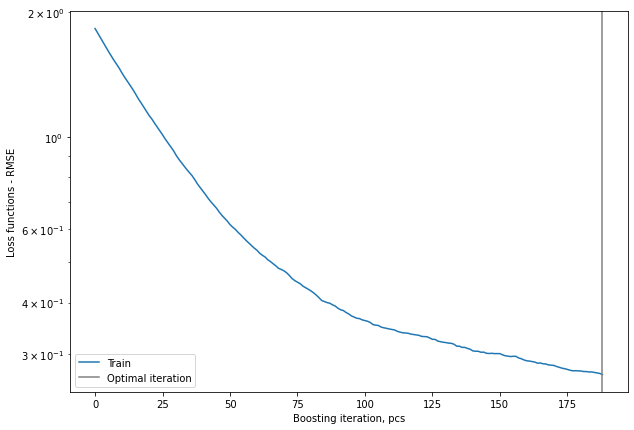

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.05
RMSE: 0.3
Relative RMSE(%):  0.147
MSE: 0.1
R square: 95.9%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.144
a1: 0.921
R^2: 0.960
Uncertainty
a0: 0.14+/-0.04
a1: 0.921+/-0.019


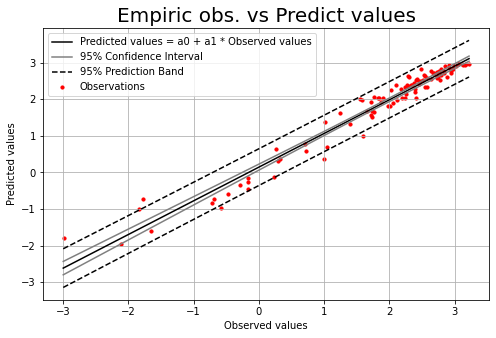

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

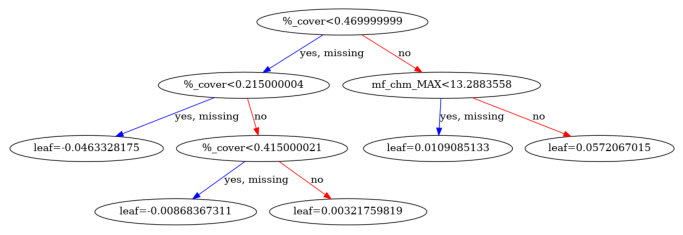

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

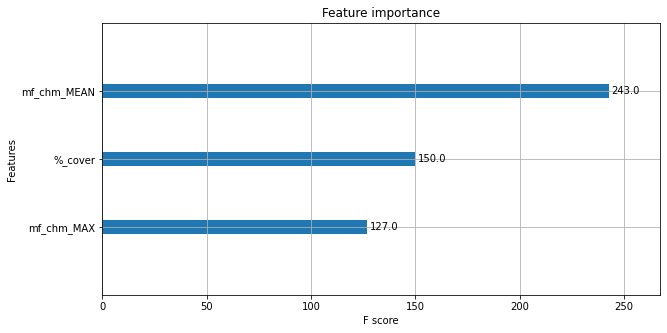

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

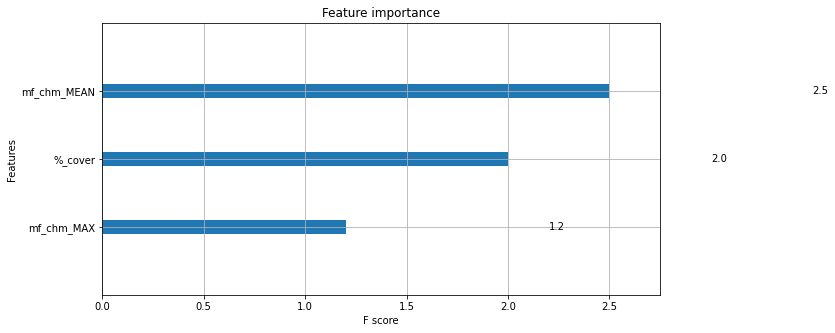

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

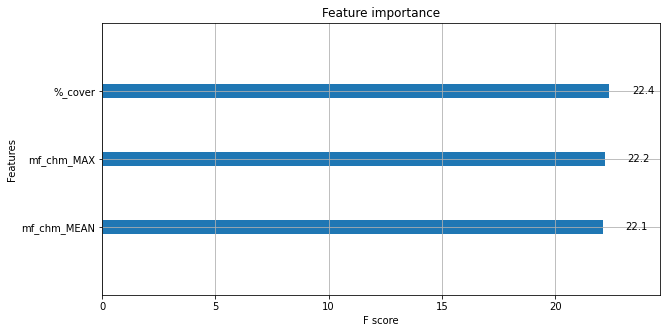

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


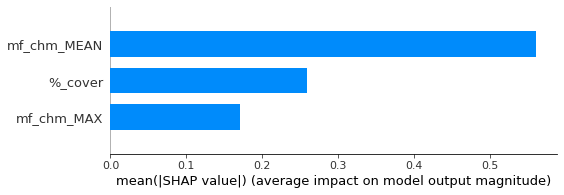

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

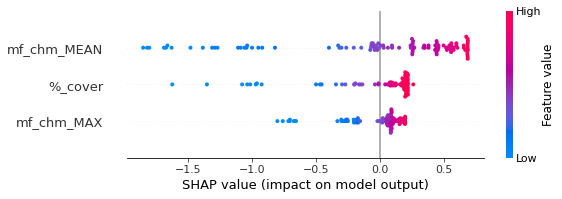

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

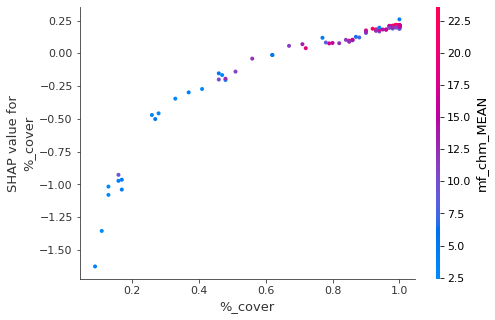

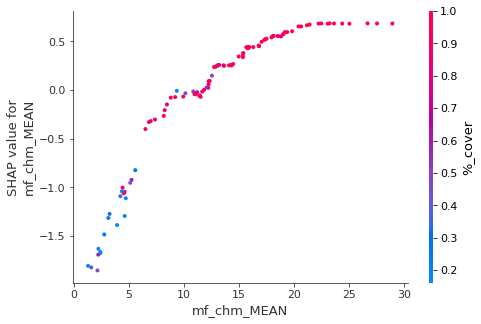

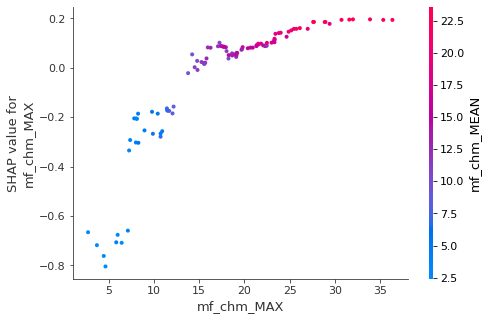

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_XGB_model_without_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_Mstem_XGB_model_without_texture.txt")